# Reading functions for population

In [62]:
import subprocess
import os

search_term_population = "Mulliken spin population per centre and basis function type"
lines_after_population=185

def search_in_file(file_path, search_term, lines_after):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    results = []
    for i, line in enumerate(lines):
        if search_term in line:
            # Add the matching line
            results.append(line.strip())
            # Add up to `lines_after` lines after the match
            results.extend(line.strip() for line in lines[i+1:i+1+lines_after])
    
    return results

def population_summation(results):
    all_data = []
    for i in range(len(results)):
        if results[i] == 'Mulliken spin population per centre and basis function type':
            populations = []
            s = 0.0
            p = 0.0
            d = 0.0
            f = 0.0
            for t in range(181):

                if results[i+t+4] == '':
                    continue
                elif results[i+t+4][1] == 's':
                    s = s + float(results[i+t+4][9:15])
                elif results[i+t+4][1] == 'p':
                    p = p + float(results[i+t+4][9:15])
                elif results[i+t+4][1] == 'd':
                    d = d + float(results[i+t+4][9:15])
                elif results[i+t+4][1] == 'f':
                    f = f + float(results[i+t+4][9:15])
                else:
                    continue
            populations.append(s)
            populations.append(p)
            populations.append(d)
            populations.append(f)
            all_data.append(populations)
        else:
            continue
    return all_data

def rasscf_energies(results):
    energies = []
    for i in range(9):
        energies.append(-float(results[i+3][44:57]))
    return energies


search_term_rasscf = "Final state energy(ies):"
lines_after_rasscf=11

In [ ]:
# Example usage
files = ['\\vanadium_no_spin_orbit_1.701.inp.o14556677.txt',
         '\\vanadium_no_spin_orbit_1.512.inp.o14556687.txt',
         '\\vanadium_no_spin_orbit_1.323.inp.o14556697.txt',
         '\\vanadium_no_spin_orbit_1.134.inp.o14556723.txt',
         '\\vanadium_no_spin_orbit_0.945.inp.o14548070.txt',
         '\\Nbanadium_no_spin_orbit_0.63.inp.o14548077.txt',
         '\\vanadium_no_spin_orbit_0.4725.inp.o14548084.txt',
         '\\vanadium_no_spin_orbit_0.378.inp.o14548091.txt',
         '\\vanadium_no_spin_orbit_0.315.inp.o14549868.txt',
         '\\vanadium_no_spin_orbit_0.27.inp.o14549878.txt',
         '\\vanadium_no_spin_orbit_0.23625.inp.o14549890.txt',
         '\\vanadium_no_spin_orbit_0.21.inp.o14549897.txt']
for path in files:
    file_path = r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research-Internship-TM-defects-in-SiC\1 - Point Charge Model\non_rel_basis_9_active\data_from_sims' + path
    print(f"the bond length is: {path[24:29]}")
    print(population_summation(search_in_file(file_path, search_term_population, lines_after_population)))
    print(rasscf_energies(search_in_file(file_path, search_term_rasscf, lines_after_rasscf)))

# V

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital


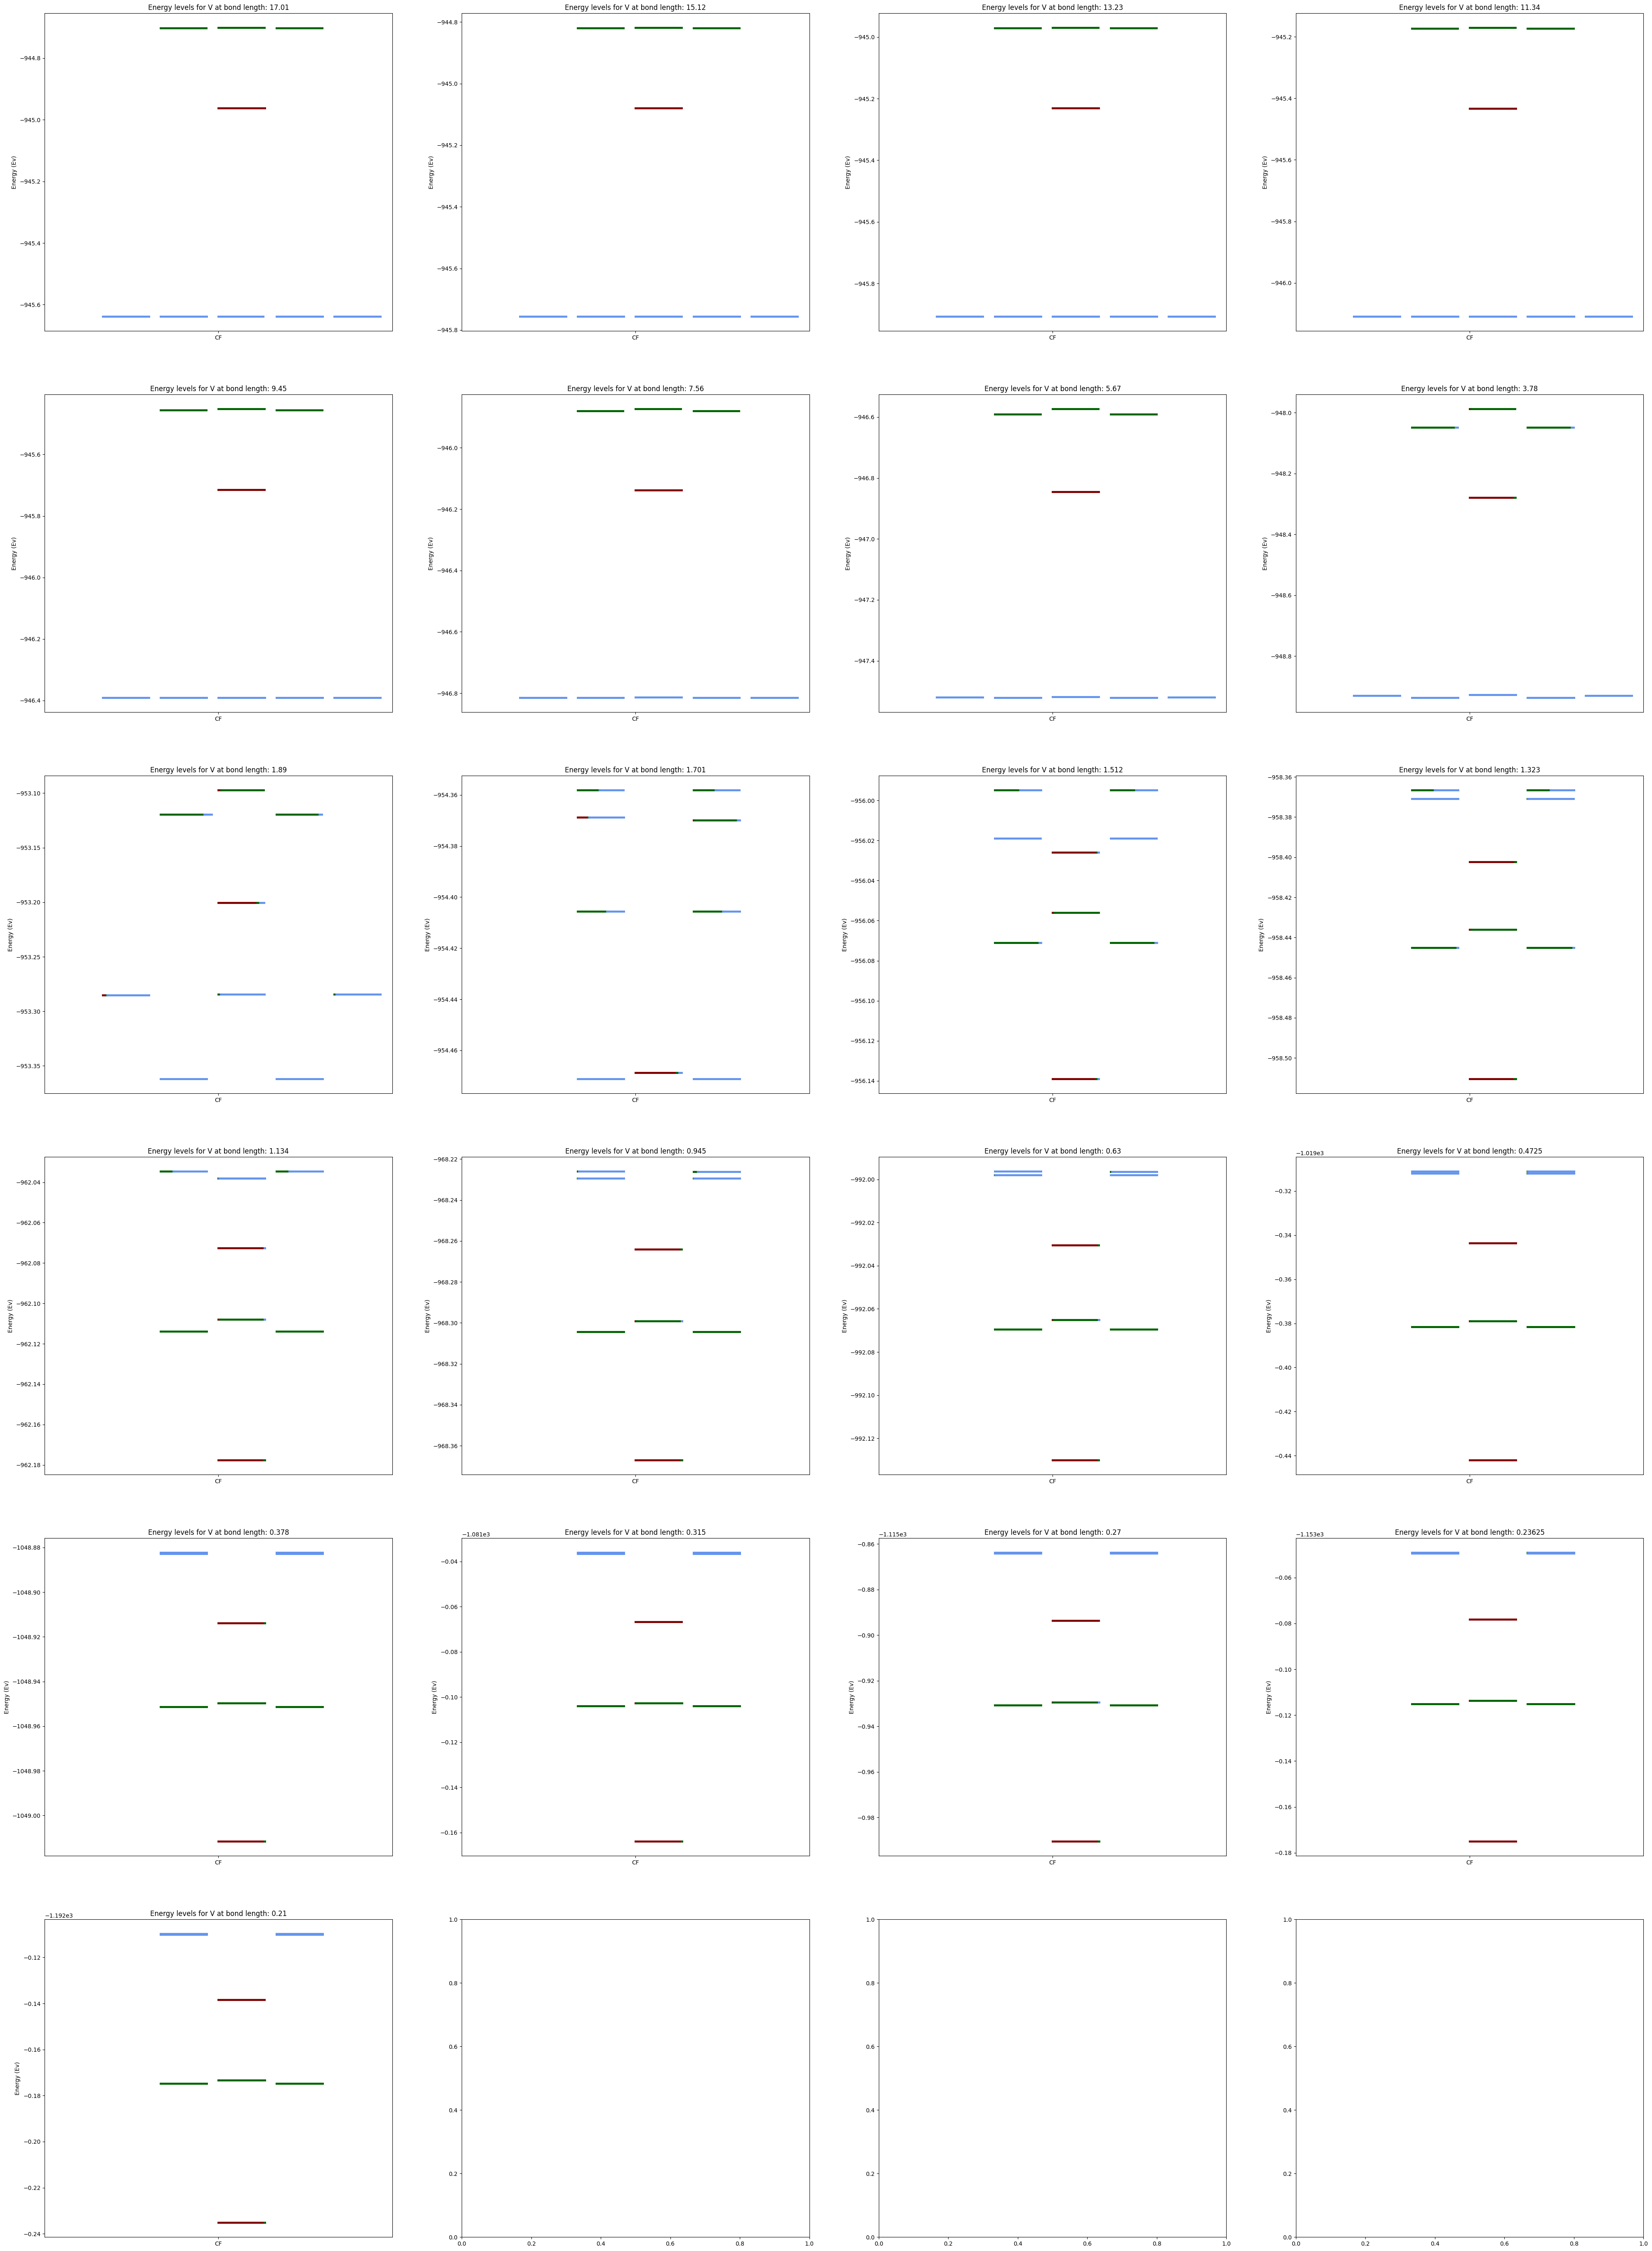

[-953.36209377, -953.36209377, -953.28517253, -953.28462929, -953.28462929, -953.20028651, -953.11943302, -953.11943302, -953.09730284]
[-953.36209377, -953.36209377, -953.28517253, -953.28462929, -953.28462929, -953.20028651, -953.11943302, -953.11943302, -953.09730284]


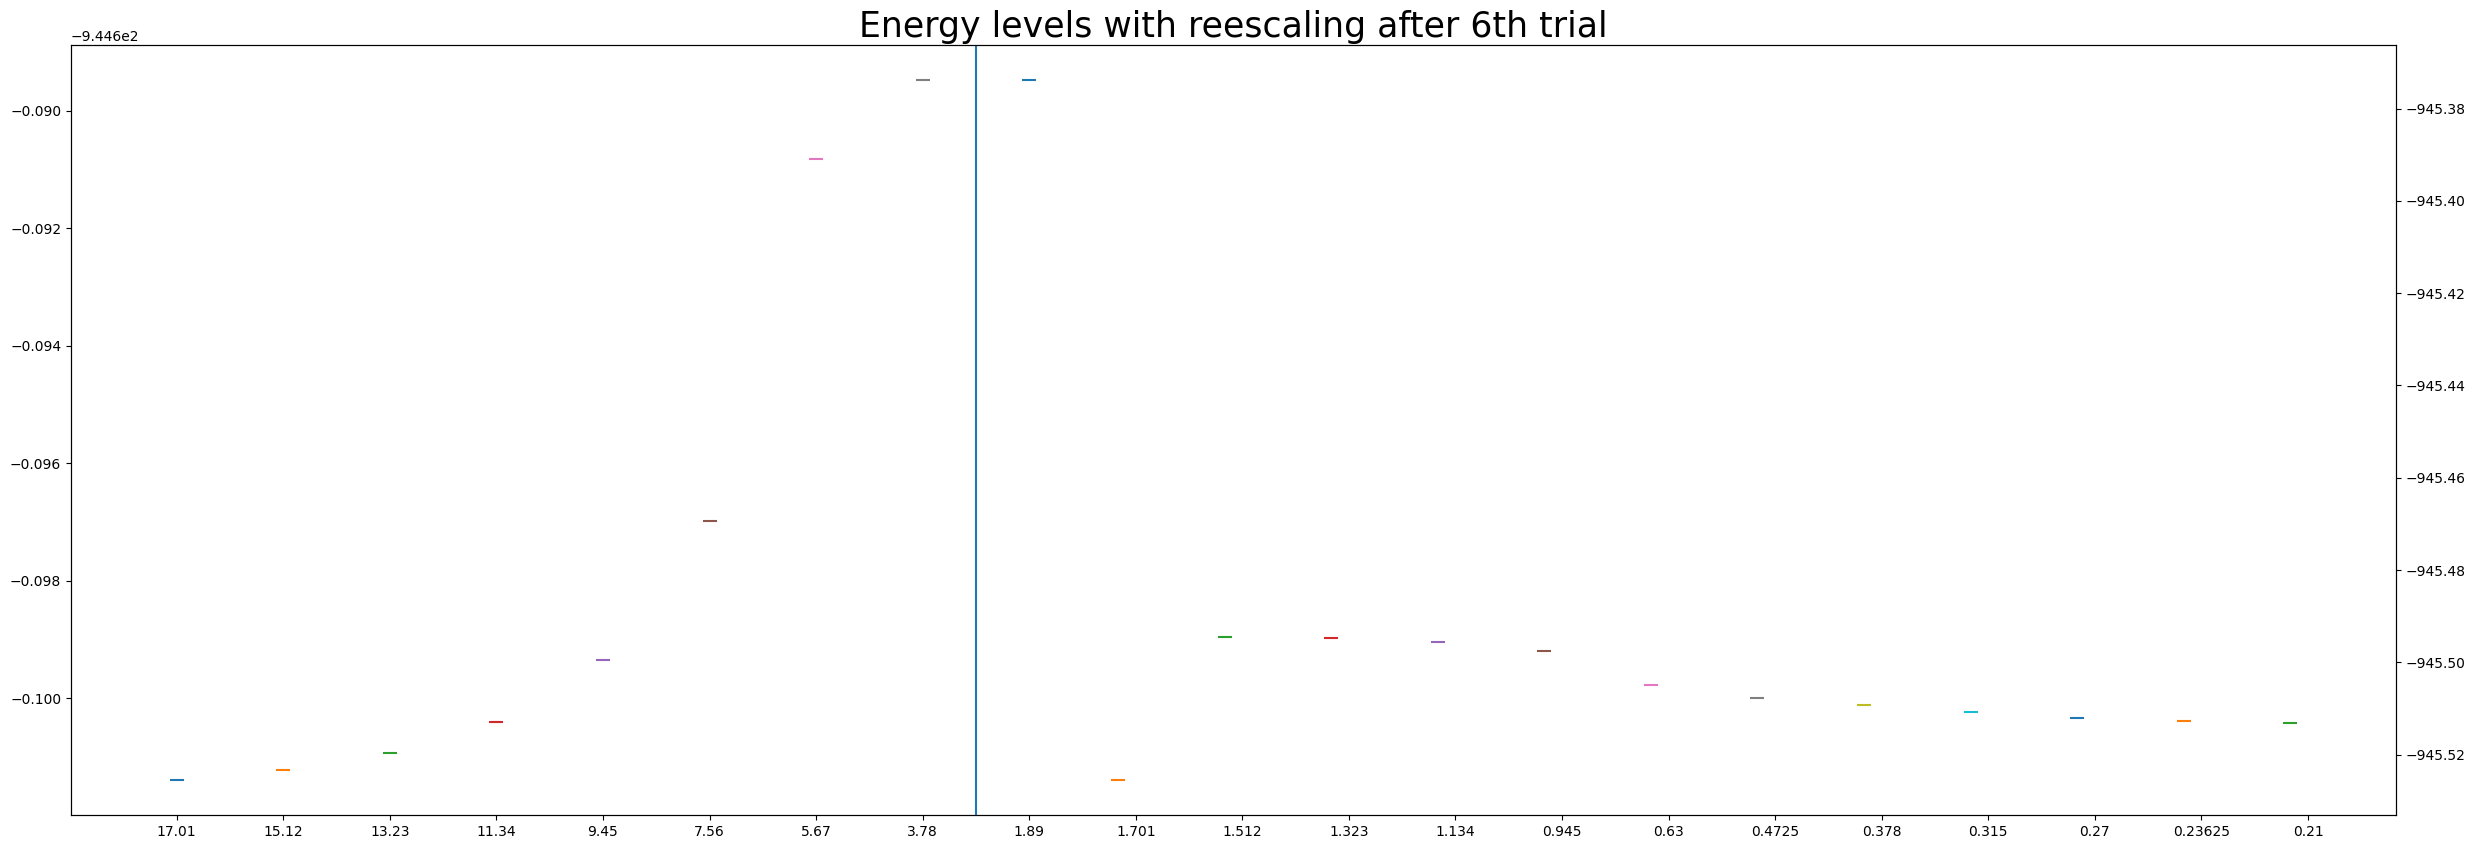

In [187]:
import matplotlib.pyplot as plt
import numpy as np

#Input files for population
files = ['\\vanadium_no_spin_orbit_1.701.inp.o14556677.txt',
         '\\vanadium_no_spin_orbit_1.512.inp.o14556687.txt',
         '\\vanadium_no_spin_orbit_1.323.inp.o14556697.txt',
         '\\vanadium_no_spin_orbit_1.134.inp.o14556723.txt',
         '\\vanadium_no_spin_orbit_0.945.inp.o14548070.txt',
         '\\vanadium_no_spin_orbit_0.63.inp.o14548077.txt',
         '\\vanadium_no_spin_orbit_0.4725.inp.o14548084.txt',
         '\\vanadium_no_spin_orbit_0.378.inp.o14548091.txt',
         '\\vanadium_no_spin_orbit_0.315.inp.o14549868.txt',
         '\\vanadium_no_spin_orbit_0.27.inp.o14549878.txt',
         '\\vanadium_no_spin_orbit_0.23625.inp.o14549890.txt',
         '\\vanadium_no_spin_orbit_0.21.inp.o14549897.txt']

#_______________________________________________
#For population we get [[s,p,d], [s,p,d], ...]

#For the ones below the following is also true:
# for the s-orbital it is distributed like 62% in 4-orbital , 23% in 5-orbital, 10% in 6-orbital
# the order of p orbitals is px, py, pz (pure), mainly in the 4-orbital (71%) and also 5-orbital (22%)
# the order of d orbitals is 3d2- (68%), 3d2+ (68%), 3d1+ (69%), 3d1- (69%), d0 (91% 3-orbital)
V_17_01 = [-945.63865505,-945.63865505,-945.63858321,-945.63858321,-945.63855904,-944.96209678,-944.70195522,-944.70195522,-944.70140207]
V_population_17_01 = [[0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.97], [0.9977,0,0], [0,0.99,0], [0,0.99,0], [0,0.99,0]]

V_15_12 = [-945.75625450,-945.75625450,-945.75615225,-945.75615225,-945.75611777,-945.07968898,-944.81961719,-944.81961719,-944.81882505]
V_population_15_12 = [[0,0,0.9976], [0,0,0.9976], [0,0,0.9975], [0,0,0.9975], [0,0,0.997], [0.997,0,0], [0,0.99,0], [0,0.99,0], [0,0.99,0]]

V_13_23 = [-945.90746207,-945.90746207,-945.90730949,-945.90730949,-945.90725786,-945.23088981,-944.97093123,-944.97093123,-944.96973894]
V_population_13_23 = [[0,0,0.997], [0,0,0.997], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0.9977,0,0], [0,0.99,0], [0,0.99,0], [0,0.99,0]]

#For the ones below the following is also true:
# for the s-orbital it is distributed like 62% in 4-orbital , 23% in 5-orbital, 10% in 6-orbital
# the order of p orbitals is px, py, pz (pure), mainly in the 4-orbital (71%) and also 5-orbital (22%)
# the order of d orbitals is 3d2- (83%), 3d2+ (83%), 3d1- (90%), 3d1+ (70%), d0 (91% 3-orbital)
V_11_34 = [-946.10908902,-946.10908902,-946.10884674,-946.10884674,-946.10876441,-945.43251323,-945.17275675,-945.17275675,-945.17083929]
V_population_11_34 = [[0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0.997,0,0], [0,0.99,0], [0,0.99,0], [0,0.99,0]]

#For the ones below the following is also true:
# for the s-orbital it is distributed like 62% in 4-orbital , 23% in 5-orbital, 10% in 6-orbital
# the order of p orbitals is px, py, pz (pure), mainly in the 4-orbital (71%) and also 5-orbital (22%)
# the order of d orbitals is 3d2+ (82%), 3d2- (82%), 3d1- (90%), 3d1+ (90%), d0 (91% 3-orbital)
V_9_45 = [-946.39140574,-946.39140574,-946.39098670,-946.39098670,-946.39084349,-945.71484135,-945.45549559,-945.45549559,-945.45211123]
V_population_9_45 = [[0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0.997,0,0], [0,0.99,0], [0,0.99,0], [0,0.99,0]]

#For the ones below the following is also true:
# for the s-orbital it is distributed like 62% in 4-orbital , 23% in 5-orbital, 10% in 6-orbital
# the order of p orbitals is px, py, pz (pure), mainly in the 4-orbital (71%) and also 5-orbital (22%)
# the order of d orbitals is 3d2+ (90%), 3d2- (90%), 3d1- (90%), 3d1+ (90%), d0 (91% 3-orbital)
V_7_56 = [-946.81498897,-946.81498897,-946.81416679,-946.81416679,-946.81388429,-946.13855653,-945.88019254,-945.88019254,-945.87331894]
V_population_7_56 = [[0,0,0.99], [0,0,0.99], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0.9977,0,0], [0,0.98,0], [0,0.98,0], [0,0.98,0]]

V_5_67 = [-947.52136634,-947.52136634,-947.51937671,-947.51937671,-947.51870073,-946.84596586,-946.59108234,-946.59108234,-946.57353924]
V_population_5_67 = [[0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0,0,0.9977], [0.9977,0,0], [0,0.99,0], [0,0.99,0], [0,0.99,0]]

#For the ones below the following is also true:
# for the s-orbital it is distributed like 64% in 4-orbital , 20% in 5-orbital, 8% in 6-orbital
# the order of p orbitals is px, py, pz (pure), mainly in the 4-orbital (77%) and also 5-orbital (13%)
# the order of d orbitals is 3d2+ (85%), 3d2- (85%), 3d1- (84%), 3d1+ (84%), d0 (91% 3-orbital)
V_3_78 = [-948.93703587,-948.93703587,-948.92956546,-948.92956546,-948.92741945,-948.27903994,-948.04870653,-948.04870653,-947.98786149]
V_population_3_78 = [[0,0,0.9977], [0,0,0.9977], [0,0.0005,0.9977], [0,0.0005,0.9977], [0,0,0.9977], [0.9625,0.0227,0.0029], [0,0.9504,0.0402], [0,0.9504,0.0402], [0.0259,0.9537,0]]

#For the ones below it gets more mixed
V_1_89 = [-953.36209377,-953.36209377,-953.28517253,-953.28462929,-953.28462929,-953.20028651,-953.11943302,-953.11943302,-953.09730284]
V_population_1_89 = [[0,0,0.9962], [0,0,0.9977], [0.0856,0.0155,0.8947], [0,0.0448,0.9477], [0,0.0448,0.9477],[0.8338,0.0591,0.0935], [0,0.9394,0.1618], [0,0.9291,0.053], [0.0553,0.9168,0.005]]

V_1_701 = [-954.47122794,-954.47122793,-954.46872375,-954.40556222,-954.40556218,-954.36982711,-954.36868345,-954.35814556,-954.35814552]
V_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
V_1_512 = [-956.13905230,-956.07096171,-956.07096170,-956.05590342,-956.02586096,-956.01901000,-956.01900999,-955.99487523,-955.99487523]
V_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
V_1_323 = [-958.51048644,-958.44513134,-958.44513133,-958.43600168,-958.40234313,-958.37088897,-958.37088897,-958.36663230,-958.36663230]
V_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
V_1_134 = [-962.17770302,-962.11389608,-962.11389607,-962.10788967,-962.07258163,-962.03805944,-962.03805944,-962.03463512,-962.03463511]
V_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
V_0_945 = [-968.36708168,-968.30431626,-968.30431202,-968.29916046,-968.26404003,-968.22941106,-968.22940930,-968.22623699,-968.22603969]
V_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
V_0_63 = [-992.13013699,-992.06940343,-992.06939665,-992.06502994,-992.03050465,-991.99802313,-991.99802262,-991.99635191,-991.99629717]
V_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
V_0_4725 = [-1019.44205069,-1019.38157499,-1019.38157499,-1019.37899136,-1019.34362795,-1019.31203064,-1019.31203064,-1019.31112239,-1019.31112239]
V_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
V_0_378 = [-1049.01163040,-1048.95135865,-1048.95135865,-1048.94976484,-1048.91387187,-1048.88290056,-1048.88290056,-1048.88231608,-1048.88231607]
V_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
V_0_315 = [-1081.16393860,-1081.10402092,-1081.10402092,-1081.10275526,-1081.06672057,-1081.03652787,-1081.03652787,-1081.03607471,-1081.03607471]
V_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
V_0_27 = [-1115.99050449,-1115.93074833,-1115.93074832,-1115.92946943,-1115.89363883,-1115.86422578,-1115.86422578,-1115.86382817,-1115.86382817]
V_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
V_0_23625 = [-1153.17503932,-1153.11511072,-1153.11511071,-1153.11370899,-1153.07829399,-1153.04954339,-1153.04954339,-1153.04917111,-1153.04917110]
V_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
V_0_21 = [-1192.23517614,-1192.17480696,-1192.17480695,-1192.17329439,-1192.13835989,-1192.11013518,-1192.11013518,-1192.10977832,-1192.10977832]
V_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))

V_Energies = [V_17_01, V_15_12, V_13_23, V_11_34, V_9_45, V_7_56, V_5_67, V_3_78, V_1_89,
            V_1_701, V_1_512, V_1_323, V_1_134, V_0_945, V_0_63, V_0_4725, V_0_378, V_0_315, V_0_27, V_0_23625, V_0_21]
V_population_total = [V_population_17_01, V_population_15_12, V_population_13_23, V_population_11_34, V_population_9_45, V_population_7_56,
                    V_population_5_67, V_population_3_78, V_population_1_89, V_population_1_701, V_population_1_512, V_population_1_323,
                    V_population_1_134, V_population_0_945, V_population_0_63, V_population_0_4725, V_population_0_378, V_population_0_315,
                    V_population_0_27, V_population_0_23625, V_population_0_21]

V_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_9 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_10 = [0, 1, 0.5, 1, 0, 1, 0, 1, 0]
V_11 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_12 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_13 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0.5, 1, 0]
V_14 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_15 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_16 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_17 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_18 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_19 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_20 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_21 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_positions = [V_1, V_2, V_3, V_4, V_5, V_6, V_7, V_8, V_9, V_10, V_11, V_12, V_13, V_14, V_15, V_16, V_17, V_18, V_19, V_20, V_21]
V_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(V_positions, V_Energies, V_bond_lengths_list, V_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for V at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
        ax[i, j].set_xlim(-1.0, 2.0)
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()
print(V_1_89)
normaliser_ground_value = V_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 6th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(V_positions, V_Energies):
    if t >= 8:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            energies = []
            positions = []
            energies.append(ener[j] - diff)
            positions.append(pos[j] + i)
        ax2.scatter(positions, energies, s=100, marker="_", linewidth=1.5, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            energies = []
            positions = []
            energies.append(ener[j] - diff)
            positions.append(pos[j] + i)
        ax.scatter(positions, energies, s=100, marker="_", linewidth=1.5, zorder=3)
    i=i+3
    t=t+1
print(V_1_89)
plt.title("Energy levels with reescaling after 6th trial", fontsize=25)
V_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(V_positions_xticks, V_bond_lengths_list)
plt.axvline(23)
plt.show()
V_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_9 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
V_10 = [0, 1, 0.5, 1, 0, 1, 0, 1, 0]
V_11 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_12 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_13 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0.5, 1, 0]
V_14 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_15 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_16 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_17 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_18 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_19 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_20 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_21 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
V_positions = [V_1, V_2, V_3, V_4, V_5, V_6, V_7, V_8, V_9, V_10, V_11, V_12, V_13, V_14, V_15, V_16, V_17, V_18, V_19, V_20, V_21]


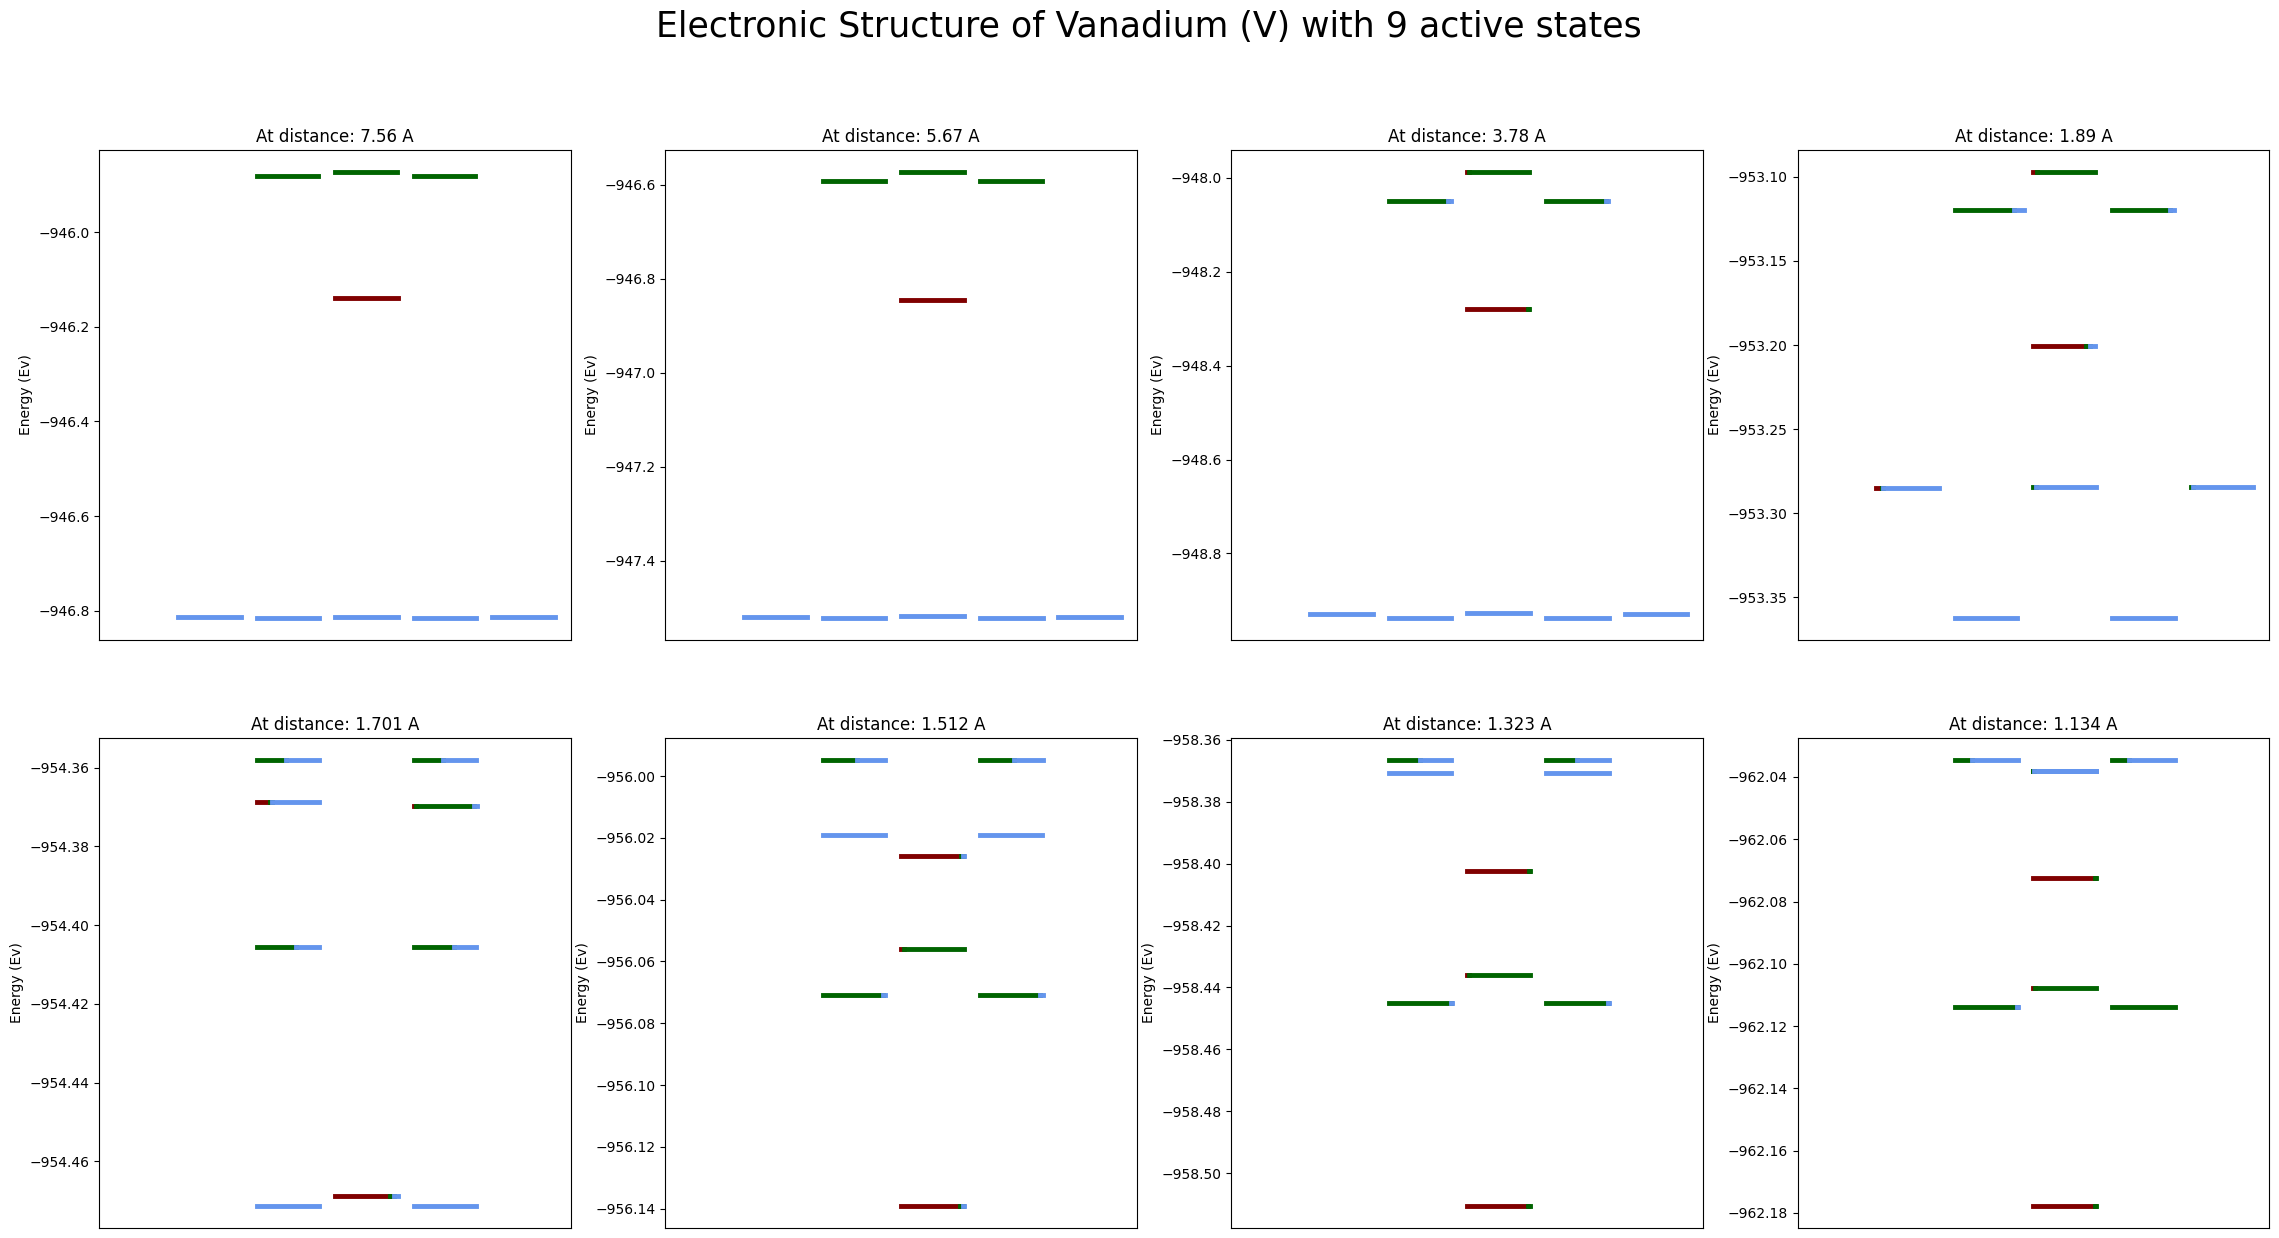

[-948.93703587, -948.93703587, -948.92956546, -948.92956546, -948.92741945, -948.27903994, -948.04870653, -948.04870653, -947.98786149]
3.78


In [191]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
V_positions_new = V_positions[5:13]
V_Energies_new = V_Energies[5:13]
V_bond_lengths_list_new = V_bond_lengths_list[5:13]
V_population_total_new = V_population_total[5:13]

for pos, ener, bond_length, population in zip(V_positions_new, V_Energies_new, V_bond_lengths_list_new, V_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length} A')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Vanadium (V) with 9 active states", fontsize=25)

plt.show()
print(V_Energies_new[2])
print(V_bond_lengths_list_new[2])

### For report

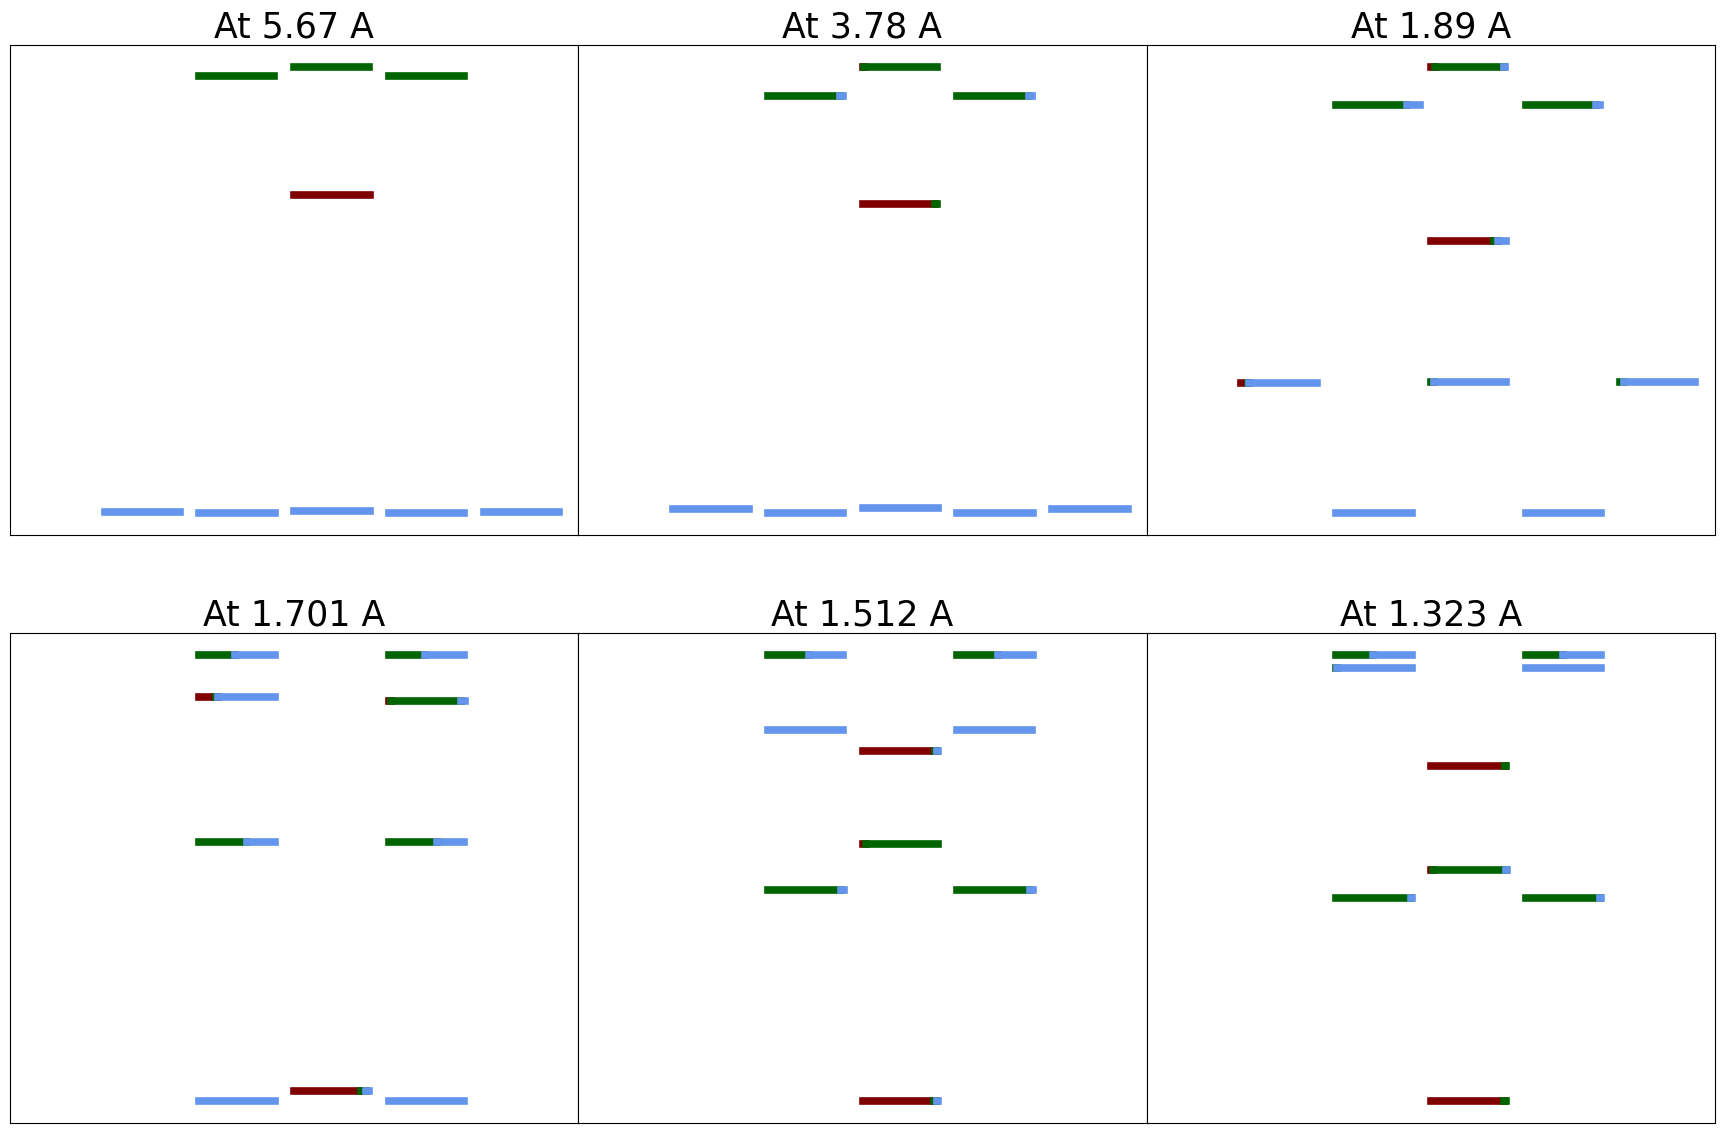

In [160]:
fig, ax = plt.subplots(2,3, figsize=(22,14), facecolor ='white')
i=0
j=0
V_positions_new = V_positions[6:12]
V_Energies_new = V_Energies[6:12]
V_bond_lengths_list_new = V_bond_lengths_list[6:12]
V_population_total_new = V_population_total[6:12]

for pos, ener, bond_length, population in zip(V_positions_new, V_Energies_new, V_bond_lengths_list_new, V_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=5.5)

        ax[i, j].set_title(f'At {bond_length} A', fontsize=25)
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(axis="both", length=0, labelbottom=False, labelleft=False)

    j = j +1
    if j == 3:
        j = 0
        i = i +1
plt.subplots_adjust(wspace=0)

plt.show()

In [ ]:
from os import walk

files = os.listdir(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research-Internship-TM-defects-in-SiC\1 - Point Charge Model\non_rel_basis_9_active\data_from_sims')
for file in files:
    print(f'\\\{file},')

\\chromium_no_spin_orbit_0.21.inp.o14549892.txt,
\\chromium_no_spin_orbit_0.23625.inp.o14549882.txt,
\\chromium_no_spin_orbit_0.27.inp.o14549872.txt,
\\chromium_no_spin_orbit_0.315.inp.o14549853.txt,
\\chromium_no_spin_orbit_0.378.inp.o14548086.txt,
\\chromium_no_spin_orbit_0.4725.inp.o14548079.txt,
\\chromium_no_spin_orbit_0.63.inp.o14548072.txt,
\\chromium_no_spin_orbit_0.945.inp.o14548062.txt,
\\chromium_no_spin_orbit_1.134.inp.o14556700.txt,
\\chromium_no_spin_orbit_1.323.inp.o14556692.txt,
\\chromium_no_spin_orbit_1.512.inp.o14556680.txt,
\\chromium_no_spin_orbit_1.701.inp.o14556670.txt,
\\chromium_no_spin_orbit_1.89.inp.o14530296.txt,
\\chromium_no_spin_orbit_11.34.inp.o14416905.txt,
\\chromium_no_spin_orbit_13.23.inp.o14416892.txt,
\\chromium_no_spin_orbit_15.12.inp.o14397936.txt,
\\chromium_no_spin_orbit_17.01.inp.o14384839.txt,
\\chromium_no_spin_orbit_3.78.inp.o14530272.txt,
\\chromium_no_spin_orbit_5.67.inp.o14530244.txt,
\\chromium_no_spin_orbit_7.56.inp.o14530208.txt,
\\ch

# Cr

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital


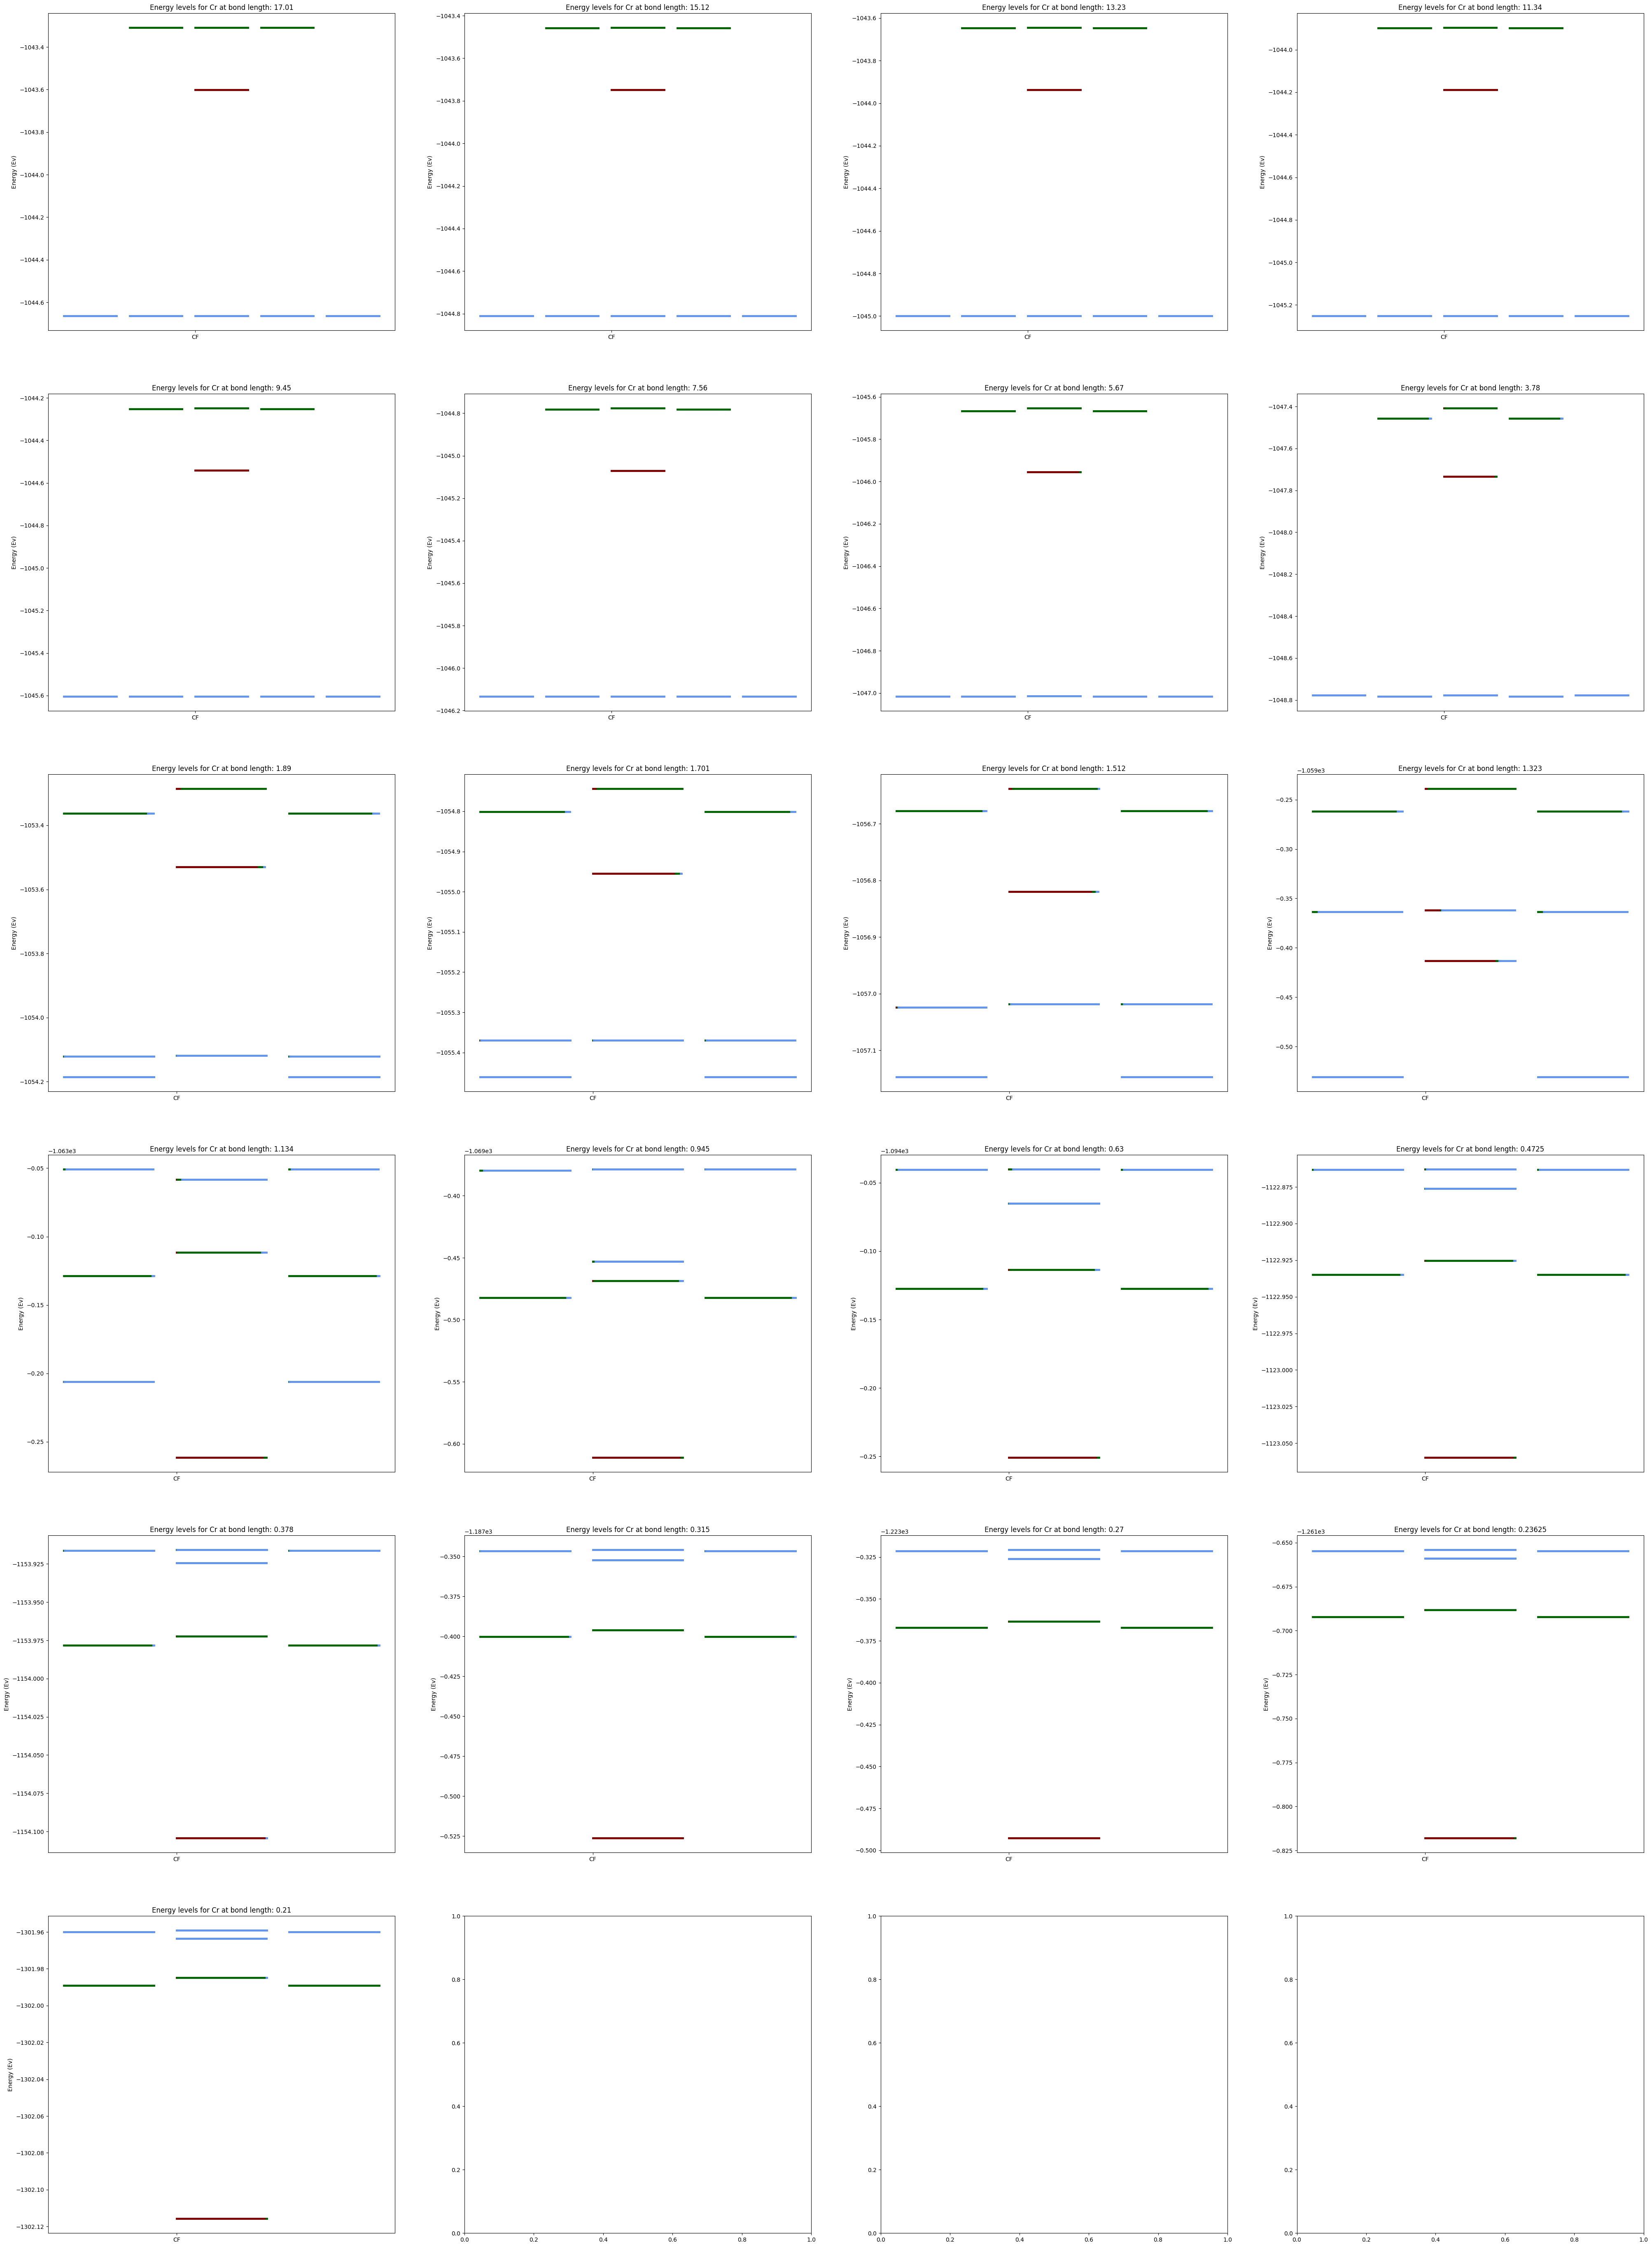

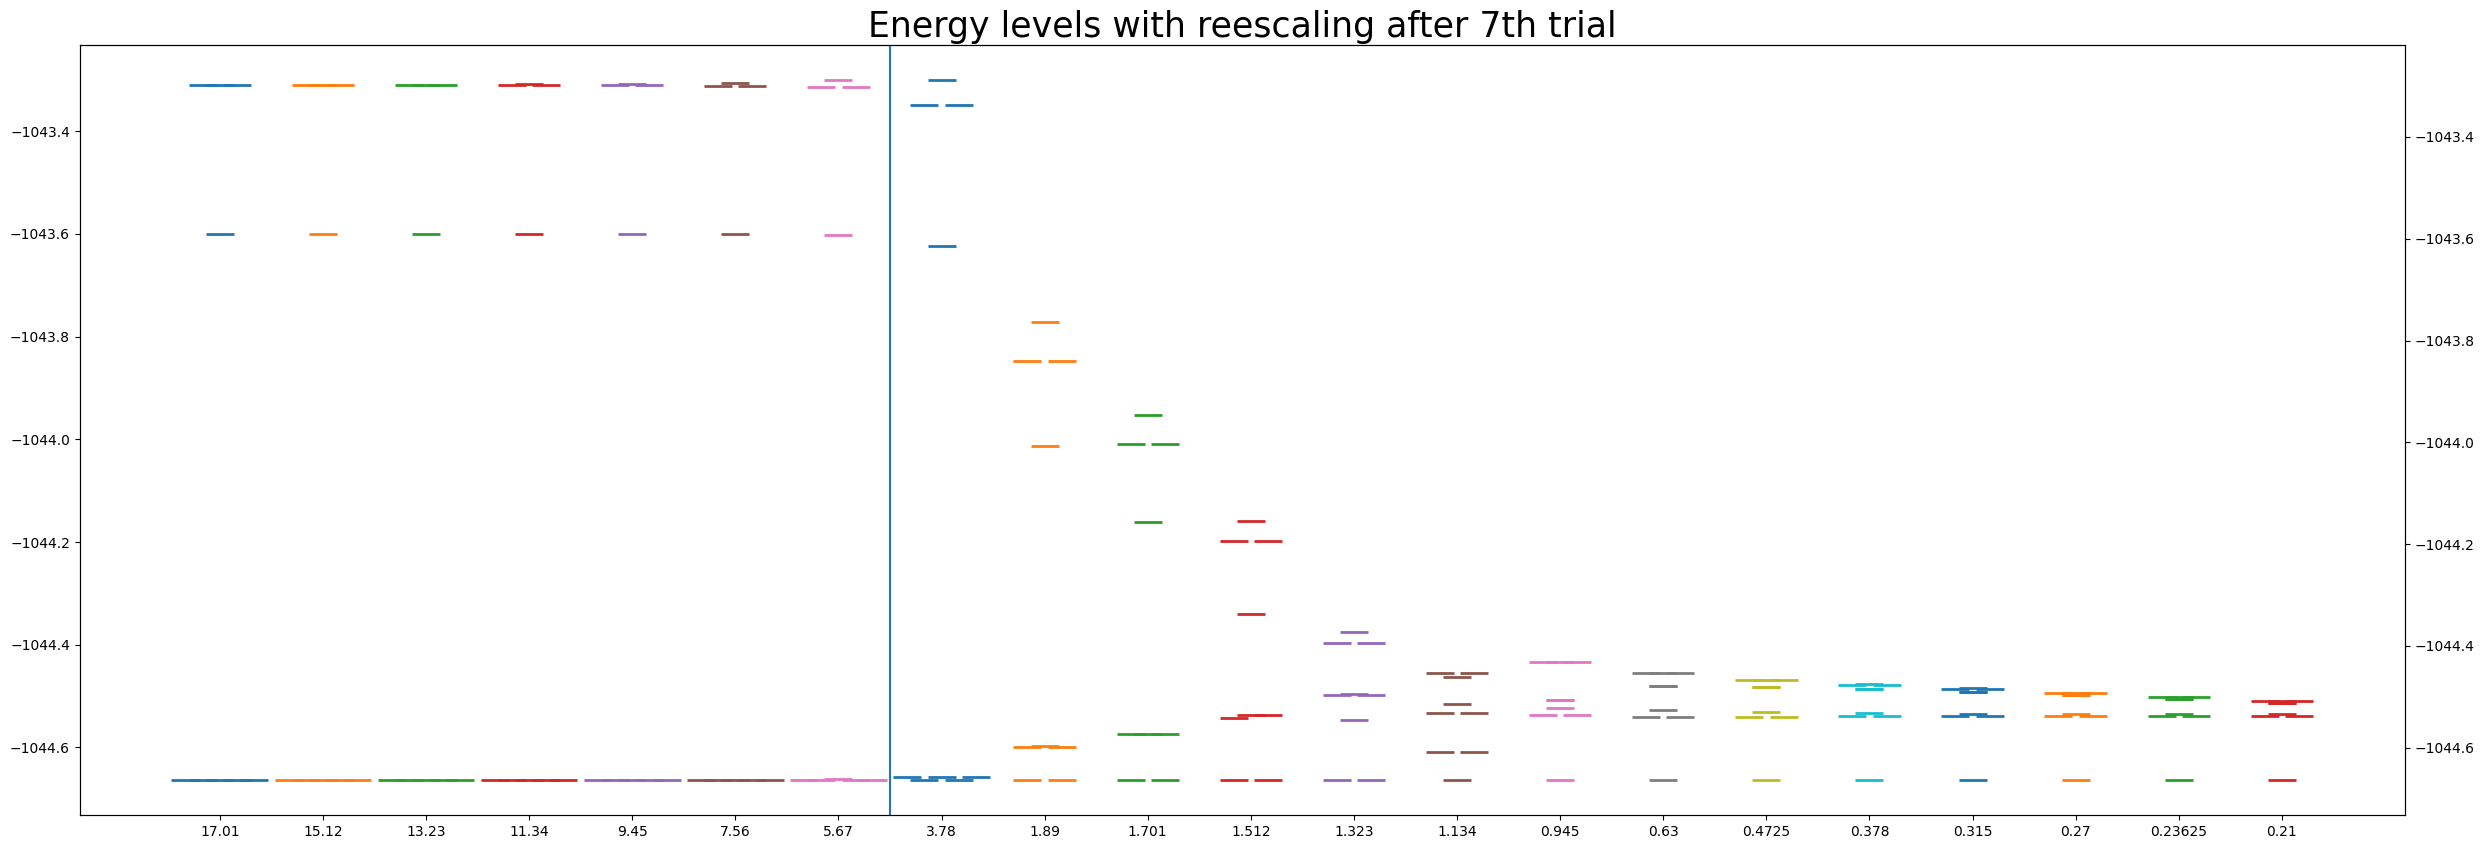

In [72]:
import matplotlib.pyplot as plt

files = ['\\chromium_no_spin_orbit_17.01.inp.o14384839.txt',
         '\\chromium_no_spin_orbit_15.12.inp.o14397936.txt',
         '\\chromium_no_spin_orbit_13.23.inp.o14416892.txt',
         '\\chromium_no_spin_orbit_11.34.inp.o14416905.txt',
         '\\chromium_no_spin_orbit_9.45.inp.o14470286.txt',
         '\\chromium_no_spin_orbit_7.56.inp.o14530208.txt',
         '\\chromium_no_spin_orbit_5.67.inp.o14530244.txt',
         '\\chromium_no_spin_orbit_3.78.inp.o14530272.txt',
         '\\chromium_no_spin_orbit_1.89.inp.o14530296.txt',
         '\\chromium_no_spin_orbit_1.701.inp.o14556670.txt',
         '\\chromium_no_spin_orbit_1.512.inp.o14556680.txt',
         '\\chromium_no_spin_orbit_1.323.inp.o14556692.txt',
         '\\chromium_no_spin_orbit_1.134.inp.o14556700.txt',
         '\\chromium_no_spin_orbit_0.945.inp.o14548062.txt',
         '\\chromium_no_spin_orbit_0.63.inp.o14548072.txt',
         '\\chromium_no_spin_orbit_0.4725.inp.o14548079.txt',
         '\\chromium_no_spin_orbit_0.378.inp.o14548086.txt',
         '\\chromium_no_spin_orbit_0.315.inp.o14549853.txt',
         '\\chromium_no_spin_orbit_0.27.inp.o14549872.txt',
         '\\chromium_no_spin_orbit_0.23625.inp.o14549882.txt',
         '\\chromium_no_spin_orbit_0.21.inp.o14549892.txt']


Cr_17_01 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_rasscf, lines_after_rasscf))
Cr_population_17_01 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
Cr_15_12 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_rasscf, lines_after_rasscf))
Cr_population_15_12 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
Cr_13_23 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_rasscf, lines_after_rasscf))
Cr_population_13_23 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
Cr_11_34 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_rasscf, lines_after_rasscf))
Cr_population_11_34 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
Cr_9_45 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_rasscf, lines_after_rasscf))
Cr_population_9_45 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
Cr_7_56 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_rasscf, lines_after_rasscf))
Cr_population_7_56 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
Cr_5_67 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_rasscf, lines_after_rasscf))
Cr_population_5_67 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
Cr_3_78 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_rasscf, lines_after_rasscf))
Cr_population_3_78 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
Cr_1_89 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_rasscf, lines_after_rasscf))
Cr_population_1_89 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
Cr_1_701 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_rasscf, lines_after_rasscf))
Cr_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
Cr_1_512 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_rasscf, lines_after_rasscf))
Cr_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
Cr_1_323 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_rasscf, lines_after_rasscf))
Cr_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))
Cr_1_134 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_rasscf, lines_after_rasscf))
Cr_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_population, lines_after_population))
Cr_0_945 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_rasscf, lines_after_rasscf))
Cr_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_population, lines_after_population))
Cr_0_63 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_rasscf, lines_after_rasscf))
Cr_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_population, lines_after_population))
Cr_0_4725 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_rasscf, lines_after_rasscf))
Cr_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_population, lines_after_population))
Cr_0_378 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_rasscf, lines_after_rasscf))
Cr_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_population, lines_after_population))
Cr_0_315 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_rasscf, lines_after_rasscf))
Cr_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_population, lines_after_population))
Cr_0_27 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_rasscf, lines_after_rasscf))
Cr_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_population, lines_after_population))
Cr_0_23625 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_rasscf, lines_after_rasscf))
Cr_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_population, lines_after_population))
Cr_0_21 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_rasscf, lines_after_rasscf))
Cr_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_population, lines_after_population))

Cr_Energies = [Cr_17_01, Cr_15_12, Cr_13_23, Cr_11_34, Cr_9_45, Cr_7_56, Cr_5_67, Cr_3_78, Cr_1_89,
            Cr_1_701, Cr_1_512, Cr_1_323, Cr_1_134, Cr_0_945, Cr_0_63, Cr_0_4725, Cr_0_378, Cr_0_315, Cr_0_27, Cr_0_23625, Cr_0_21]
Cr_population_total = [Cr_population_17_01, Cr_population_15_12, Cr_population_13_23, Cr_population_11_34, Cr_population_9_45, Cr_population_7_56,
                    Cr_population_5_67, Cr_population_3_78, Cr_population_1_89, Cr_population_1_701, Cr_population_1_512, Cr_population_1_323,
                    Cr_population_1_134, Cr_population_0_945, Cr_population_0_63, Cr_population_0_4725, Cr_population_0_378, Cr_population_0_315,
                    Cr_population_0_27, Cr_population_0_23625, Cr_population_0_21]



Cr_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_9 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Cr_10 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Cr_11 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Cr_12 = [0, 1, 0.5, 1, 0, 0.5, 0, 1, 0.5]
Cr_13 = [0.5, 1, 0, 0, 1, 0.5, 0.5, 1, 0]
Cr_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_15 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_16 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_17 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_18 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_19 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_20 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_21 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]


Cr_positions = [Cr_1, Cr_2, Cr_3, Cr_4, Cr_5, Cr_6, Cr_7, Cr_8, Cr_9, Cr_10, Cr_11, Cr_12, Cr_13, Cr_14, Cr_15, Cr_16, Cr_17, Cr_18, Cr_19, Cr_20, Cr_21]

Cr_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(Cr_positions, Cr_Energies, Cr_bond_lengths_list, Cr_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for Cr at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()

normaliser_ground_value = Cr_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 7th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(Cr_positions, Cr_Energies):
    if t >= 7:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax2.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    i=i+3
    t=t+1
plt.title("Energy levels with reescaling after 7th trial", fontsize=25)
Cr_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(Cr_positions_xticks, Cr_bond_lengths_list)
plt.axvline(20)
plt.show()
Cr_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Cr_9 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Cr_10 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Cr_11 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Cr_12 = [0, 1, 0.5, 1, 0, 0.5, 0, 1, 0.5]
Cr_13 = [0.5, 1, 0, 0, 1, 0.5, 0.5, 1, 0]
Cr_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_15 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_16 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_17 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_18 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_19 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_20 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Cr_21 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]


Cr_positions = [Cr_1, Cr_2, Cr_3, Cr_4, Cr_5, Cr_6, Cr_7, Cr_8, Cr_9, Cr_10, Cr_11, Cr_12, Cr_13, Cr_14, Cr_15, Cr_16, Cr_17, Cr_18, Cr_19, Cr_20, Cr_21]

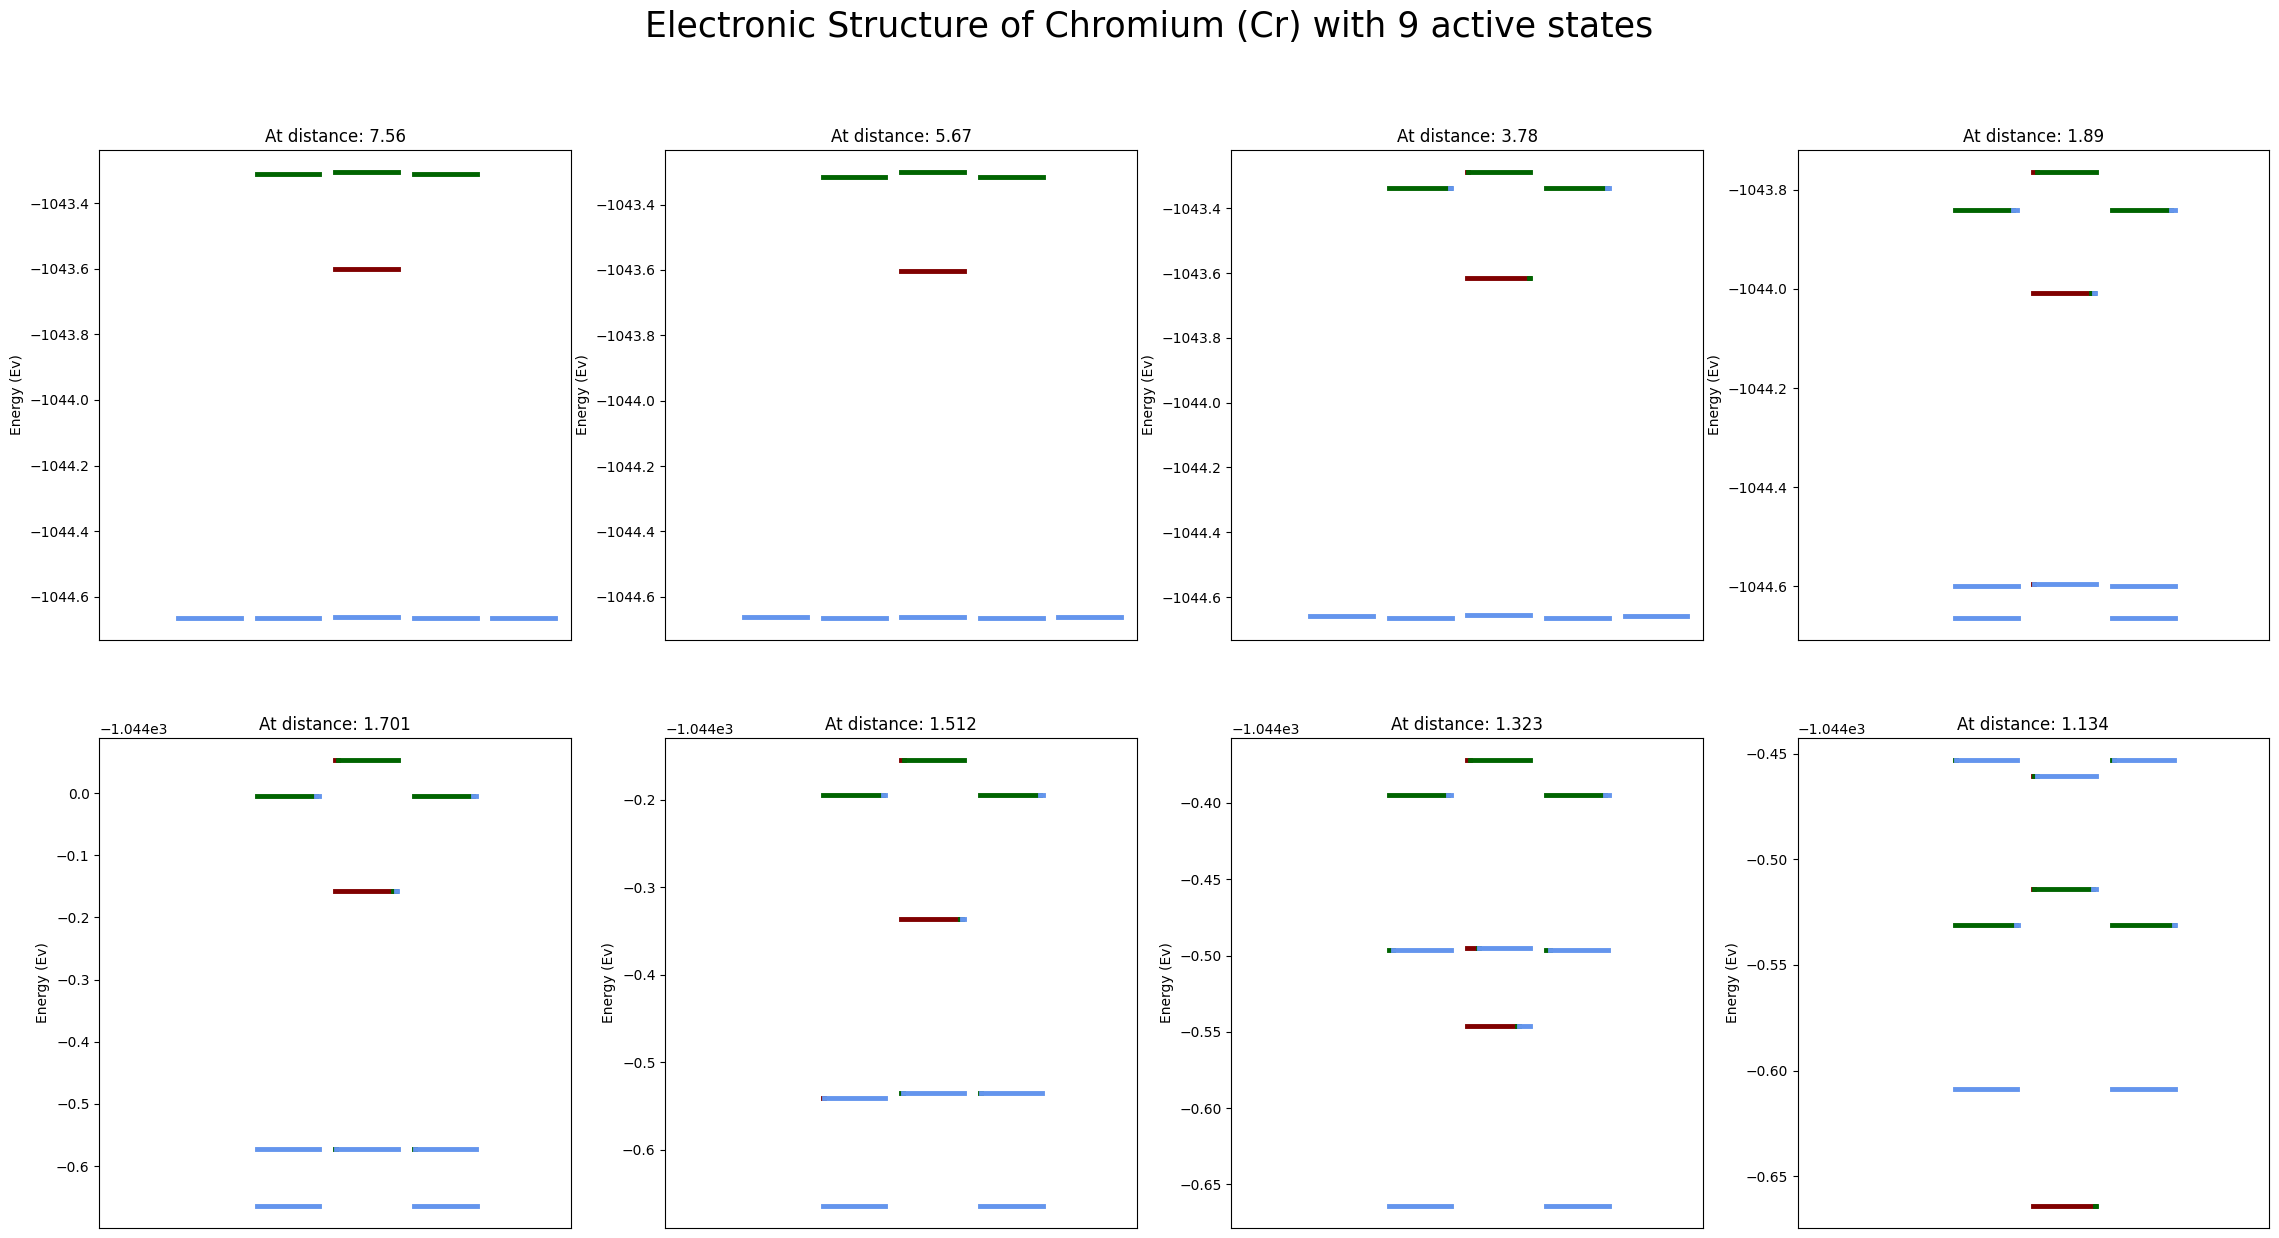

In [130]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
Cr_positions_new = Cr_positions[5:13]
Cr_Energies_new = Cr_Energies[5:13]
Cr_bond_lengths_list_new = Cr_bond_lengths_list[5:13]
Cr_population_total_new = Cr_population_total[5:13]

for pos, ener, bond_length, population in zip(Cr_positions_new, Cr_Energies_new, Cr_bond_lengths_list_new, Cr_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Chromium (Cr) with 9 active states", fontsize=25)

plt.show()

# Nb

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital


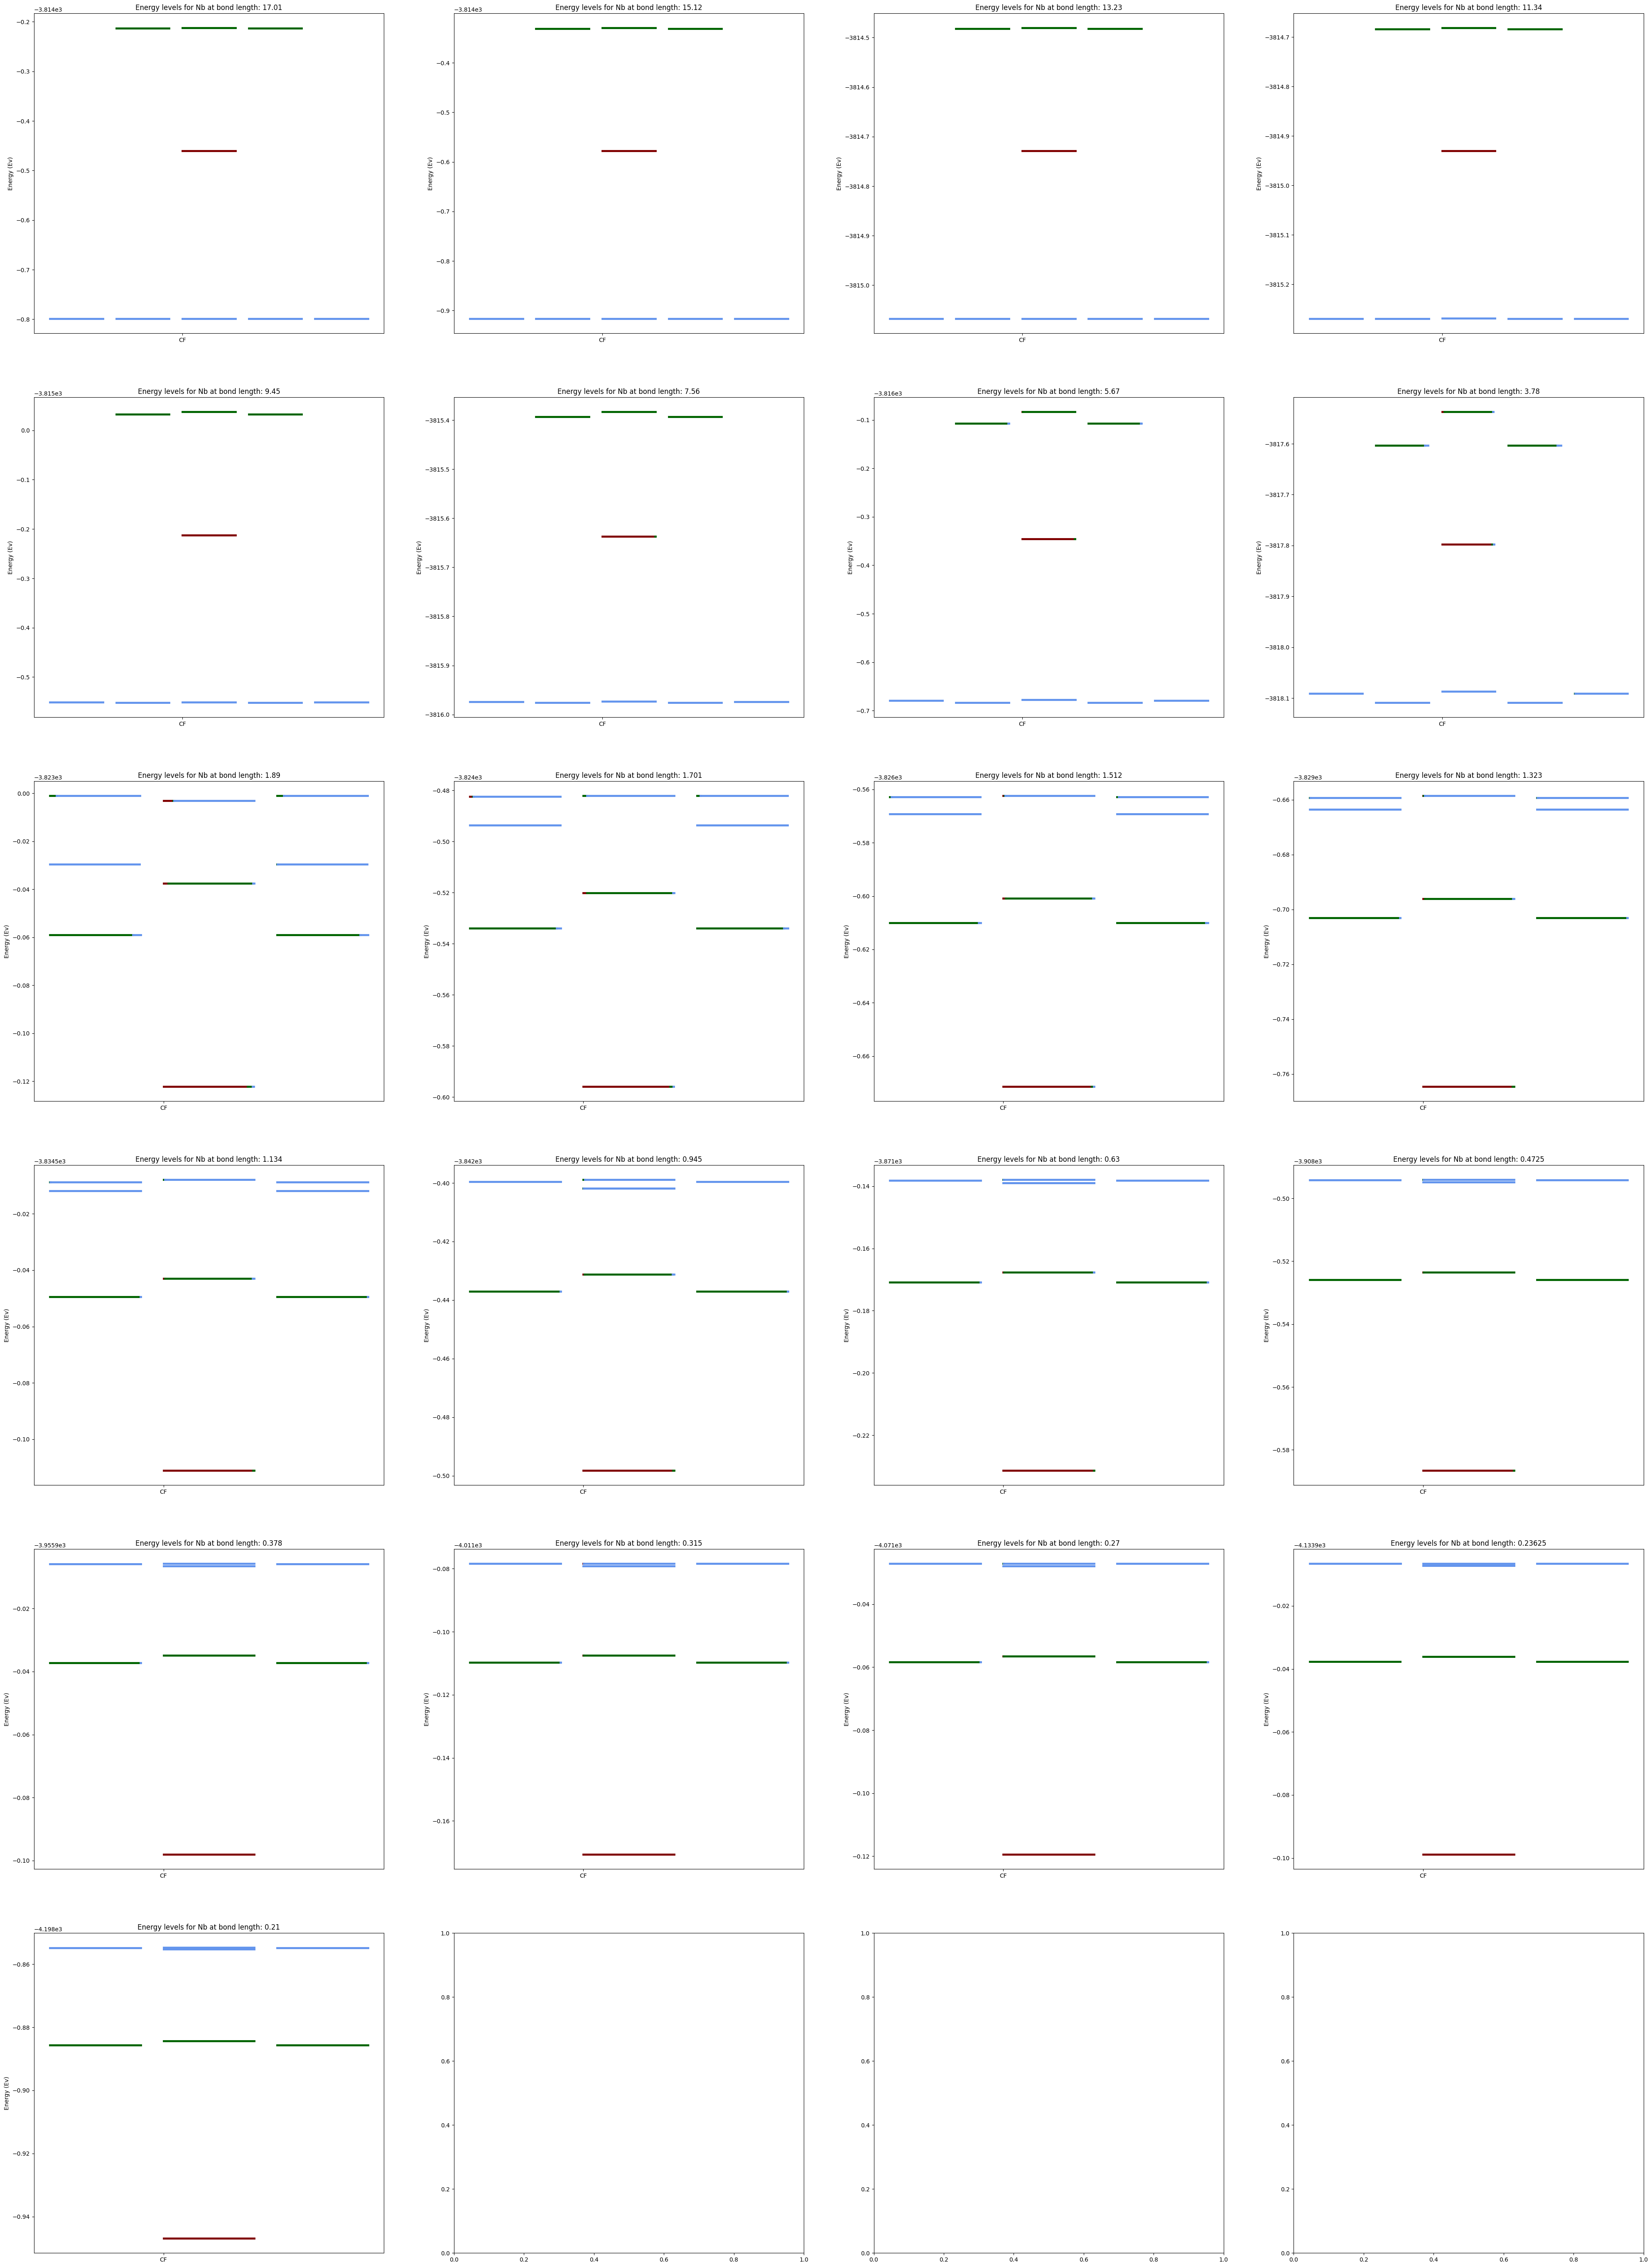

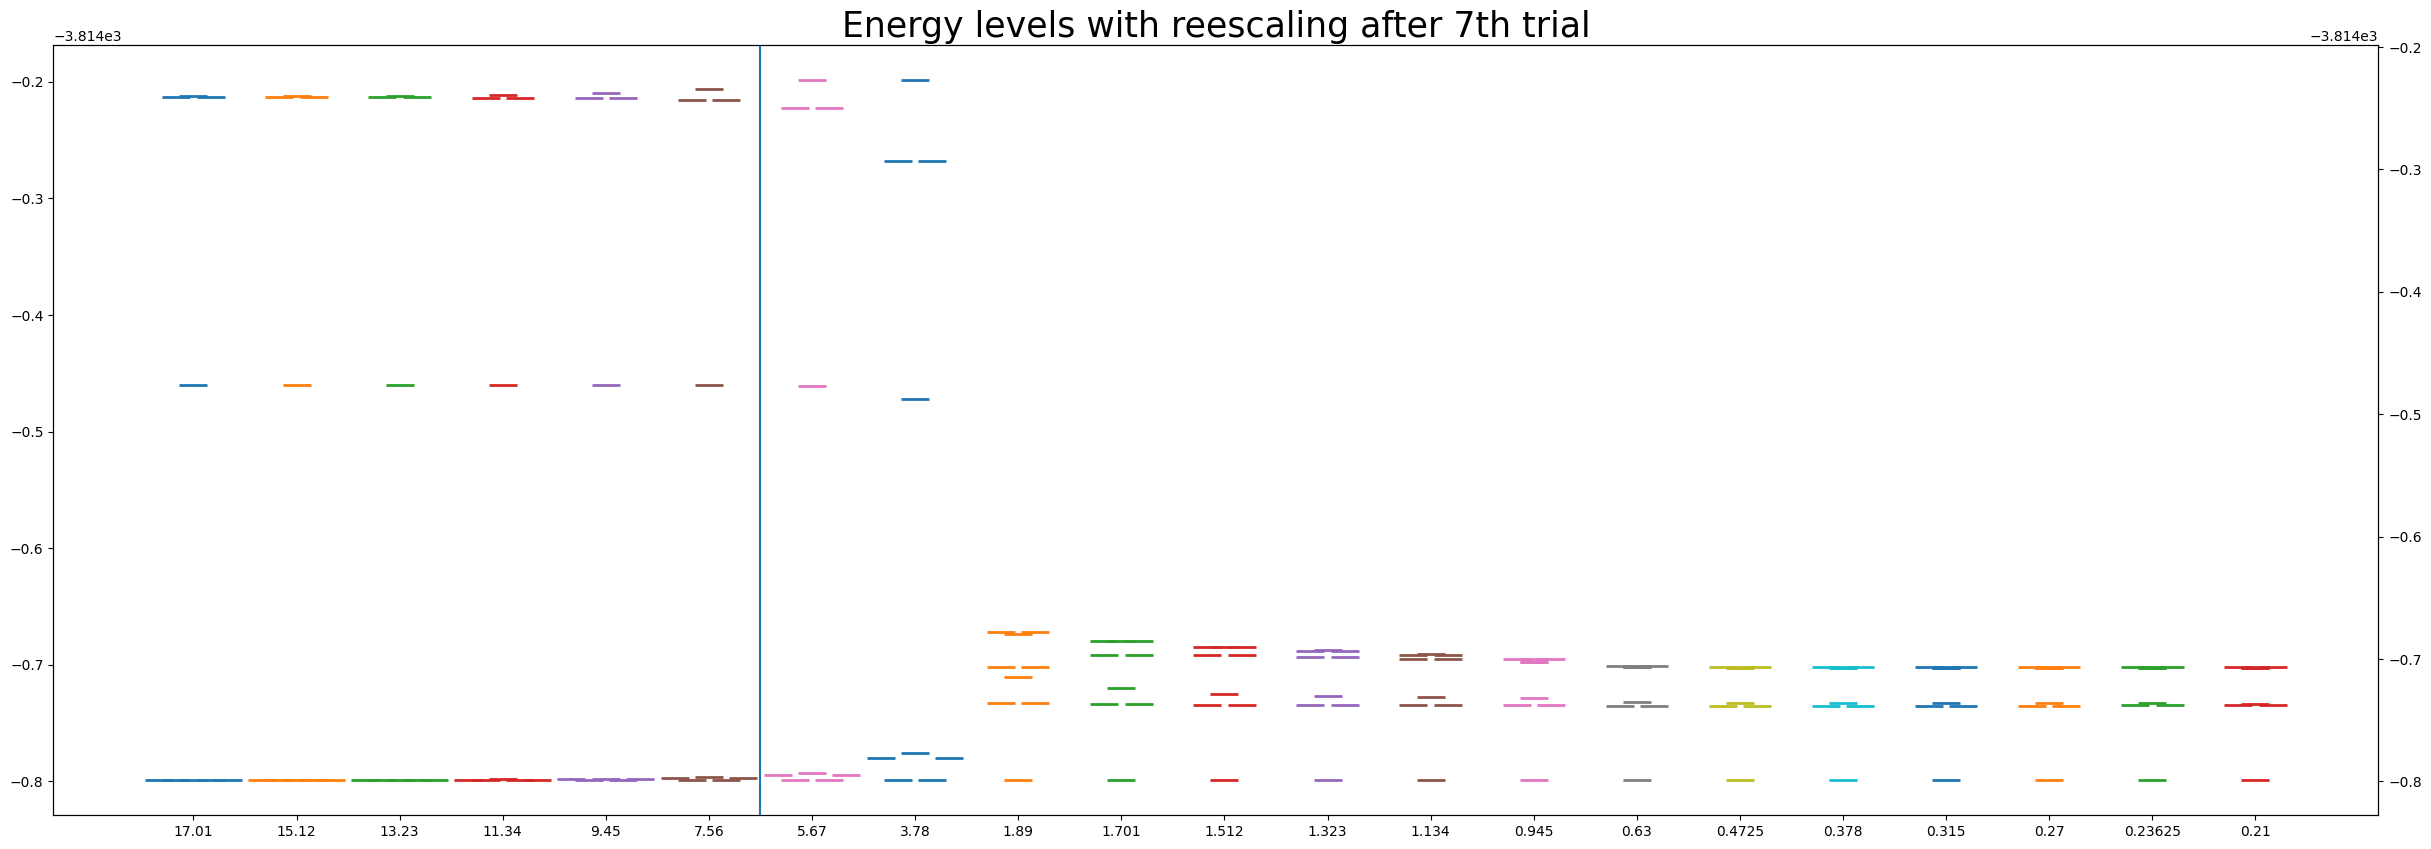

In [82]:
import matplotlib.pyplot as plt

files = ['\\niobium_no_spin_orbit_0.21.inp.o14549894.txt',
'\\niobium_no_spin_orbit_0.23625.inp.o14549885.txt',
'\\niobium_no_spin_orbit_0.27.inp.o14549875.txt',
'\\niobium_no_spin_orbit_0.315.inp.o14549865.txt',
'\\niobium_no_spin_orbit_0.378.inp.o14548088.txt',
'\\niobium_no_spin_orbit_0.4725.inp.o14548081.txt',
'\\niobium_no_spin_orbit_0.63.inp.o14548074.txt',
'\\niobium_no_spin_orbit_0.945.inp.o14548067.txt',
'\\niobium_no_spin_orbit_1.134.inp.o14556703.txt',
'\\niobium_no_spin_orbit_1.323.inp.o14556694.txt',
'\\niobium_no_spin_orbit_1.512.inp.o14556682.txt',
'\\niobium_no_spin_orbit_1.701.inp.o14556674.txt',
'\\niobium_no_spin_orbit_1.89.inp.o14530301.txt',
'\\niobium_no_spin_orbit_3.78.inp.o14530275.txt',
'\\niobium_no_spin_orbit_5.67.inp.o14530252.txt',
'\\niobium_no_spin_orbit_7.56.inp.o14530212.txt',
'\\niobium_no_spin_orbit_9.45.inp.o14470289.txt',
'\\niobium_no_spin_orbit_11.34.inp.o14416907.txt',
'\\niobium_no_spin_orbit_13.23.inp.o14416895.txt',
'\\niobium_no_spin_orbit_15.12.inp.o14397953.txt',
'\\niobium_no_spin_orbit_17.01.inp.o14397947.txt']
files.reverse()

Nb_17_01 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_rasscf, lines_after_rasscf))
Nb_population_17_01 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
Nb_15_12 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_rasscf, lines_after_rasscf))
Nb_population_15_12 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
Nb_13_23 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_rasscf, lines_after_rasscf))
Nb_population_13_23 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
Nb_11_34 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_rasscf, lines_after_rasscf))
Nb_population_11_34 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
Nb_9_45 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_rasscf, lines_after_rasscf))
Nb_population_9_45 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
Nb_7_56 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_rasscf, lines_after_rasscf))
Nb_population_7_56 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
Nb_5_67 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_rasscf, lines_after_rasscf))
Nb_population_5_67 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
Nb_3_78 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_rasscf, lines_after_rasscf))
Nb_population_3_78 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
Nb_1_89 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_rasscf, lines_after_rasscf))
Nb_population_1_89 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
Nb_1_701 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_rasscf, lines_after_rasscf))
Nb_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
Nb_1_512 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_rasscf, lines_after_rasscf))
Nb_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
Nb_1_323 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_rasscf, lines_after_rasscf))
Nb_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))
Nb_1_134 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_rasscf, lines_after_rasscf))
Nb_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_population, lines_after_population))
Nb_0_945 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_rasscf, lines_after_rasscf))
Nb_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_population, lines_after_population))
Nb_0_63 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_rasscf, lines_after_rasscf))
Nb_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_population, lines_after_population))
Nb_0_4725 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_rasscf, lines_after_rasscf))
Nb_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_population, lines_after_population))
Nb_0_378 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_rasscf, lines_after_rasscf))
Nb_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_population, lines_after_population))
Nb_0_315 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_rasscf, lines_after_rasscf))
Nb_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_population, lines_after_population))
Nb_0_27 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_rasscf, lines_after_rasscf))
Nb_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_population, lines_after_population))
Nb_0_23625 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_rasscf, lines_after_rasscf))
Nb_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_population, lines_after_population))
Nb_0_21 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_rasscf, lines_after_rasscf))
Nb_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_population, lines_after_population))

Nb_Energies = [Nb_17_01, Nb_15_12, Nb_13_23, Nb_11_34, Nb_9_45, Nb_7_56, Nb_5_67, Nb_3_78, Nb_1_89,
            Nb_1_701, Nb_1_512, Nb_1_323, Nb_1_134, Nb_0_945, Nb_0_63, Nb_0_4725, Nb_0_378, Nb_0_315, Nb_0_27, Nb_0_23625, Nb_0_21]
Nb_population_total = [Nb_population_17_01, Nb_population_15_12, Nb_population_13_23, Nb_population_11_34, Nb_population_9_45, Nb_population_7_56,
                    Nb_population_5_67, Nb_population_3_78, Nb_population_1_89, Nb_population_1_701, Nb_population_1_512, Nb_population_1_323,
                    Nb_population_1_134, Nb_population_0_945, Nb_population_0_63, Nb_population_0_4725, Nb_population_0_378, Nb_population_0_315,
                    Nb_population_0_27, Nb_population_0_23625, Nb_population_0_21]



Nb_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_9 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0]
Nb_10 = [0.5, 1, 0, 0.5, 1, 0, 0, 1, 0.5]
Nb_11 = [0.5, 1, 0, 0.5, 0, 1, 0, 1, 0.5]
Nb_12 = [0.5, 1, 0, 0.5, 0, 1, 0, 1, 0.5]
Nb_13 = [0.5, 1, 0, 0.5, 0, 1, 0, 1, 0.5]
Nb_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_15 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_16 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_17 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_18 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_19 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_20 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_21 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]


Nb_positions = [Nb_1, Nb_2, Nb_3, Nb_4, Nb_5, Nb_6, Nb_7, Nb_8, Nb_9, Nb_10, Nb_11, Nb_12, Nb_13, Nb_14, Nb_15, Nb_16, Nb_17, Nb_18, Nb_19, Nb_20, Nb_21]

Nb_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(Nb_positions, Nb_Energies, Nb_bond_lengths_list, Nb_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for Nb at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()

normaliser_ground_value = Nb_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 7th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(Nb_positions, Nb_Energies):
    if t >= 7:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax2.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    i=i+3
    t=t+1
plt.title("Energy levels with reescaling after 7th trial", fontsize=25)
Nb_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(Nb_positions_xticks, Nb_bond_lengths_list)
plt.axvline(17)
plt.show()

Nb_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Nb_9 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0]
Nb_10 = [0.5, 1, 0, 0.5, 1, 0, 0, 1, 0.5]
Nb_11 = [0.5, 1, 0, 0.5, 0, 1, 0, 1, 0.5]
Nb_12 = [0.5, 1, 0, 0.5, 0, 1, 0, 1, 0.5]
Nb_13 = [0.5, 1, 0, 0.5, 0, 1, 0, 1, 0.5]
Nb_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_15 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_16 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_17 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_18 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_19 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_20 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Nb_21 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]


Nb_positions = [Nb_1, Nb_2, Nb_3, Nb_4, Nb_5, Nb_6, Nb_7, Nb_8, Nb_9, Nb_10, Nb_11, Nb_12, Nb_13, Nb_14, Nb_15, Nb_16, Nb_17, Nb_18, Nb_19, Nb_20, Nb_21]

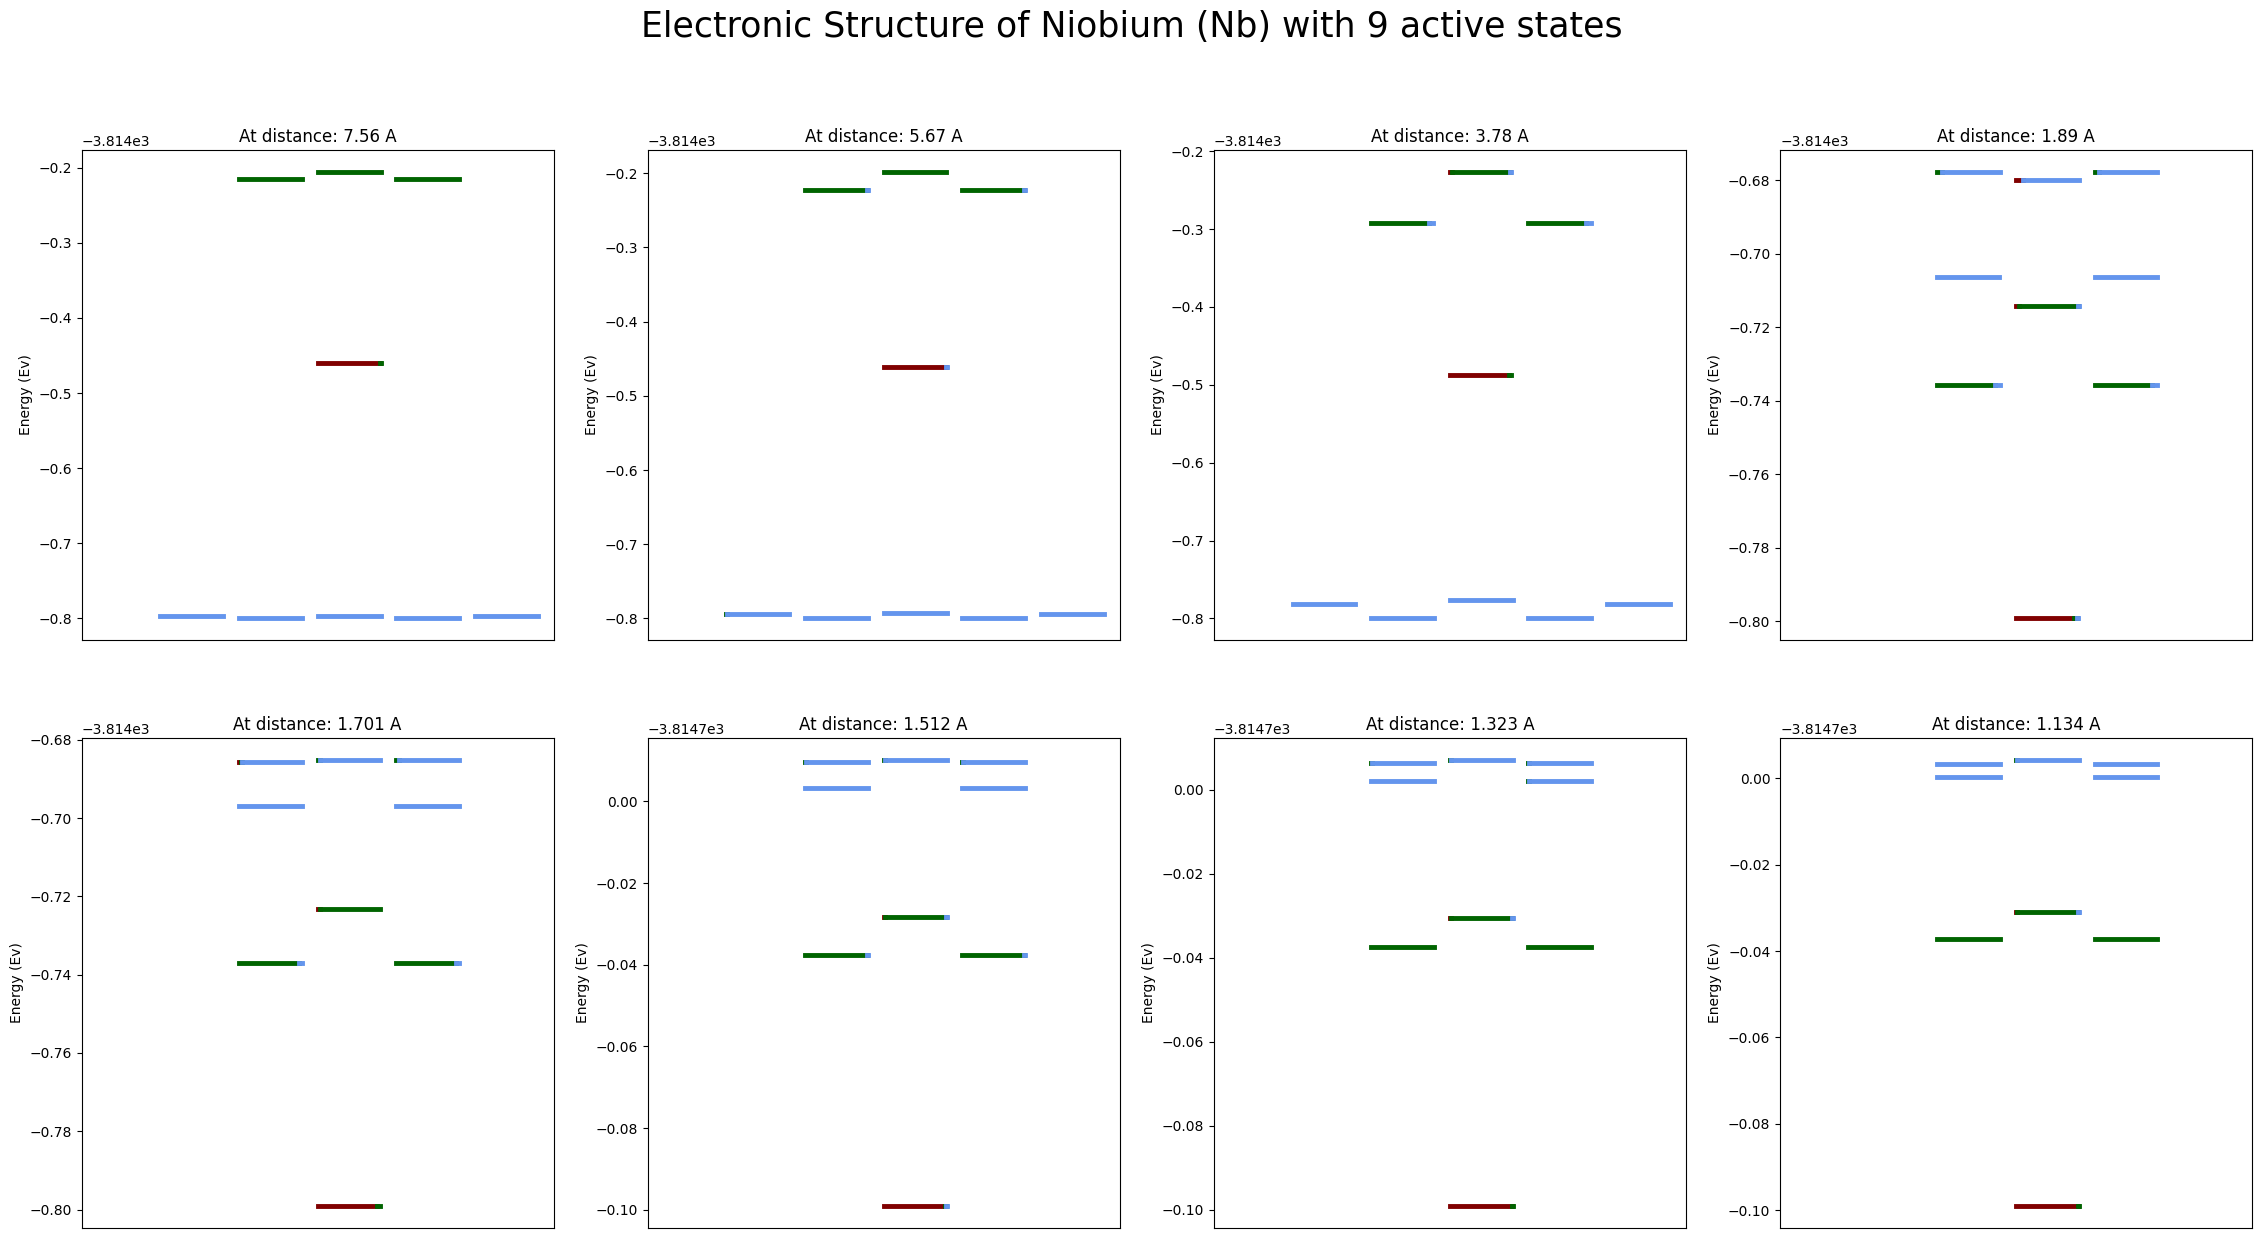

In [129]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
Nb_positions_new = Nb_positions[5:13]
Nb_Energies_new = Nb_Energies[5:13]
Nb_bond_lengths_list_new = Nb_bond_lengths_list[5:13]
Nb_population_total_new = Nb_population_total[5:13]

for pos, ener, bond_length, population in zip(Nb_positions_new, Nb_Energies_new, Nb_bond_lengths_list_new, Nb_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length} A')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Niobium (Nb) with 9 active states", fontsize=25)

plt.show()

# Mo

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital


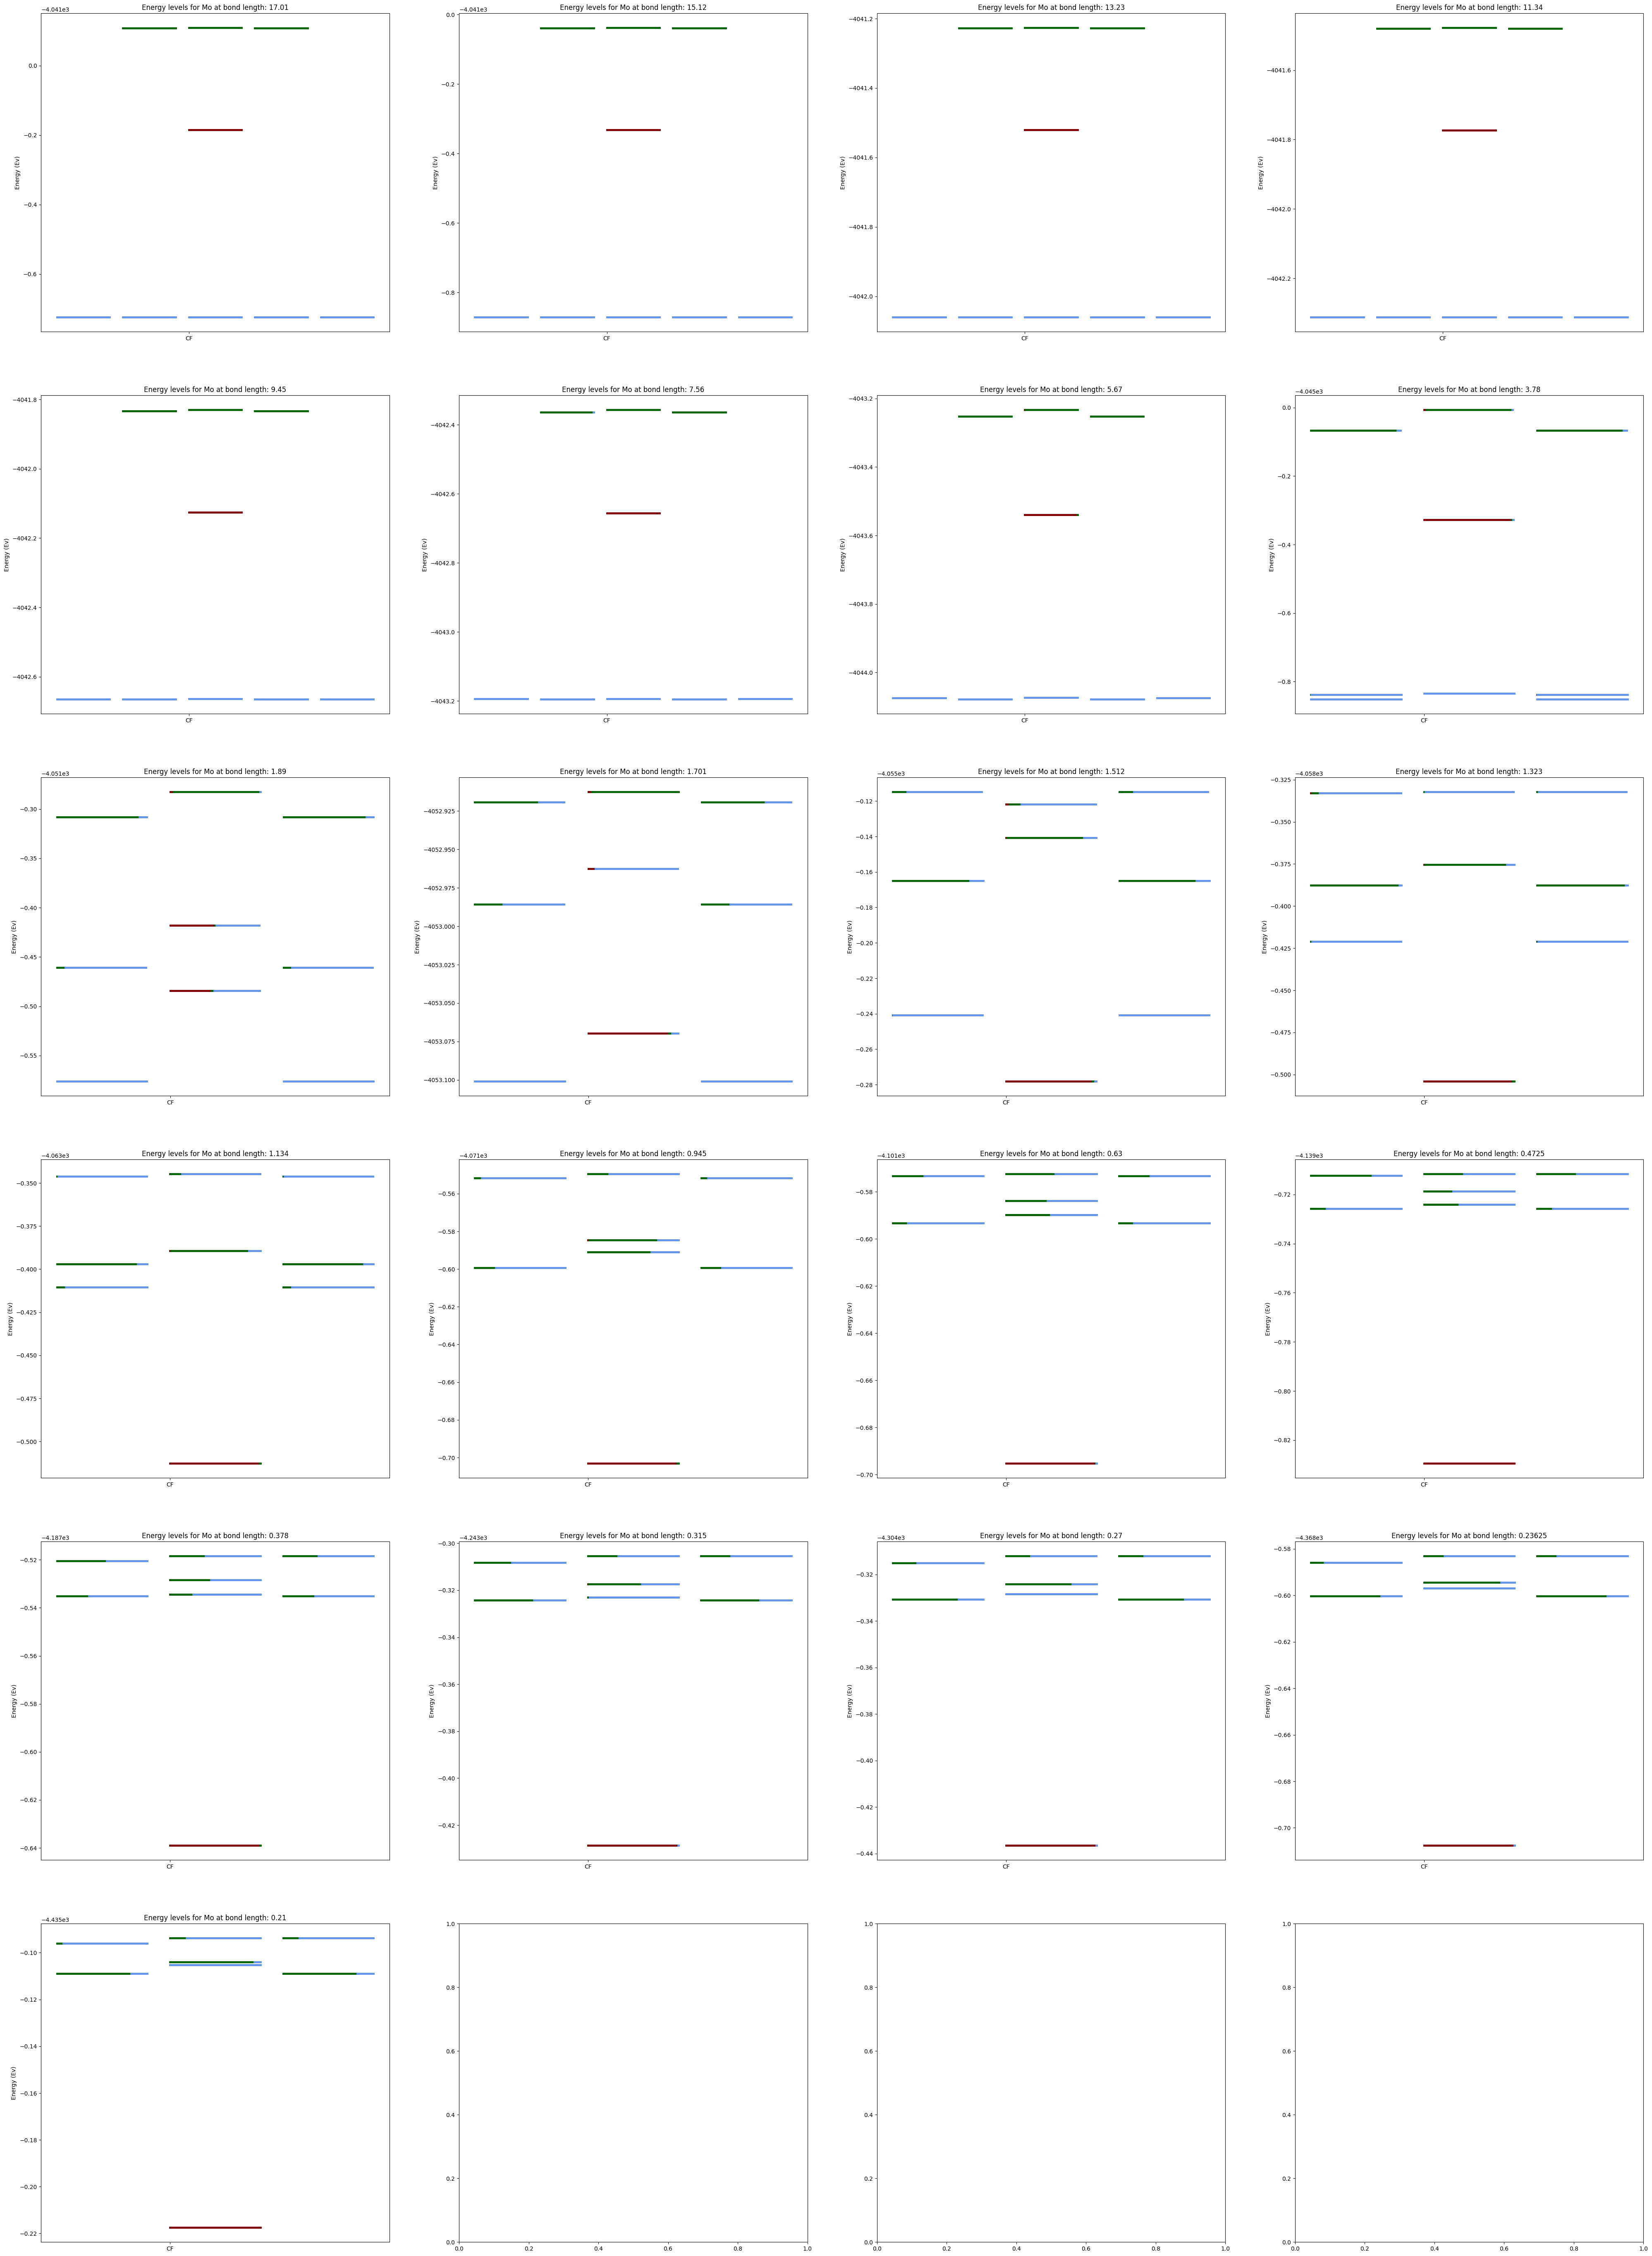

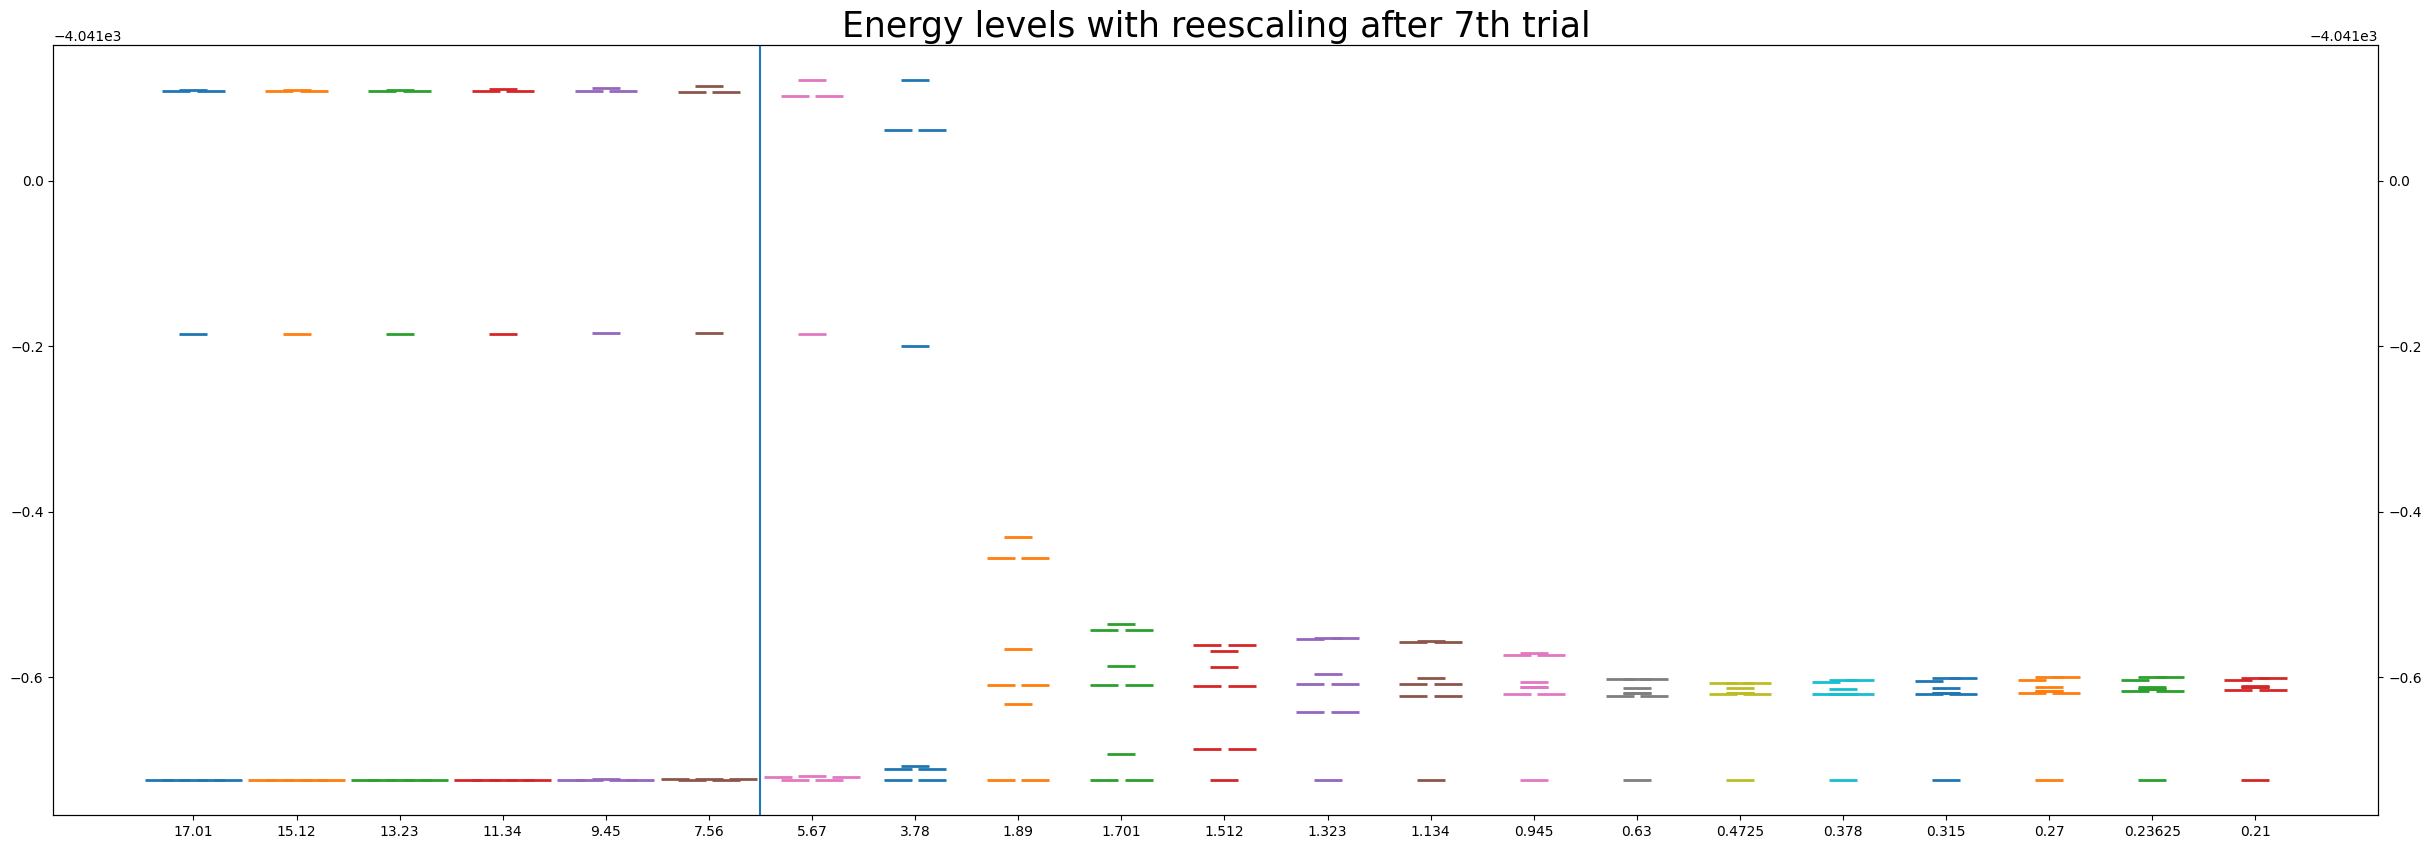

In [90]:
import matplotlib.pyplot as plt

files = ['\\molybdenum_no_spin_orbit_0.21.inp.o14549893.txt',
'\\molybdenum_no_spin_orbit_0.23625.inp.o14549883.txt',
'\\molybdenum_no_spin_orbit_0.27.inp.o14549874.txt',
'\\molybdenum_no_spin_orbit_0.315.inp.o14549854.txt',
'\\molybdenum_no_spin_orbit_0.378.inp.o14548087.txt',
'\\molybdenum_no_spin_orbit_0.4725.inp.o14548080.txt',
'\\molybdenum_no_spin_orbit_0.63.inp.o14548073.txt',
'\\molybdenum_no_spin_orbit_0.945.inp.o14548065.txt',
'\\molybdenum_no_spin_orbit_1.134.inp.o14556701.txt',
'\\molybdenum_no_spin_orbit_1.323.inp.o14556693.txt',
'\\molybdenum_no_spin_orbit_1.512.inp.o14556681.txt',
'\\molybdenum_no_spin_orbit_1.701.inp.o14556673.txt',
'\\molybdenum_no_spin_orbit_1.89.inp.o14530297.txt',
'\\molybdenum_no_spin_orbit_3.78.inp.o14530273.txt',
'\\molybdenum_no_spin_orbit_5.67.inp.o14530247.txt',
'\\molybdenum_no_spin_orbit_7.56.inp.o14530211.txt',
'\\molybdenum_no_spin_orbit_9.45.inp.o14470288.txt',
'\\molybdenum_no_spin_orbit_11.34.inp.o14416906.txt',
'\\molybdenum_no_spin_orbit_13.23.inp.o14416893.txt',
'\\molybdenum_no_spin_orbit_15.12.inp.o14397951.txt',
'\\molybdenum_no_spin_orbit_17.01.inp.o14397937.txt']
files.reverse()

Mo_17_01 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_rasscf, lines_after_rasscf))
Mo_population_17_01 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
Mo_15_12 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_rasscf, lines_after_rasscf))
Mo_population_15_12 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
Mo_13_23 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_rasscf, lines_after_rasscf))
Mo_population_13_23 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
Mo_11_34 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_rasscf, lines_after_rasscf))
Mo_population_11_34 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
Mo_9_45 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_rasscf, lines_after_rasscf))
Mo_population_9_45 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
Mo_7_56 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_rasscf, lines_after_rasscf))
Mo_population_7_56 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
Mo_5_67 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_rasscf, lines_after_rasscf))
Mo_population_5_67 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
Mo_3_78 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_rasscf, lines_after_rasscf))
Mo_population_3_78 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
Mo_1_89 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_rasscf, lines_after_rasscf))
Mo_population_1_89 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
Mo_1_701 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_rasscf, lines_after_rasscf))
Mo_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
Mo_1_512 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_rasscf, lines_after_rasscf))
Mo_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
Mo_1_323 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_rasscf, lines_after_rasscf))
Mo_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))
Mo_1_134 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_rasscf, lines_after_rasscf))
Mo_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_population, lines_after_population))
Mo_0_945 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_rasscf, lines_after_rasscf))
Mo_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_population, lines_after_population))
Mo_0_63 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_rasscf, lines_after_rasscf))
Mo_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_population, lines_after_population))
Mo_0_4725 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_rasscf, lines_after_rasscf))
Mo_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_population, lines_after_population))
Mo_0_378 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_rasscf, lines_after_rasscf))
Mo_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_population, lines_after_population))
Mo_0_315 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_rasscf, lines_after_rasscf))
Mo_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_population, lines_after_population))
Mo_0_27 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_rasscf, lines_after_rasscf))
Mo_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_population, lines_after_population))
Mo_0_23625 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_rasscf, lines_after_rasscf))
Mo_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_population, lines_after_population))
Mo_0_21 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_rasscf, lines_after_rasscf))
Mo_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_population, lines_after_population))

Mo_Energies = [Mo_17_01, Mo_15_12, Mo_13_23, Mo_11_34, Mo_9_45, Mo_7_56, Mo_5_67, Mo_3_78, Mo_1_89,
            Mo_1_701, Mo_1_512, Mo_1_323, Mo_1_134, Mo_0_945, Mo_0_63, Mo_0_4725, Mo_0_378, Mo_0_315, Mo_0_27, Mo_0_23625, Mo_0_21]
Mo_population_total = [Mo_population_17_01, Mo_population_15_12, Mo_population_13_23, Mo_population_11_34, Mo_population_9_45, Mo_population_7_56,
                    Mo_population_5_67, Mo_population_3_78, Mo_population_1_89, Mo_population_1_701, Mo_population_1_512, Mo_population_1_323,
                    Mo_population_1_134, Mo_population_0_945, Mo_population_0_63, Mo_population_0_4725, Mo_population_0_378, Mo_population_0_315,
                    Mo_population_0_27, Mo_population_0_23625, Mo_population_0_21]



Mo_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_8 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Mo_9 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Mo_10 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Mo_11 = [0.5, 1, 0, 0, 1, 0.5, 0.5, 1, 0]
Mo_12 = [0.5, 1, 0, 1, 0, 0.5, 0, 1, 0.5]
Mo_13 = [0.5, 1, 0, 1, 0, 0.5, 0, 1, 0.5]
Mo_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_15 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_16 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_17 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_18 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_19 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_20 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_21 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]


Mo_positions = [Mo_1, Mo_2, Mo_3, Mo_4, Mo_5, Mo_6, Mo_7, Mo_8, Mo_9, Mo_10, Mo_11, Mo_12, Mo_13, Mo_14, Mo_15, Mo_16, Mo_17, Mo_18, Mo_19, Mo_20, Mo_21]

Mo_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(Mo_positions, Mo_Energies, Mo_bond_lengths_list, Mo_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for Mo at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()

normaliser_ground_value = Mo_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 7th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(Mo_positions, Mo_Energies):
    if t >= 7:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax2.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    i=i+3
    t=t+1
plt.title("Energy levels with reescaling after 7th trial", fontsize=25)
Mo_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(Mo_positions_xticks, Mo_bond_lengths_list)
plt.axvline(17)
plt.show()


Mo_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Mo_8 = [0, 1, 0, 1, 0.5, 0.5, 0, 1, 0.5]
Mo_9 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Mo_10 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Mo_11 = [0.5, 1, 0, 0, 1, 0.5, 0.5, 1, 0]
Mo_12 = [0.5, 1, 0, 1, 0, 0.5, 0, 1, 0.5]
Mo_13 = [0.5, 1, 0, 1, 0, 0.5, 0, 1, 0.5]
Mo_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_15 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_16 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_17 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_18 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_19 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_20 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Mo_21 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]


Mo_positions = [Mo_1, Mo_2, Mo_3, Mo_4, Mo_5, Mo_6, Mo_7, Mo_8, Mo_9, Mo_10, Mo_11, Mo_12, Mo_13, Mo_14, Mo_15, Mo_16, Mo_17, Mo_18, Mo_19, Mo_20, Mo_21]

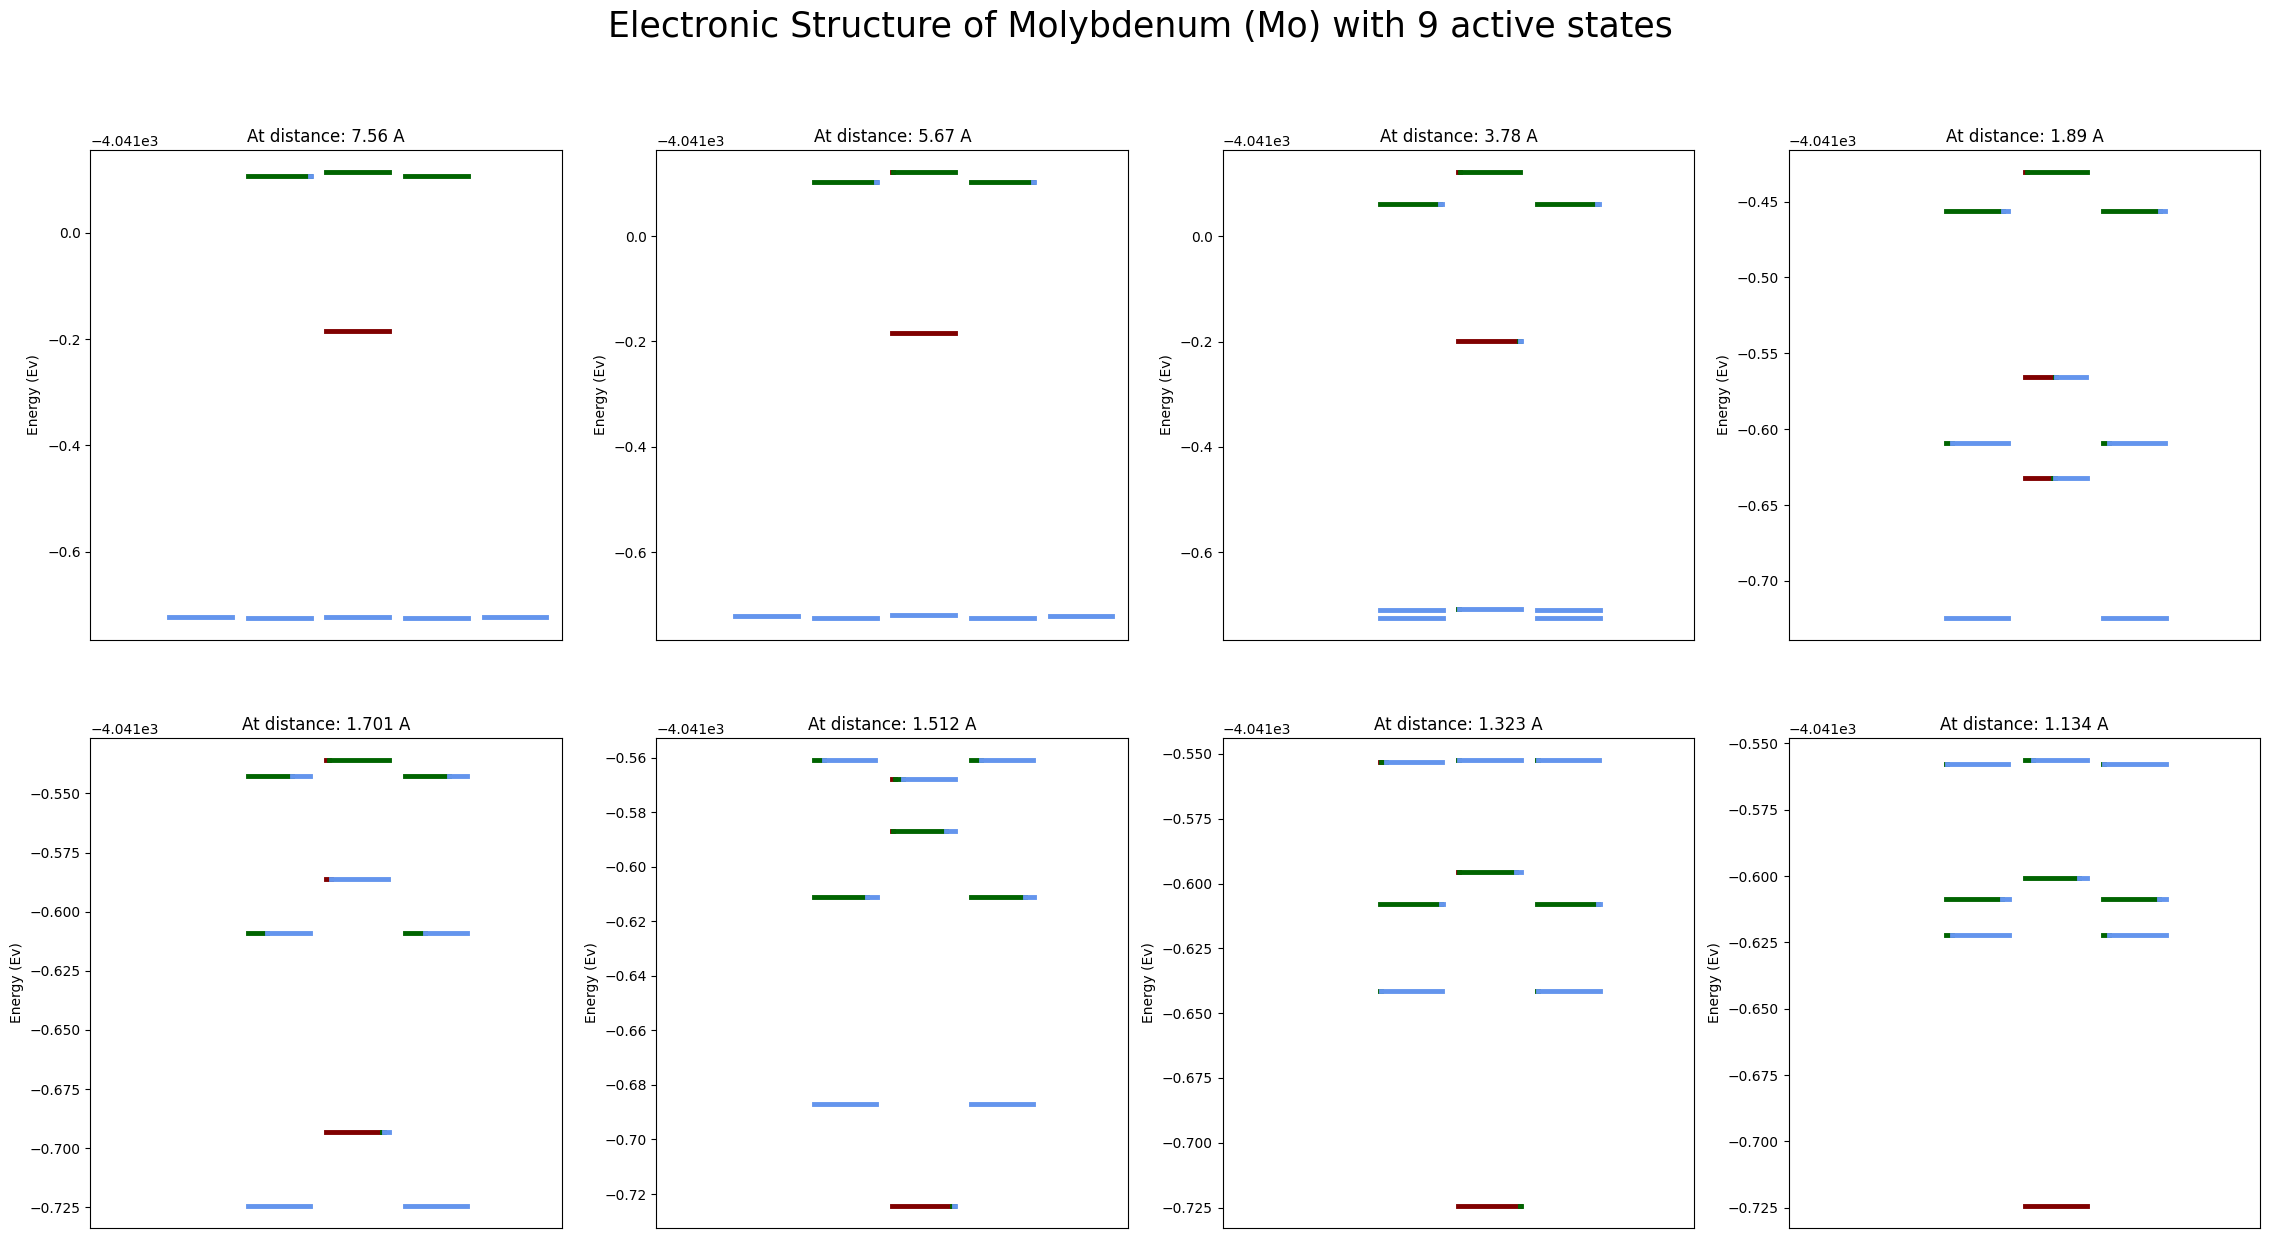

In [128]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
Mo_positions_new = Mo_positions[5:13]
Mo_Energies_new = Mo_Energies[5:13]
Mo_bond_lengths_list_new = Mo_bond_lengths_list[5:13]
Mo_population_total_new = Mo_population_total[5:13]

for pos, ener, bond_length, population in zip(Mo_positions_new, Mo_Energies_new, Mo_bond_lengths_list_new, Mo_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length} A')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Molybdenum (Mo) with 9 active states", fontsize=25)

plt.show()

# Ta

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


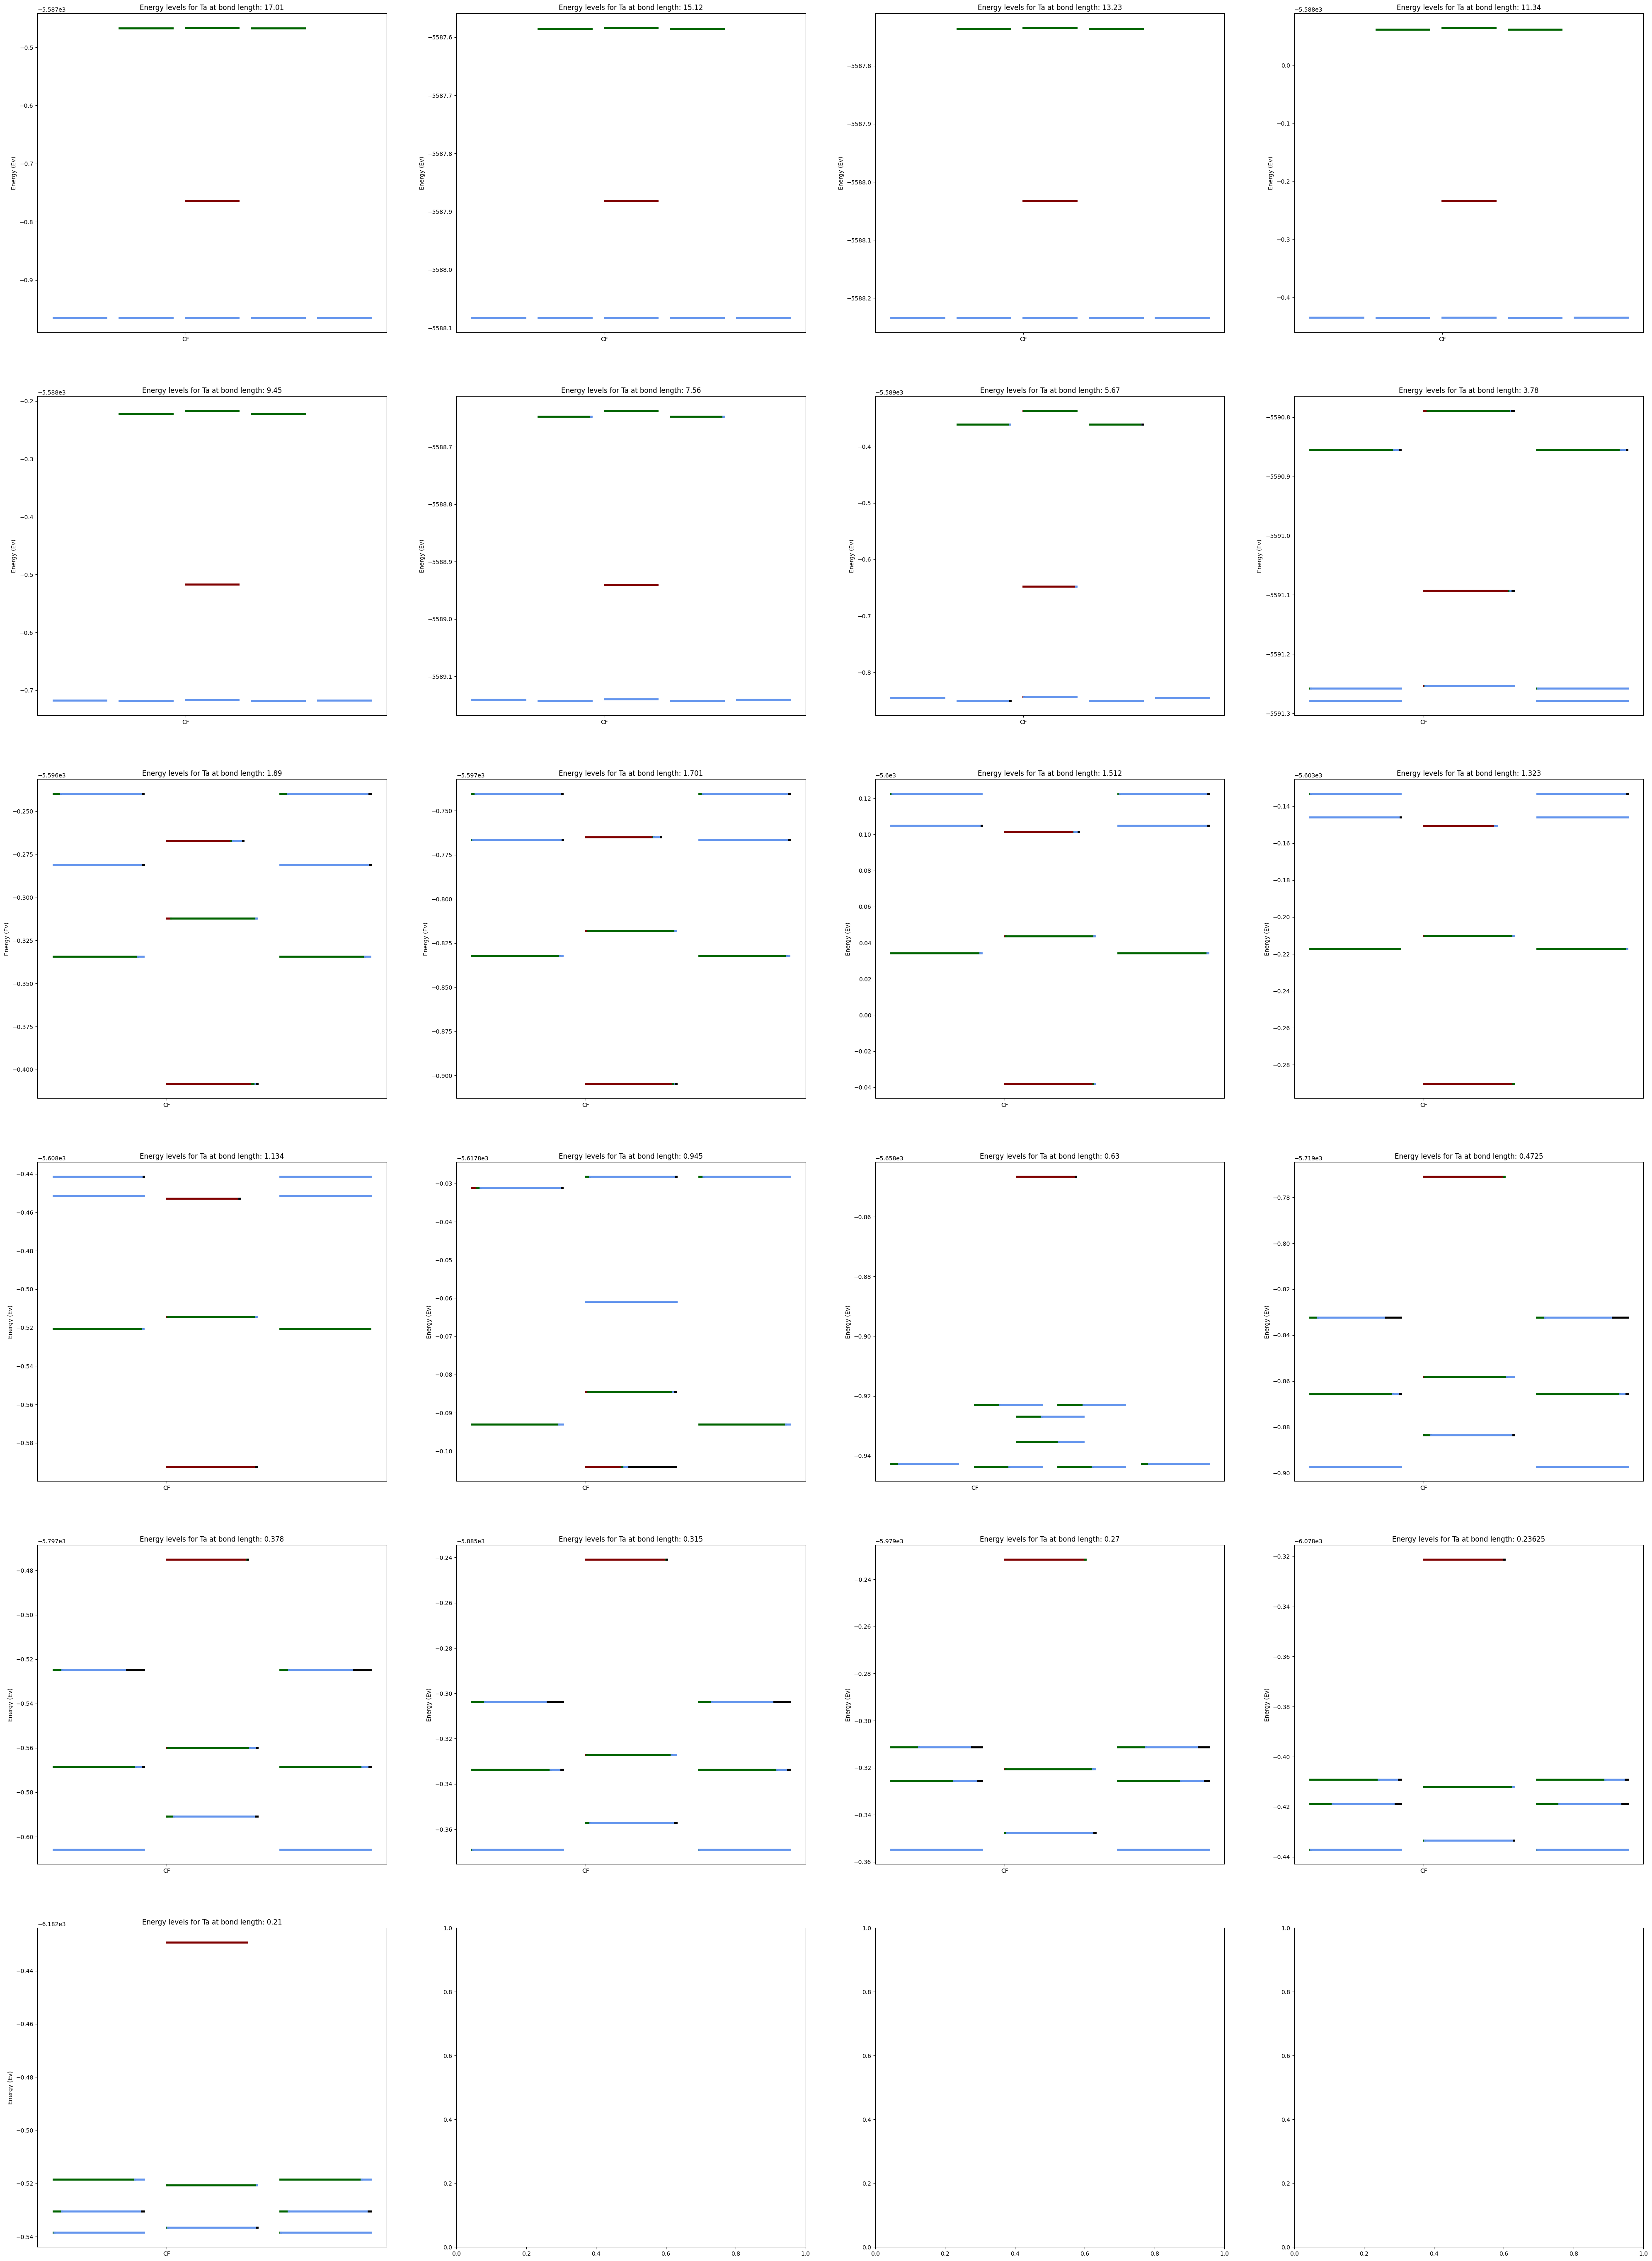

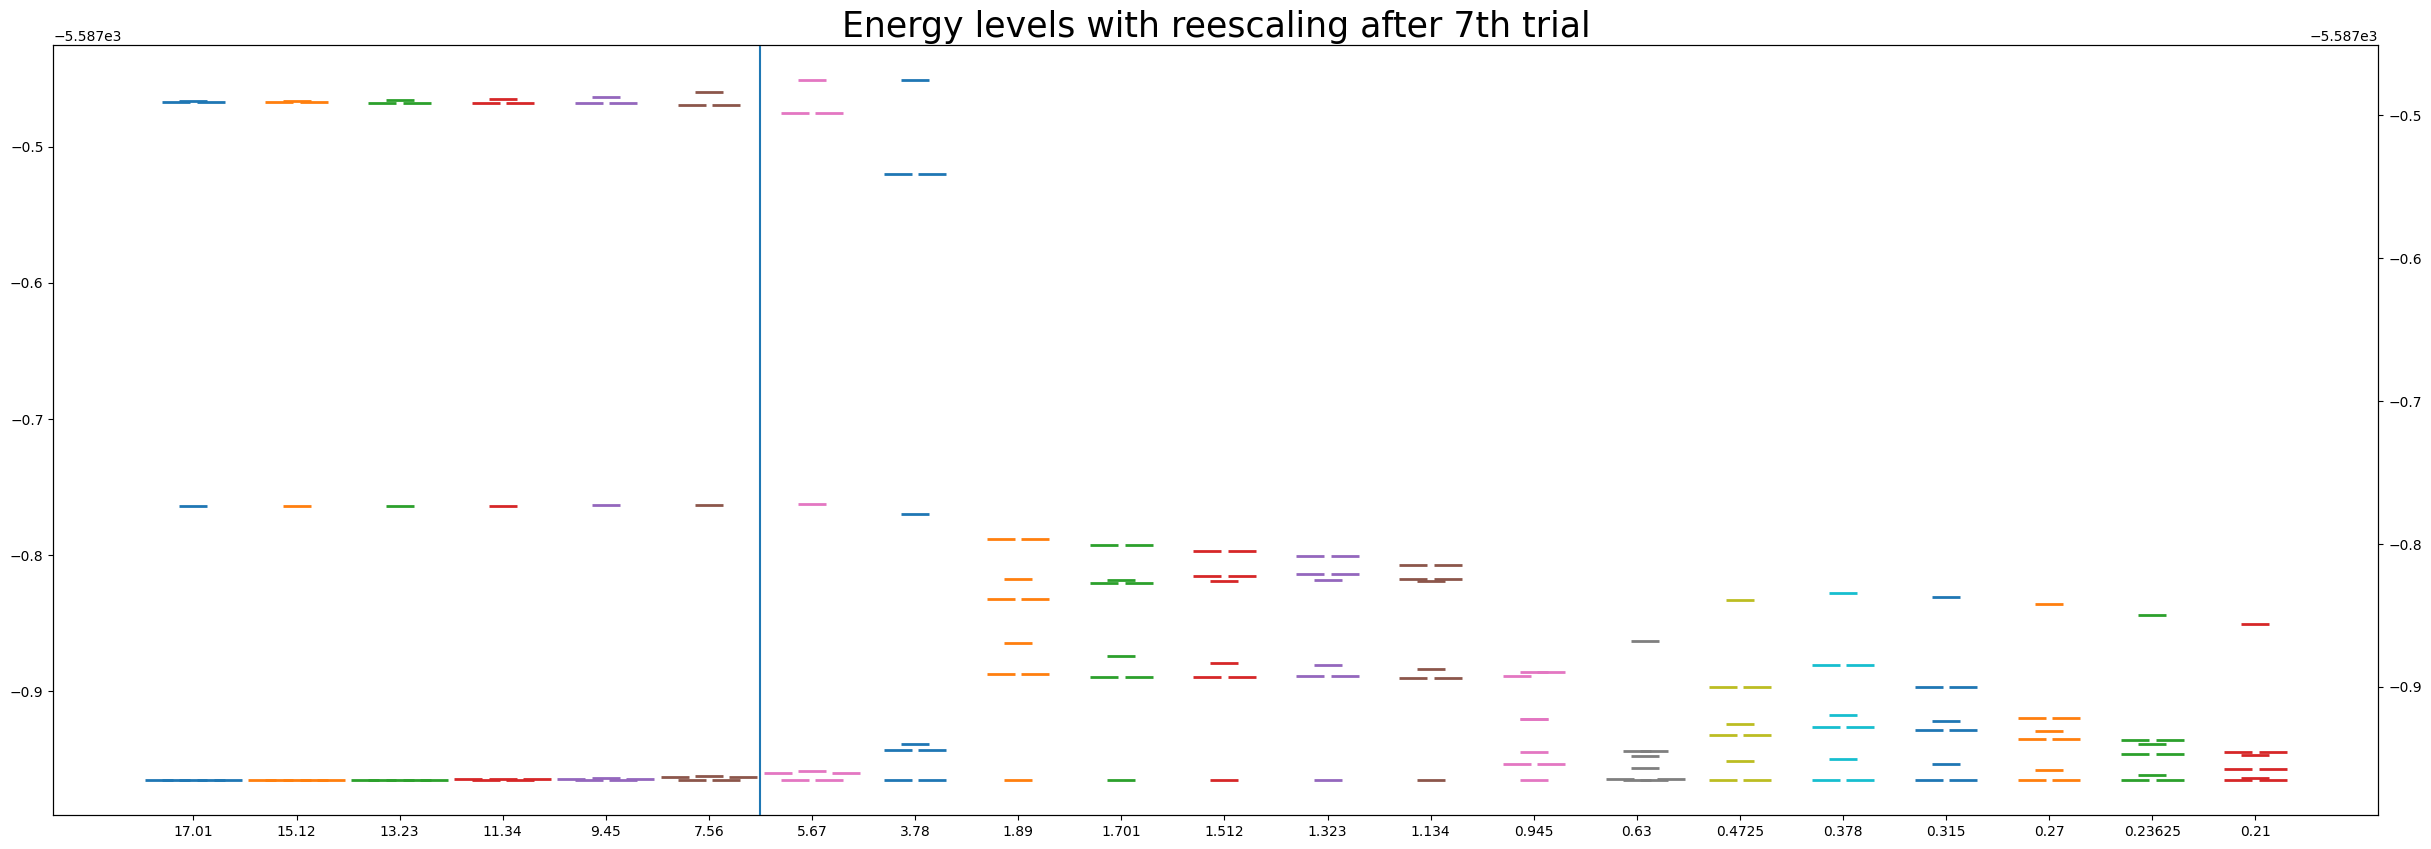

The simulations not showing a full bar are due to a population in the f-orbital


In [95]:
import matplotlib.pyplot as plt

files = ['\\tantalum_no_c_light_0.21.inp.o14549896.txt',
'\\tantalum_no_c_light_0.23625.inp.o14549889.txt',
'\\tantalum_no_c_light_0.27.inp.o14549877.txt',
'\\tantalum_no_c_light_0.315.inp.o14549867.txt',
'\\tantalum_no_c_light_0.378.inp.o14548090.txt',
'\\tantalum_no_c_light_0.4725.inp.o14548083.txt',
'\\tantalum_no_c_light_0.63.inp.o14548076.txt',
'\\tantalum_no_c_light_0.945.inp.o14548069.txt',
'\\tantalum_no_c_light_1.134.inp.o14556715.txt',
'\\tantalum_no_c_light_1.323.inp.o14556696.txt',
'\\tantalum_no_c_light_1.512.inp.o14556686.txt',
'\\tantalum_no_c_light_1.701.inp.o14556676.txt',
'\\tantalum_no_c_light_1.89.inp.o14530306.txt',
'\\tantalum_no_c_light_3.78.inp.o14530282.txt',
'\\tantalum_no_c_light_5.67.inp.o14530257.txt',
'\\tantalum_no_c_light_7.56.inp.o14530217.txt',
'\\tantalum_no_c_light_9.45.inp.o14470291.txt',
'\\tantalum_no_c_light_11.34.inp.o14416910.txt',
'\\tantalum_no_c_light_13.23.inp.o14416902.txt',
'\\tantalum_no_c_light_15.12.inp.o14397956.txt',
'\\tantalum_no_c_light_17.01.inp.o14397945.txt']
files.reverse()

Ta_17_01 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_rasscf, lines_after_rasscf))
Ta_population_17_01 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
Ta_15_12 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_rasscf, lines_after_rasscf))
Ta_population_15_12 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
Ta_13_23 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_rasscf, lines_after_rasscf))
Ta_population_13_23 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
Ta_11_34 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_rasscf, lines_after_rasscf))
Ta_population_11_34 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
Ta_9_45 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_rasscf, lines_after_rasscf))
Ta_population_9_45 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
Ta_7_56 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_rasscf, lines_after_rasscf))
Ta_population_7_56 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
Ta_5_67 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_rasscf, lines_after_rasscf))
Ta_population_5_67 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
Ta_3_78 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_rasscf, lines_after_rasscf))
Ta_population_3_78 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
Ta_1_89 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_rasscf, lines_after_rasscf))
Ta_population_1_89 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
Ta_1_701 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_rasscf, lines_after_rasscf))
Ta_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
Ta_1_512 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_rasscf, lines_after_rasscf))
Ta_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
Ta_1_323 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_rasscf, lines_after_rasscf))
Ta_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))
Ta_1_134 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_rasscf, lines_after_rasscf))
Ta_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_population, lines_after_population))
Ta_0_945 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_rasscf, lines_after_rasscf))
Ta_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_population, lines_after_population))
Ta_0_63 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_rasscf, lines_after_rasscf))
Ta_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_population, lines_after_population))
Ta_0_4725 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_rasscf, lines_after_rasscf))
Ta_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_population, lines_after_population))
Ta_0_378 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_rasscf, lines_after_rasscf))
Ta_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_population, lines_after_population))
Ta_0_315 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_rasscf, lines_after_rasscf))
Ta_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_population, lines_after_population))
Ta_0_27 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_rasscf, lines_after_rasscf))
Ta_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_population, lines_after_population))
Ta_0_23625 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_rasscf, lines_after_rasscf))
Ta_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_population, lines_after_population))
Ta_0_21 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_rasscf, lines_after_rasscf))
Ta_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_population, lines_after_population))

Ta_Energies = [Ta_17_01, Ta_15_12, Ta_13_23, Ta_11_34, Ta_9_45, Ta_7_56, Ta_5_67, Ta_3_78, Ta_1_89,
            Ta_1_701, Ta_1_512, Ta_1_323, Ta_1_134, Ta_0_945, Ta_0_63, Ta_0_4725, Ta_0_378, Ta_0_315, Ta_0_27, Ta_0_23625, Ta_0_21]
Ta_population_total = [Ta_population_17_01, Ta_population_15_12, Ta_population_13_23, Ta_population_11_34, Ta_population_9_45, Ta_population_7_56,
                    Ta_population_5_67, Ta_population_3_78, Ta_population_1_89, Ta_population_1_701, Ta_population_1_512, Ta_population_1_323,
                    Ta_population_1_134, Ta_population_0_945, Ta_population_0_63, Ta_population_0_4725, Ta_population_0_378, Ta_population_0_315,
                    Ta_population_0_27, Ta_population_0_23625, Ta_population_0_21]

Ta_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_8 = [0, 1, -0, 1, 0.5, 0.5, 0, 1, 0.5]
Ta_9 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0]
Ta_10 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0]
Ta_11 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
Ta_12 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
Ta_13 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
Ta_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Ta_15 = [0.5, 1, 1.5, 0, 0.75, 0.75, 0.5, 1, 0.75]
Ta_16 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_17 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_18 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_19 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_20 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_21 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]

Ta_positions = [Ta_1, Ta_2, Ta_3, Ta_4, Ta_5, Ta_6, Ta_7, Ta_8, Ta_9, Ta_10, Ta_11, Ta_12, Ta_13, Ta_14, Ta_15, Ta_16, Ta_17, Ta_18, Ta_19, Ta_20, Ta_21]

Ta_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")
print("Black is the f-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue', 'black']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(Ta_positions, Ta_Energies, Ta_bond_lengths_list, Ta_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for Ta at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()

normaliser_ground_value = Ta_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 7th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(Ta_positions, Ta_Energies):
    if t >= 7:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax2.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    i=i+3
    t=t+1
plt.title("Energy levels with reescaling after 7th trial", fontsize=25)
Ta_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(Ta_positions_xticks, Ta_bond_lengths_list)
plt.axvline(17)
plt.show()
print("The simulations not showing a full bar are due to a population in the f-orbital")

Ta_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Ta_8 = [0, 1, -0, 1, 0.5, 0.5, 0, 1, 0.5]
Ta_9 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0]
Ta_10 = [0.5, 1, 0, 0.5, 1, 0, 0.5, 1, 0]
Ta_11 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
Ta_12 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
Ta_13 = [0.5, 1, 0, 0.5, 0.5, 1, 0, 1, 0]
Ta_14 = [0.5, 1, 0, 0.5, 0.5, 0.5, 0, 1, 0.5]
Ta_15 = [0.5, 1, 1.5, 0, 0.75, 0.75, 0.5, 1, 0.75]
Ta_16 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_17 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_18 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_19 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_20 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]
Ta_21 = [0, 1, 0.5, 0, 1, 0.5, 1, 0, 0.5]



Ta_positions = [Ta_1, Ta_2, Ta_3, Ta_4, Ta_5, Ta_6, Ta_7, Ta_8, Ta_9, Ta_10, Ta_11, Ta_12, Ta_13, Ta_14, Ta_15, Ta_16, Ta_17, Ta_18, Ta_19, Ta_20, Ta_21]

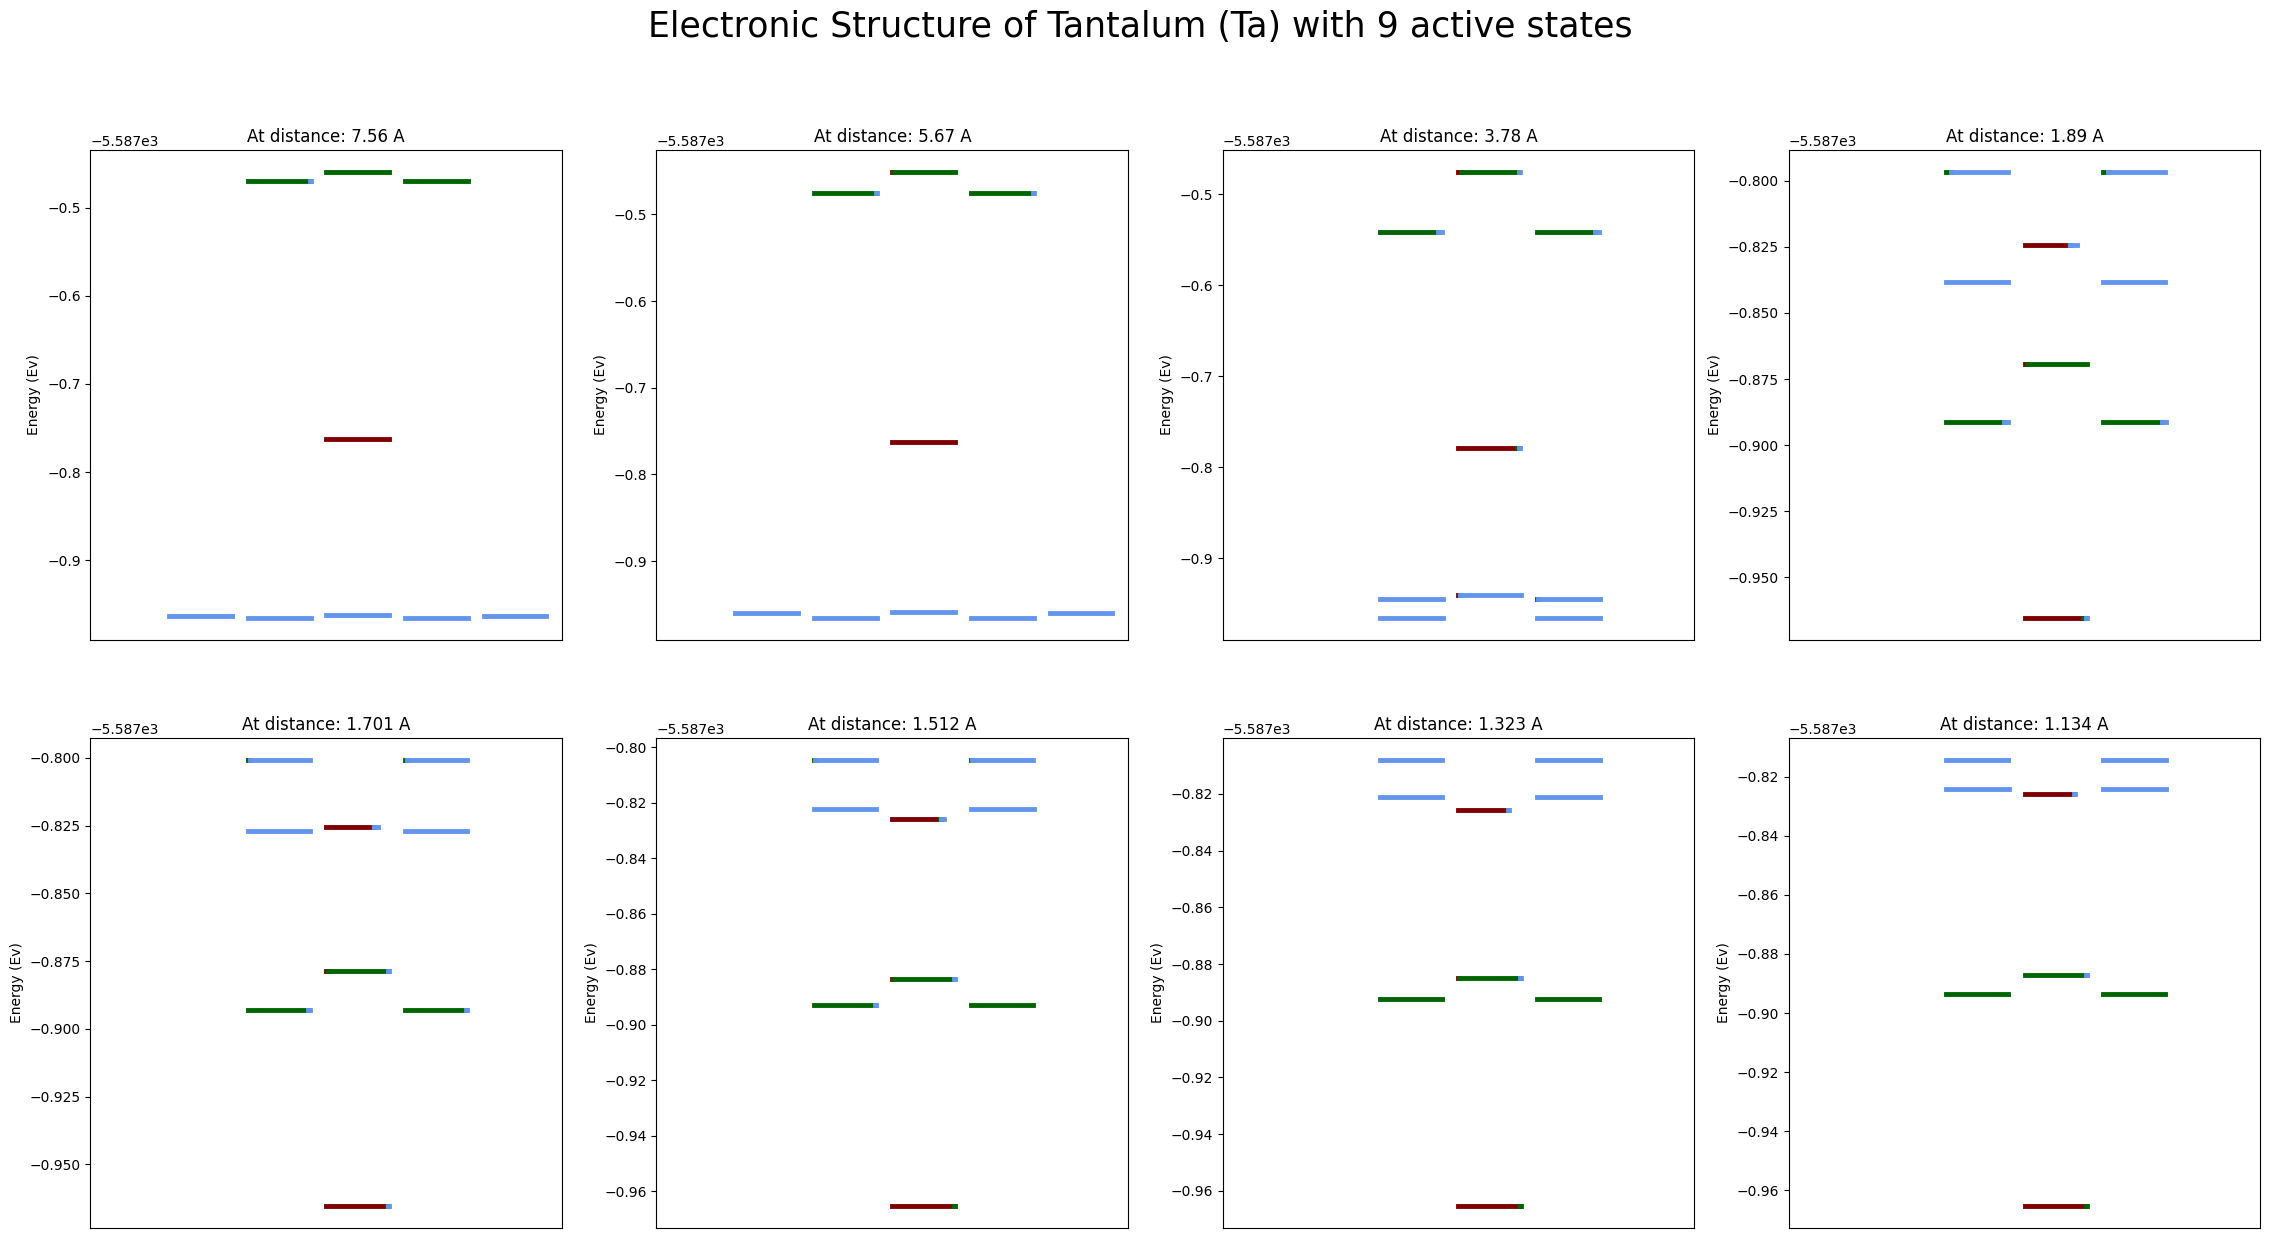

In [127]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
Ta_positions_new = Ta_positions[5:13]
Ta_Energies_new = Ta_Energies[5:13]
Ta_bond_lengths_list_new = Ta_bond_lengths_list[5:13]
Ta_population_total_new = Ta_population_total[5:13]

for pos, ener, bond_length, population in zip(Ta_positions_new, Ta_Energies_new, Ta_bond_lengths_list_new, Ta_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length} A')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Tantalum (Ta) with 9 active states", fontsize=25)
plt.show()

# W

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


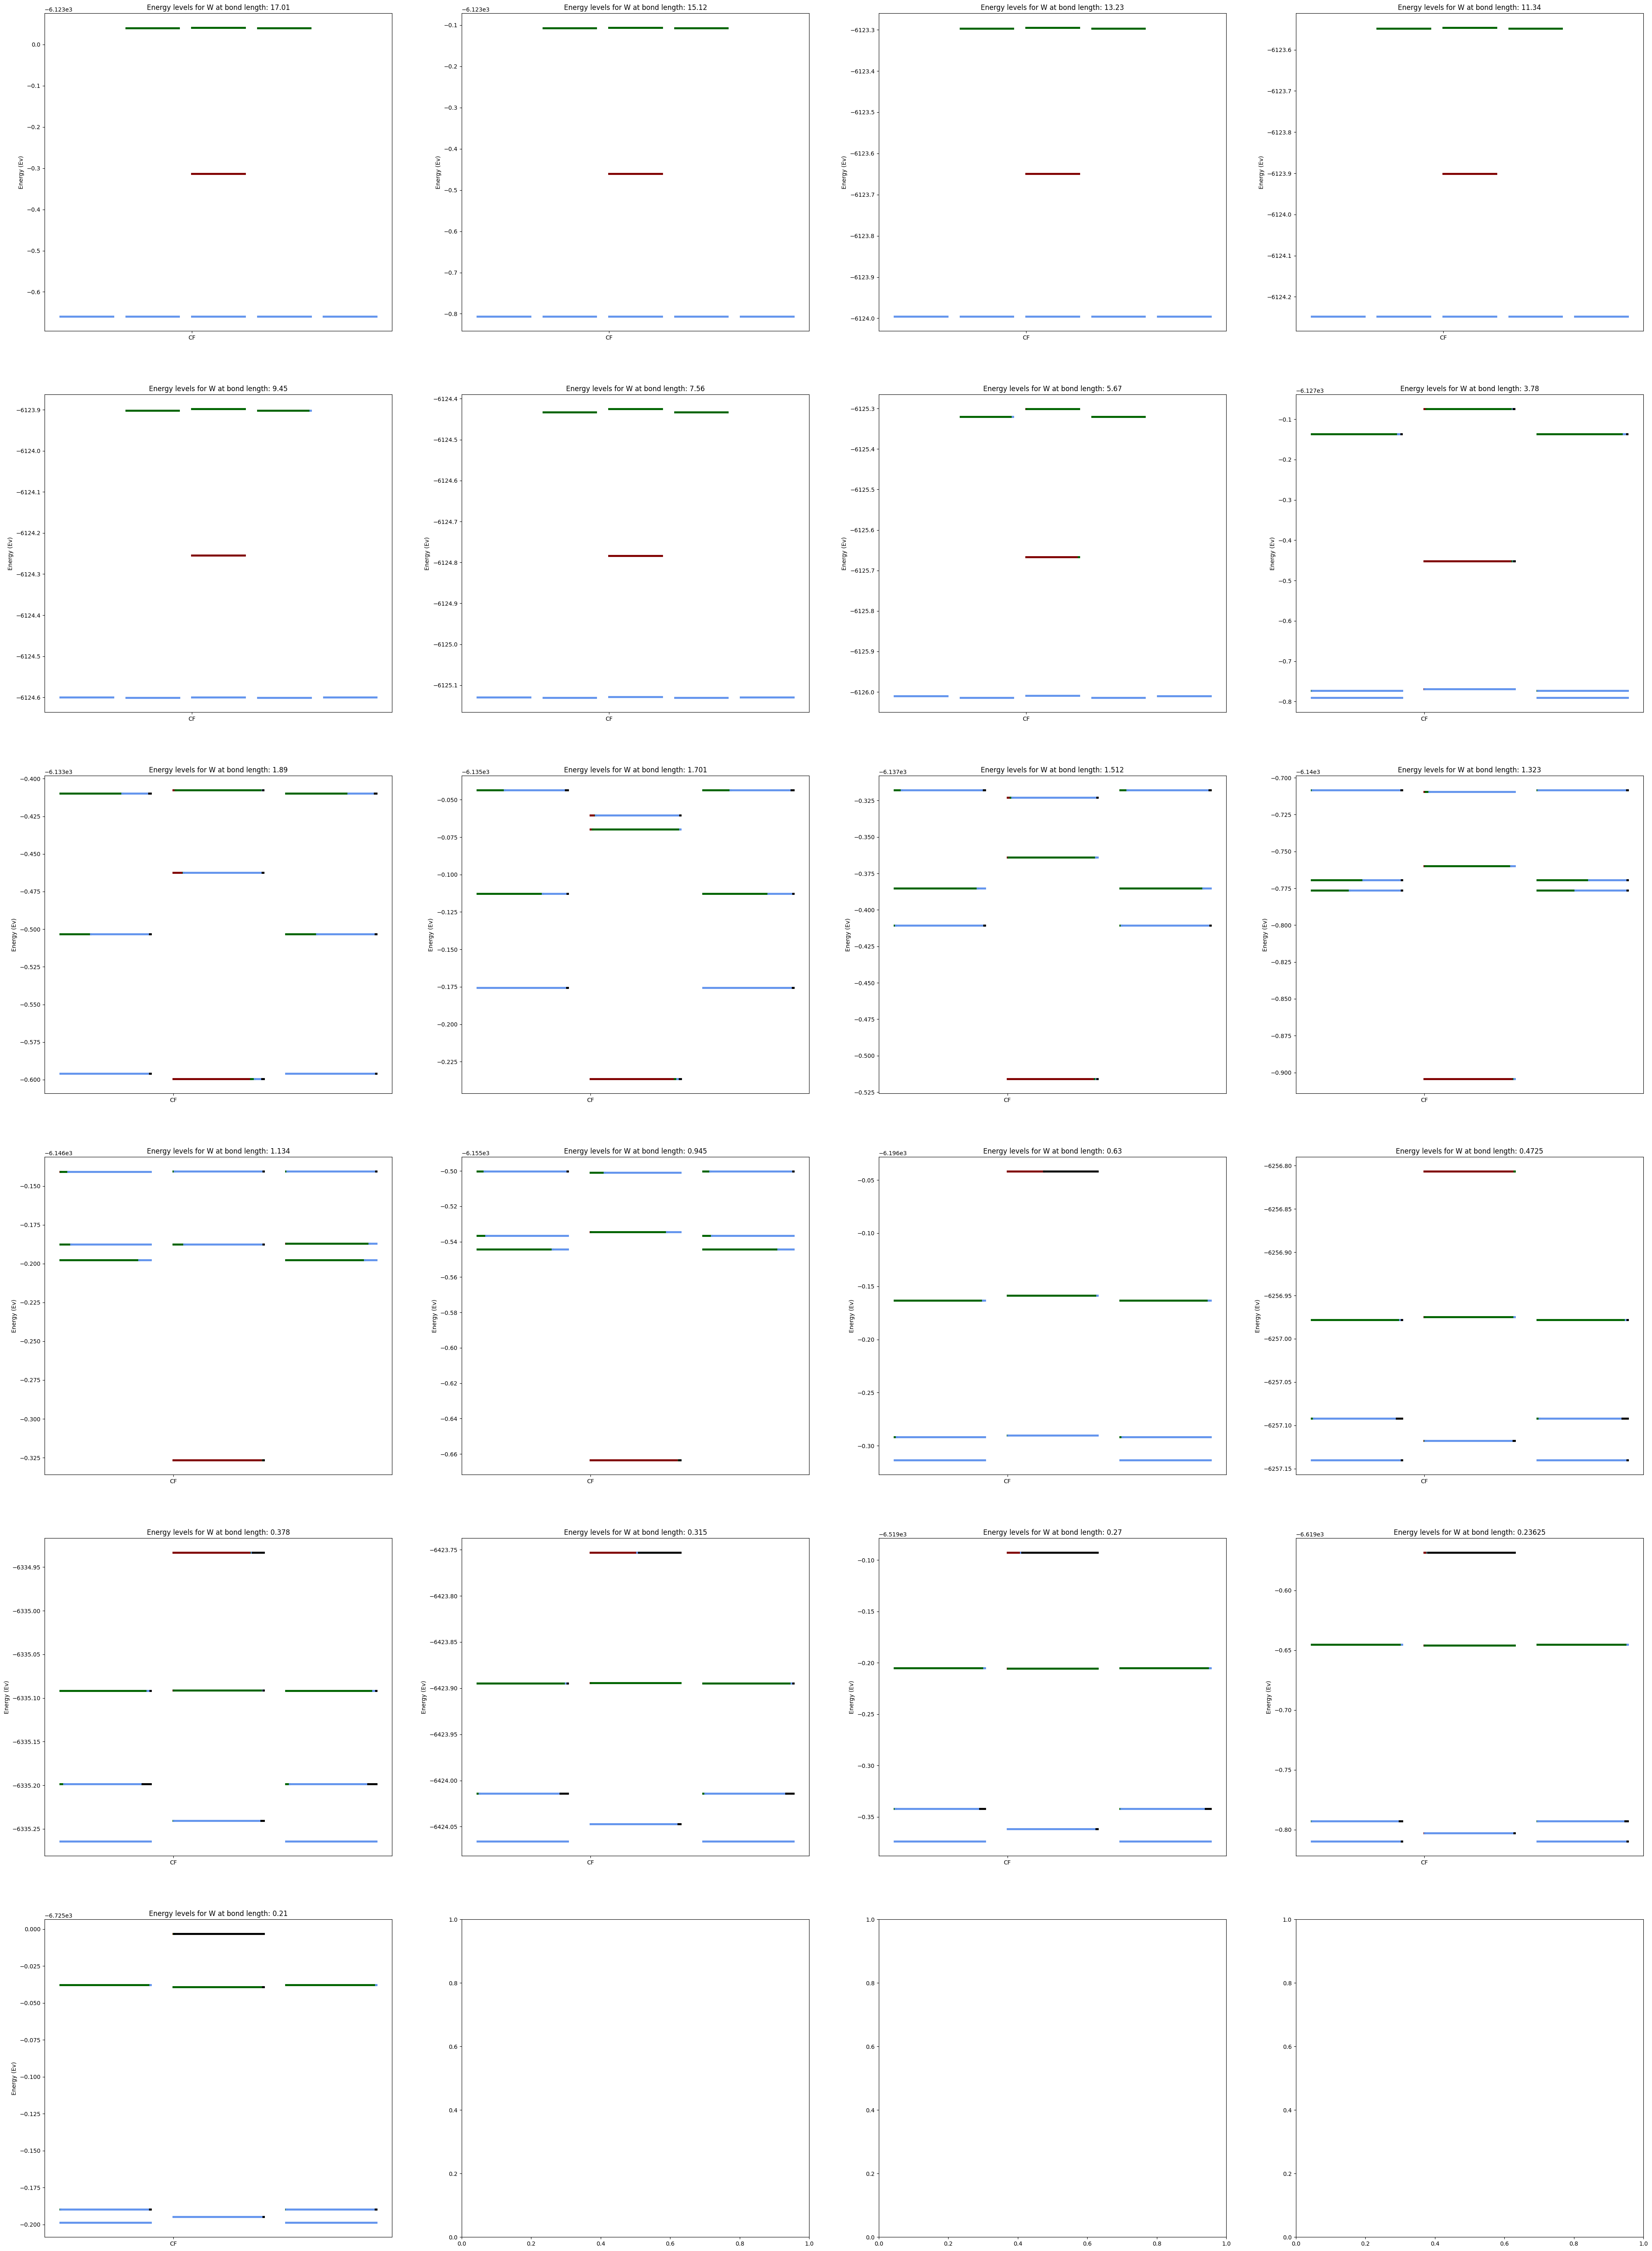

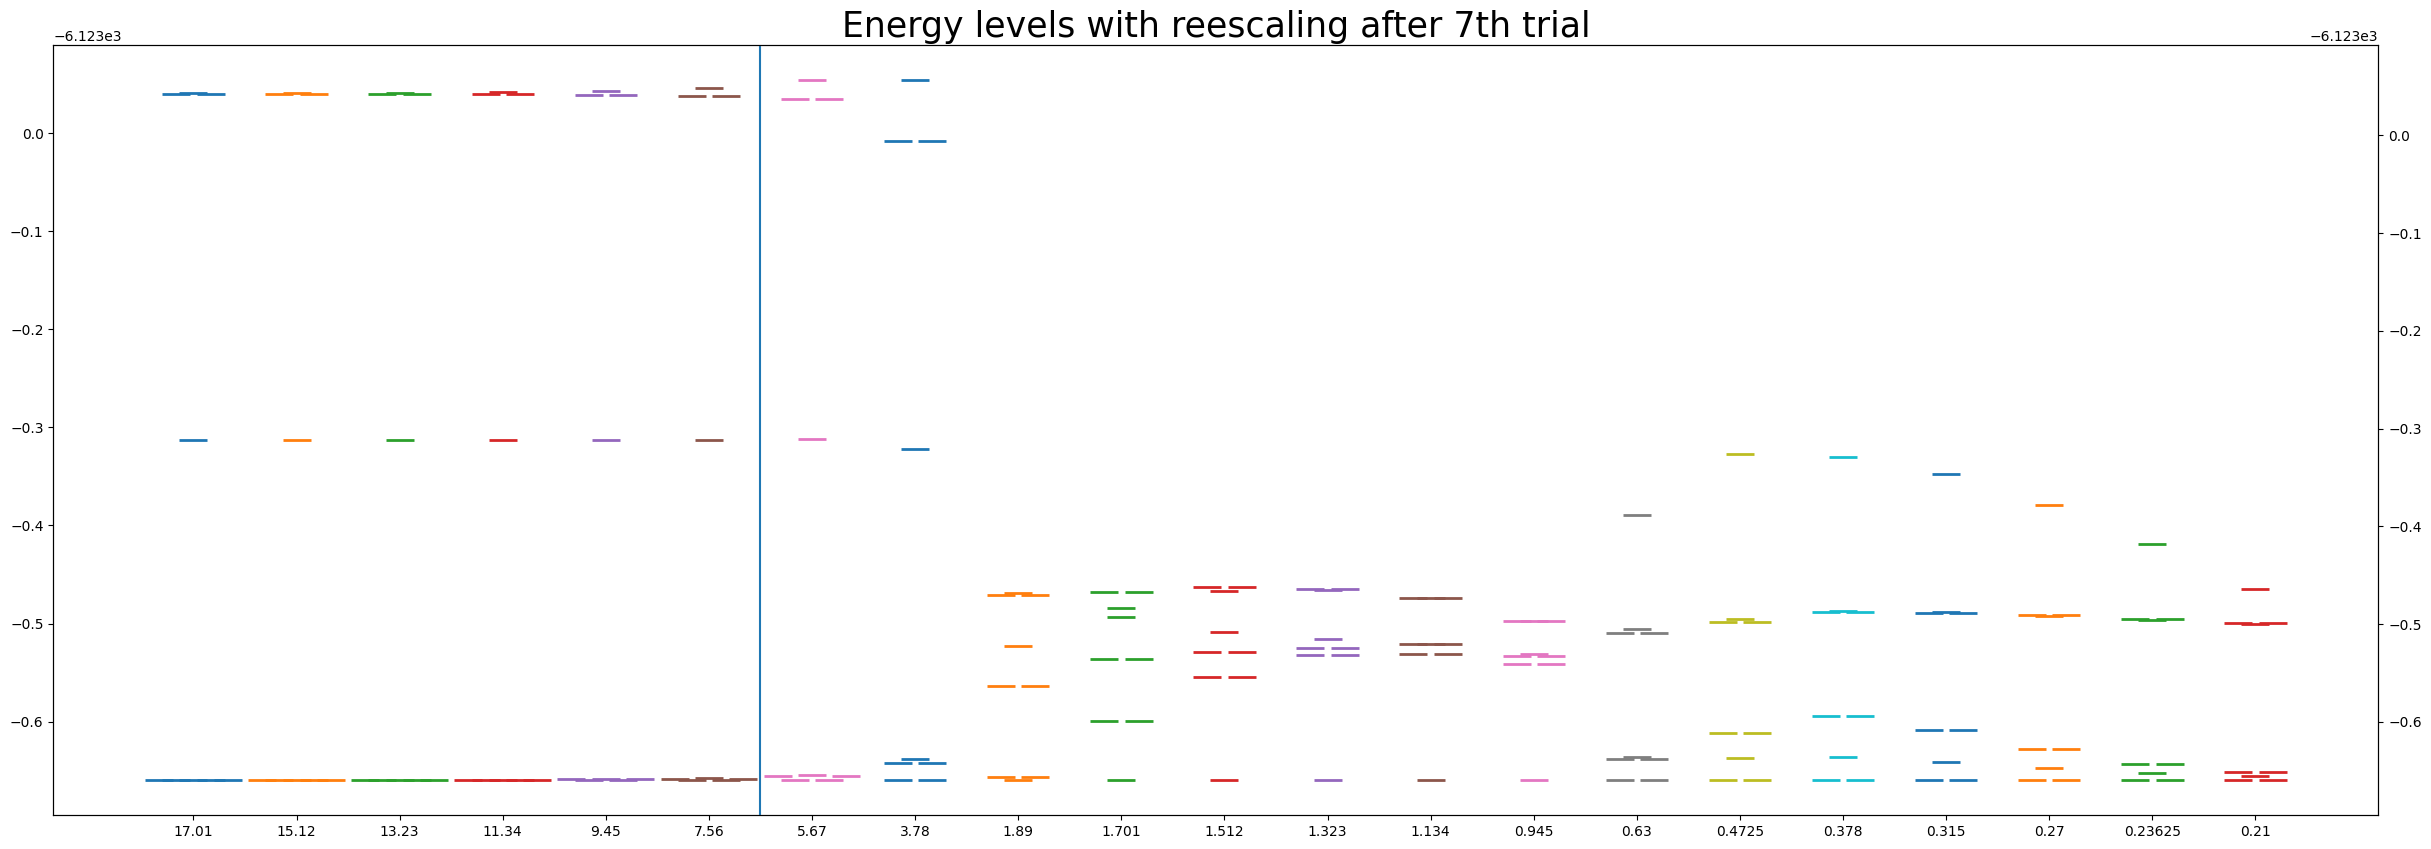

In [97]:
import matplotlib.pyplot as plt


files = ['\\tungsten_no_c_light_0.21.inp.o14549898.txt',
'\\tungsten_no_c_light_0.23625.inp.o14549891.txt',
'\\tungsten_no_c_light_0.27.inp.o14549881.txt',
'\\tungsten_no_c_light_0.315.inp.o14549871.txt',
'\\tungsten_no_c_light_0.378.inp.o14548092.txt',
'\\tungsten_no_c_light_0.4725.inp.o14548085.txt',
'\\tungsten_no_c_light_0.63.inp.o14548078.txt',
'\\tungsten_no_c_light_0.945.inp.o14548071.txt',
'\\tungsten_no_c_light_1.134.inp.o14556729.txt',
'\\tungsten_no_c_light_1.323.inp.o14556698.txt',
'\\tungsten_no_c_light_1.512.inp.o14556689.txt',
'\\tungsten_no_c_light_1.701.inp.o14556678.txt',
'\\tungsten_no_c_light_1.89.inp.o14530311.txt',
'\\tungsten_no_c_light_3.78.inp.o14530289.txt',
'\\tungsten_no_c_light_5.67.inp.o14530263.txt',
'\\tungsten_no_c_light_7.56.inp.o14530229.txt',
'\\tungsten_no_c_light_9.45.inp.o14470294.txt',
'\\tungsten_no_c_light_11.34.inp.o14416917.txt',
'\\tungsten_no_c_light_13.23.inp.o14416904.txt',
'\\tungsten_no_c_light_15.12.inp.o14397959.txt',
'\\tungsten_no_c_light_17.01.inp.o14397943.txt']
files.reverse()

W_17_01 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_rasscf, lines_after_rasscf))
W_population_17_01 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
W_15_12 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_rasscf, lines_after_rasscf))
W_population_15_12 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
W_13_23 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_rasscf, lines_after_rasscf))
W_population_13_23 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
W_11_34 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_rasscf, lines_after_rasscf))
W_population_11_34 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
W_9_45 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_rasscf, lines_after_rasscf))
W_population_9_45 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
W_7_56 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_rasscf, lines_after_rasscf))
W_population_7_56 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
W_5_67 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_rasscf, lines_after_rasscf))
W_population_5_67 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
W_3_78 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_rasscf, lines_after_rasscf))
W_population_3_78 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
W_1_89 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_rasscf, lines_after_rasscf))
W_population_1_89 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
W_1_701 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_rasscf, lines_after_rasscf))
W_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
W_1_512 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_rasscf, lines_after_rasscf))
W_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
W_1_323 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_rasscf, lines_after_rasscf))
W_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))
W_1_134 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_rasscf, lines_after_rasscf))
W_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_population, lines_after_population))
W_0_945 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_rasscf, lines_after_rasscf))
W_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_population, lines_after_population))
W_0_63 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_rasscf, lines_after_rasscf))
W_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_population, lines_after_population))
W_0_4725 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_rasscf, lines_after_rasscf))
W_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_population, lines_after_population))
W_0_378 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_rasscf, lines_after_rasscf))
W_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_population, lines_after_population))
W_0_315 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_rasscf, lines_after_rasscf))
W_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_population, lines_after_population))
W_0_27 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_rasscf, lines_after_rasscf))
W_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_population, lines_after_population))
W_0_23625 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_rasscf, lines_after_rasscf))
W_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_population, lines_after_population))
W_0_21 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_rasscf, lines_after_rasscf))
W_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_population, lines_after_population))

W_Energies = [W_17_01, W_15_12, W_13_23, W_11_34, W_9_45, W_7_56, W_5_67, W_3_78, W_1_89,
            W_1_701, W_1_512, W_1_323, W_1_134, W_0_945, W_0_63, W_0_4725, W_0_378, W_0_315, W_0_27, W_0_23625, W_0_21]
W_population_total = [W_population_17_01, W_population_15_12, W_population_13_23, W_population_11_34, W_population_9_45, W_population_7_56,
                    W_population_5_67, W_population_3_78, W_population_1_89, W_population_1_701, W_population_1_512, W_population_1_323,
                    W_population_1_134, W_population_0_945, W_population_0_63, W_population_0_4725, W_population_0_378, W_population_0_315,
                    W_population_0_27, W_population_0_23625, W_population_0_21]

W_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_8 = [0, 1, -0, 1, 0.5, 0.5, 0, 1, 0.5]
W_9 = [0.5, 1, 0, 0, 1, 0.5, 0, 1, 0.5]
W_10 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_11 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_12 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_13 = [0.5, 1, 0, 0, 0.5, 1, 0, 1, 0.5]
W_14 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_15 = [0, 1, 0, 1, 0.5, 0, 1, 0.5, 0.5]
W_16 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
W_17 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
W_18 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
W_19 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
W_20 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
W_21 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]


W_positions = [W_1, W_2, W_3, W_4, W_5, W_6, W_7, W_8, W_9, W_10, W_11, W_12, W_13, W_14, W_15, W_16, W_17, W_18, W_19, W_20, W_21]

W_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")
print("Black is the f-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue', 'black']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(W_positions, W_Energies, W_bond_lengths_list, W_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for W at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()

normaliser_ground_value = W_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 7th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(W_positions, W_Energies):
    if t >= 7:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax2.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    i=i+3
    t=t+1
plt.title("Energy levels with reescaling after 7th trial", fontsize=25)
W_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(W_positions_xticks, W_bond_lengths_list)
plt.axvline(17)
plt.show()

W_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
W_8 = [0, 1, -0, 1, 0.5, 0.5, 0, 1, 0.5]
W_9 = [0.5, 1, 0, 0, 1, 0.5, 0, 1, 0.5]
W_10 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_11 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_12 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_13 = [0.5, 1, 0, 0, 0.5, 1, 0, 1, 0.5]
W_14 = [0.5, 0, 1, 0, 1, 0.5, 0.5, 0, 1]
W_15 = [0, 1, 0, 1, 0.5, 0, 1, 0.5, 0.5]
W_16 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
W_17 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
W_18 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
W_19 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
W_20 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
W_21 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]


W_positions = [W_1, W_2, W_3, W_4, W_5, W_6, W_7, W_8, W_9, W_10, W_11, W_12, W_13, W_14, W_15, W_16, W_17, W_18, W_19, W_20, W_21]

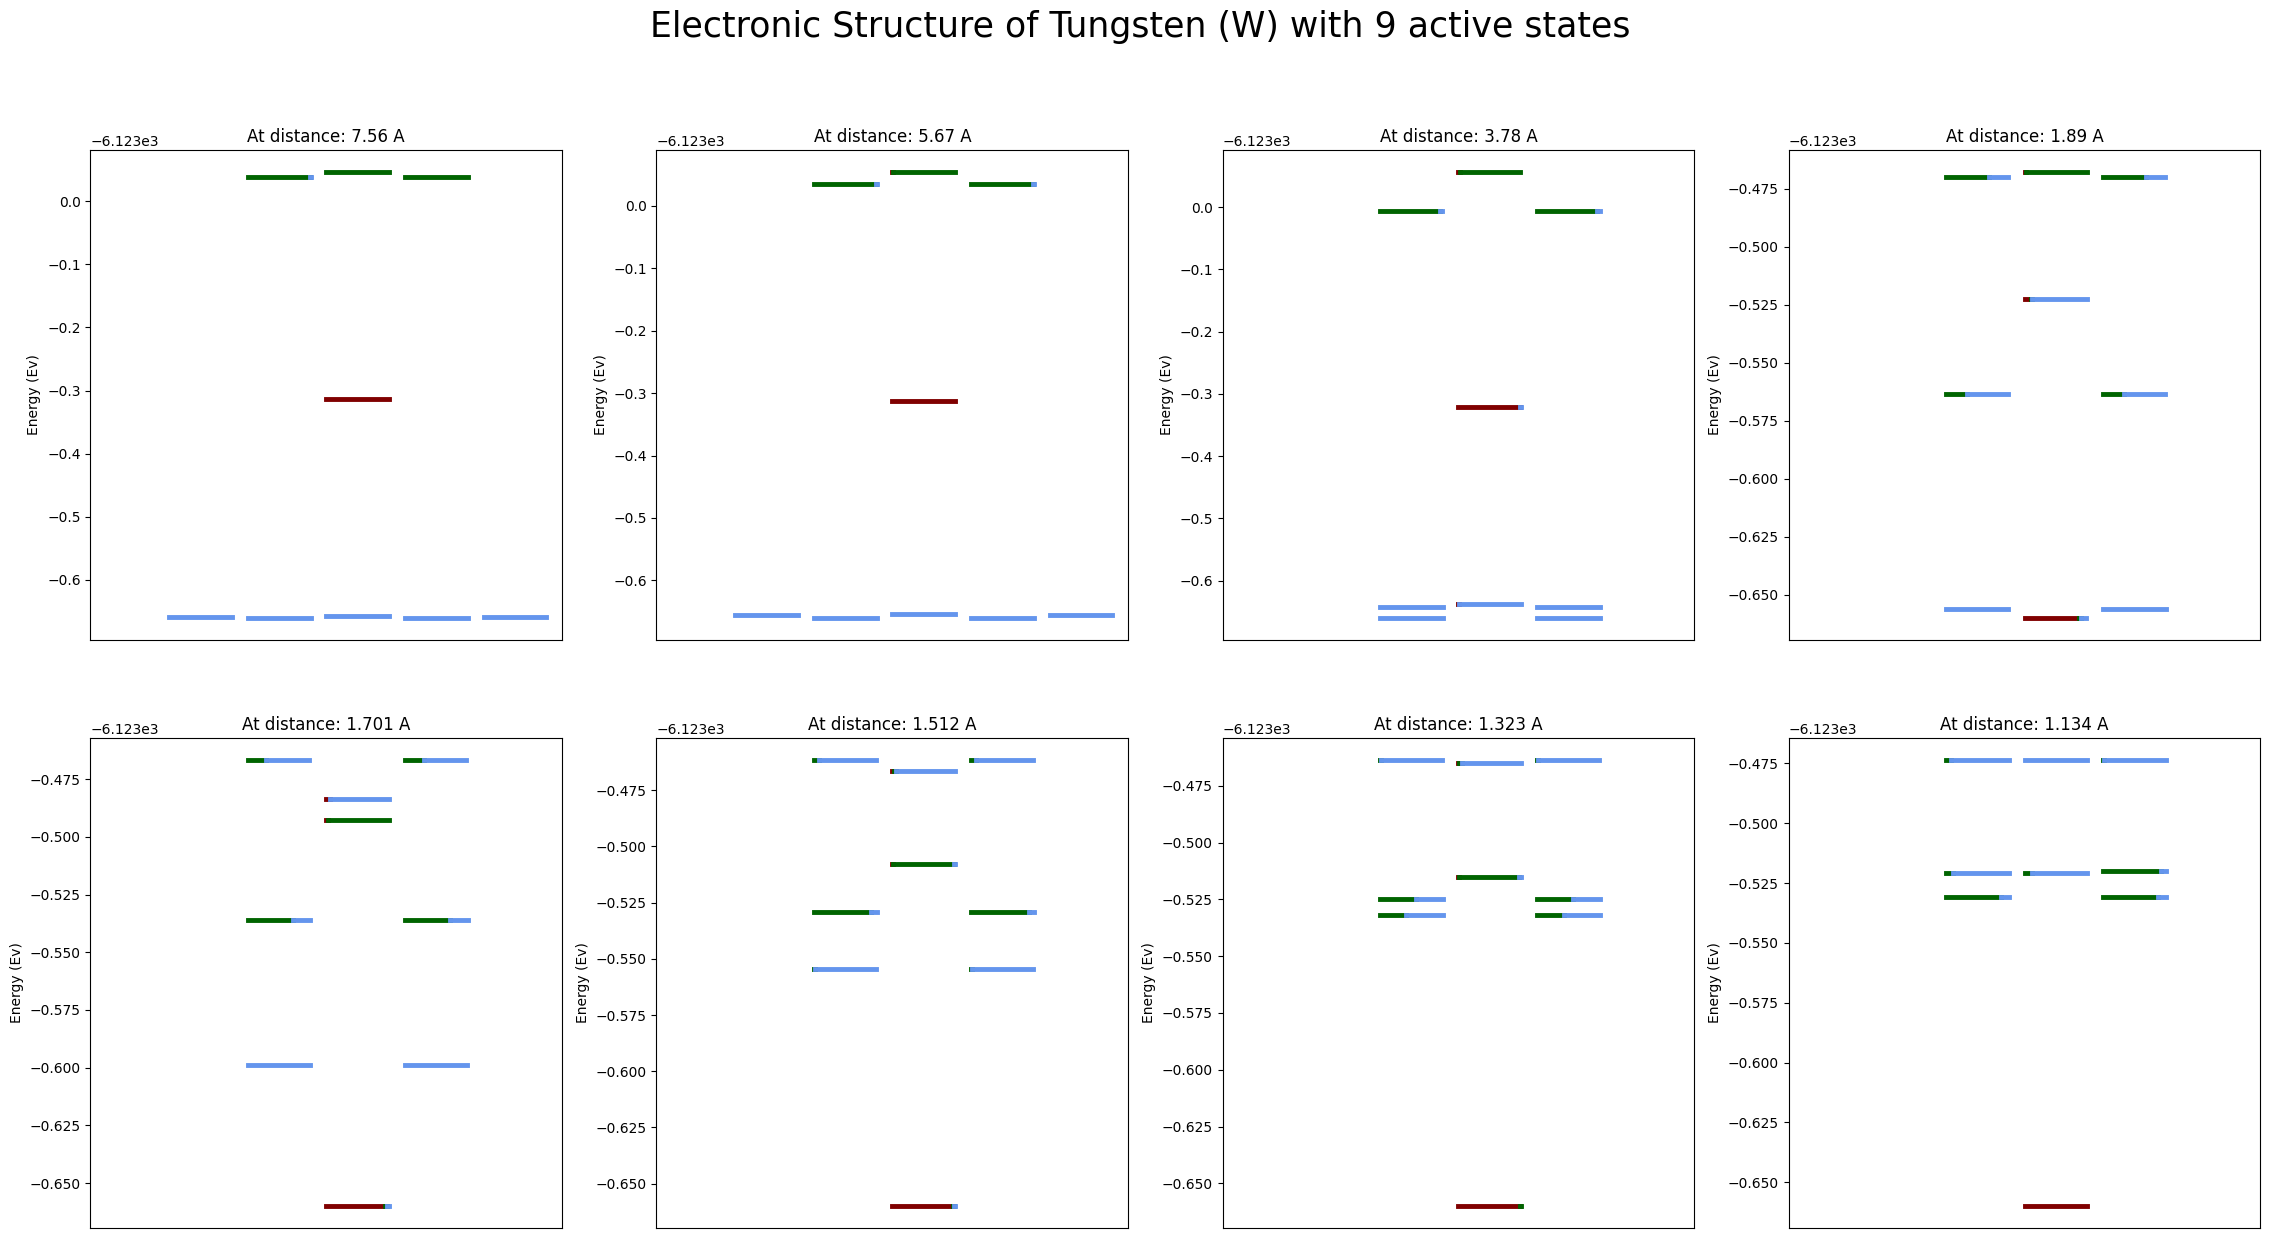

In [126]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
W_positions_new = W_positions[5:13]
W_Energies_new = W_Energies[5:13]
W_bond_lengths_list_new = W_bond_lengths_list[5:13]
W_population_total_new = W_population_total[5:13]

for pos, ener, bond_length, population in zip(W_positions_new, W_Energies_new, W_bond_lengths_list_new, W_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length} A')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Tungsten (W) with 9 active states", fontsize=25)
plt.show()

# Re

Red is the s-orbital
Green is the p-orbital
Blue is the d-orbital
Black is the f-orbital


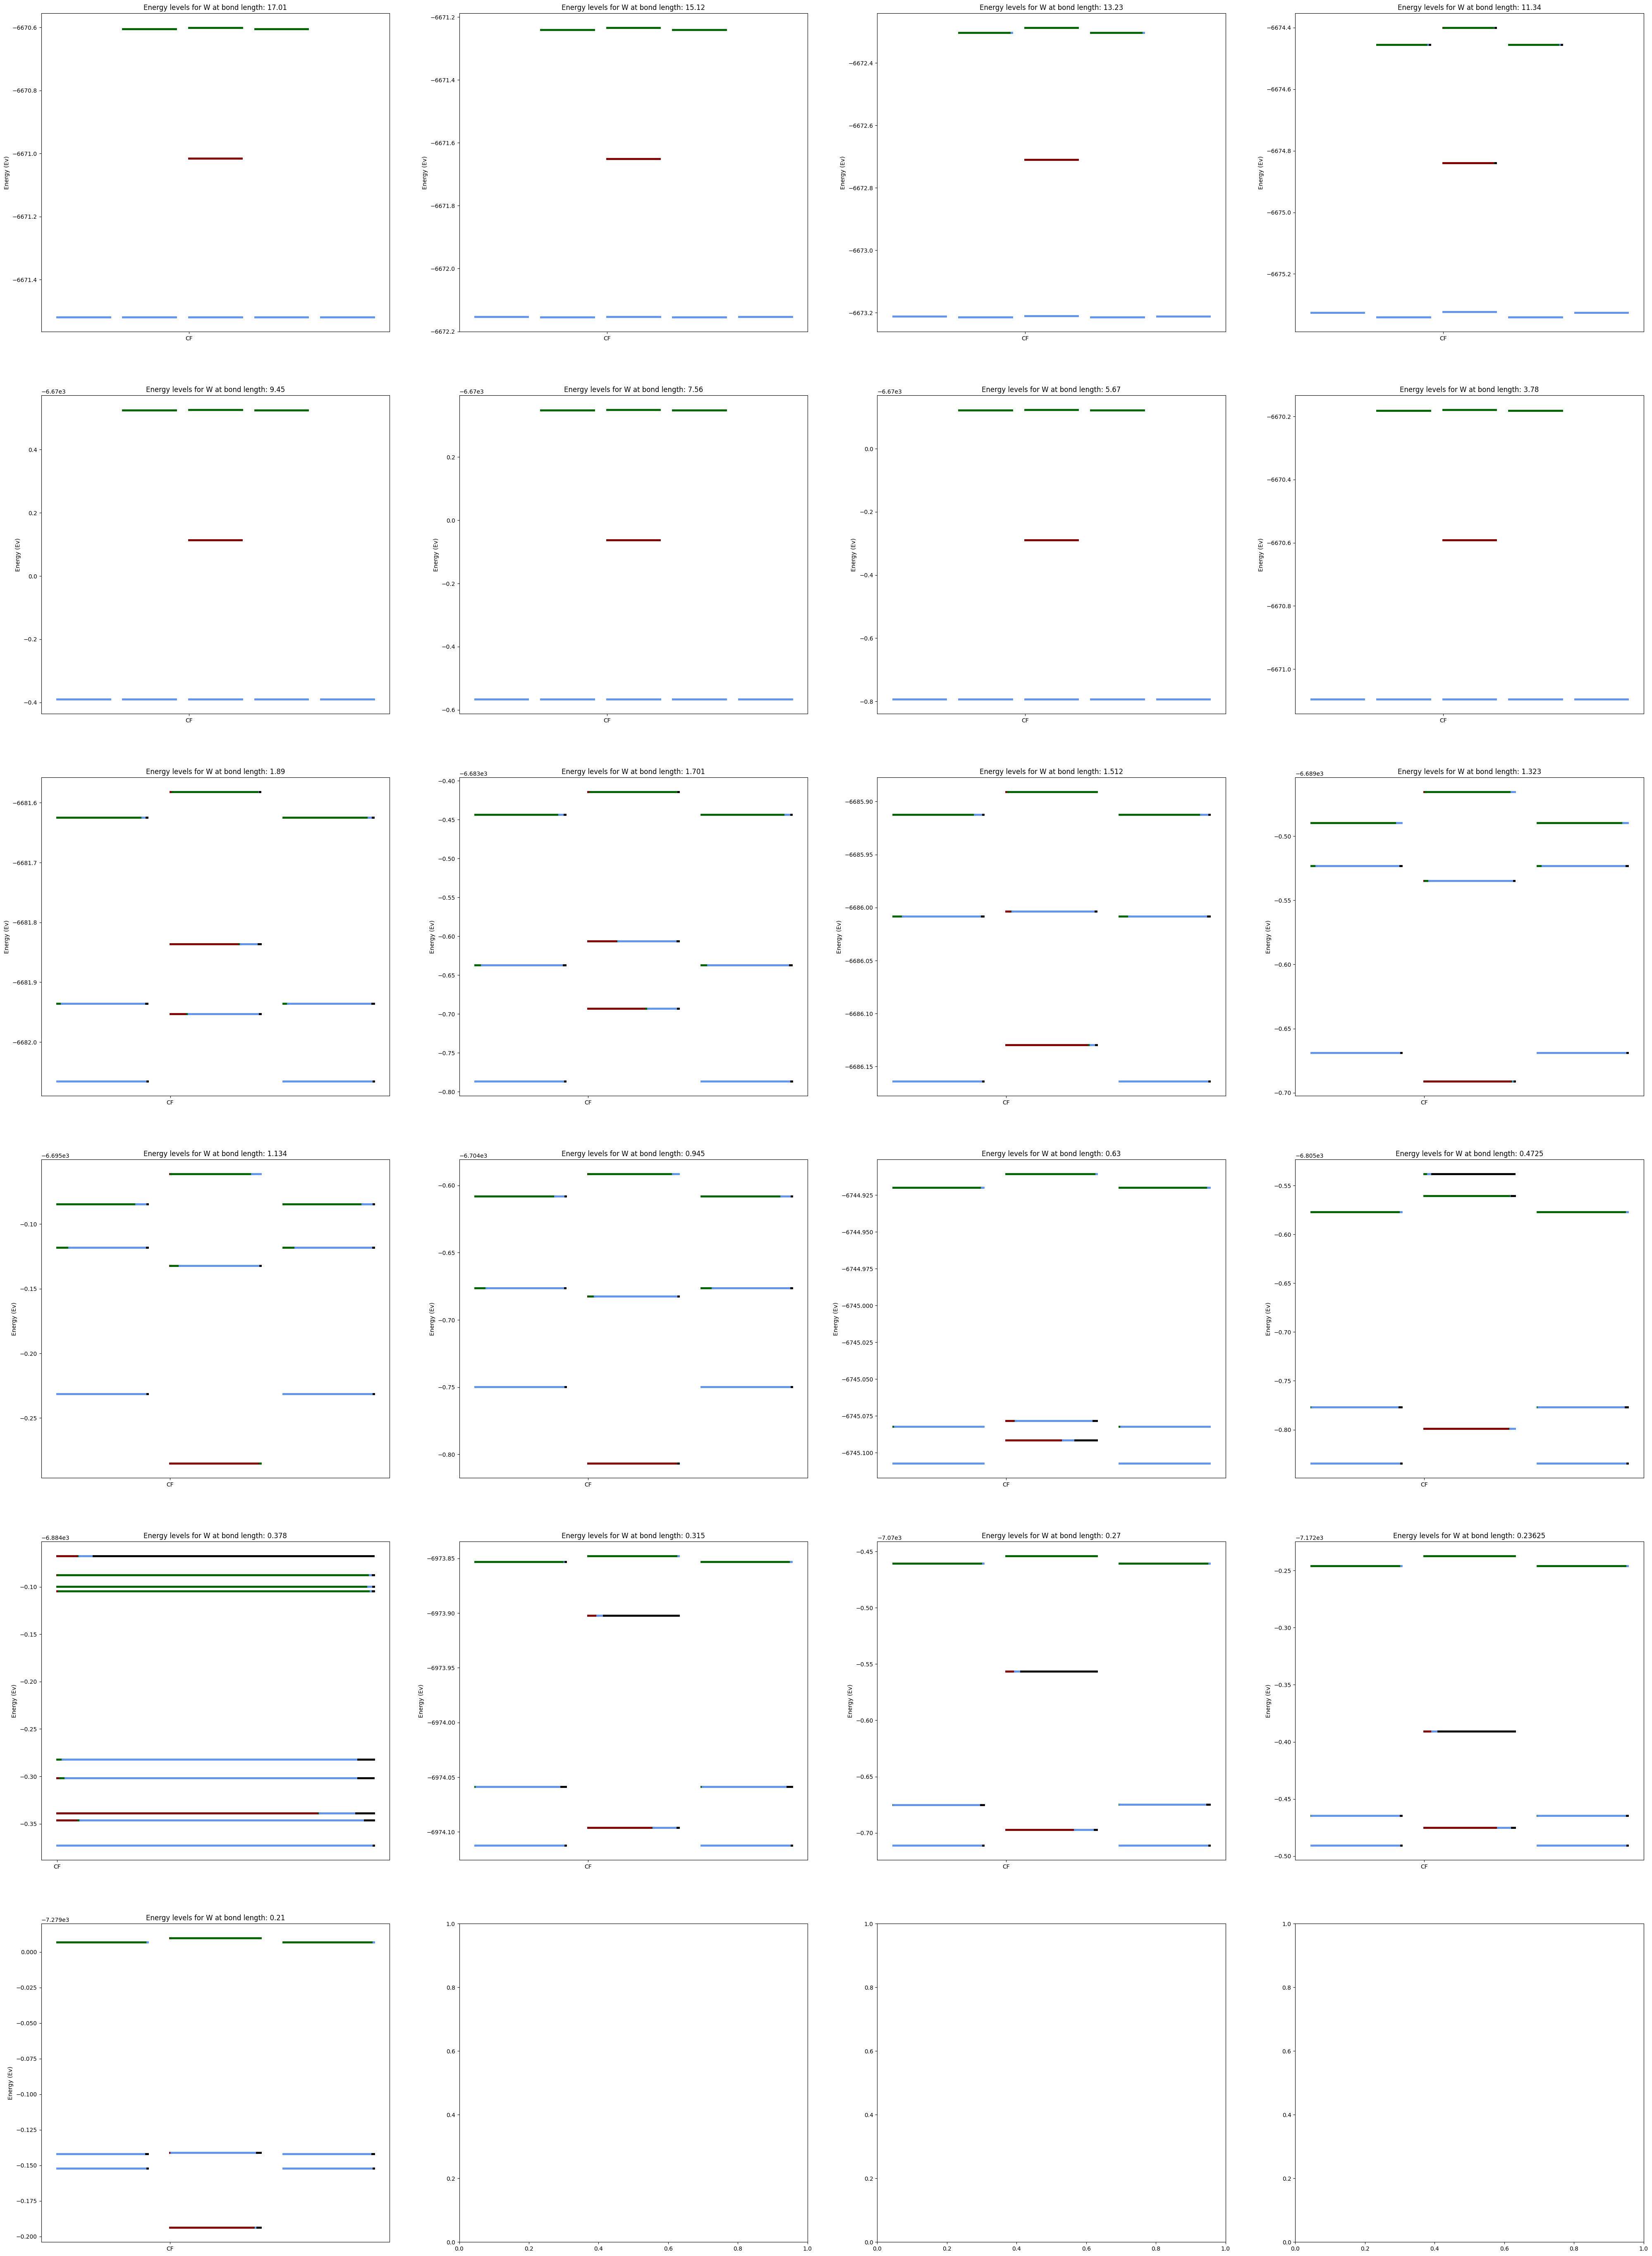

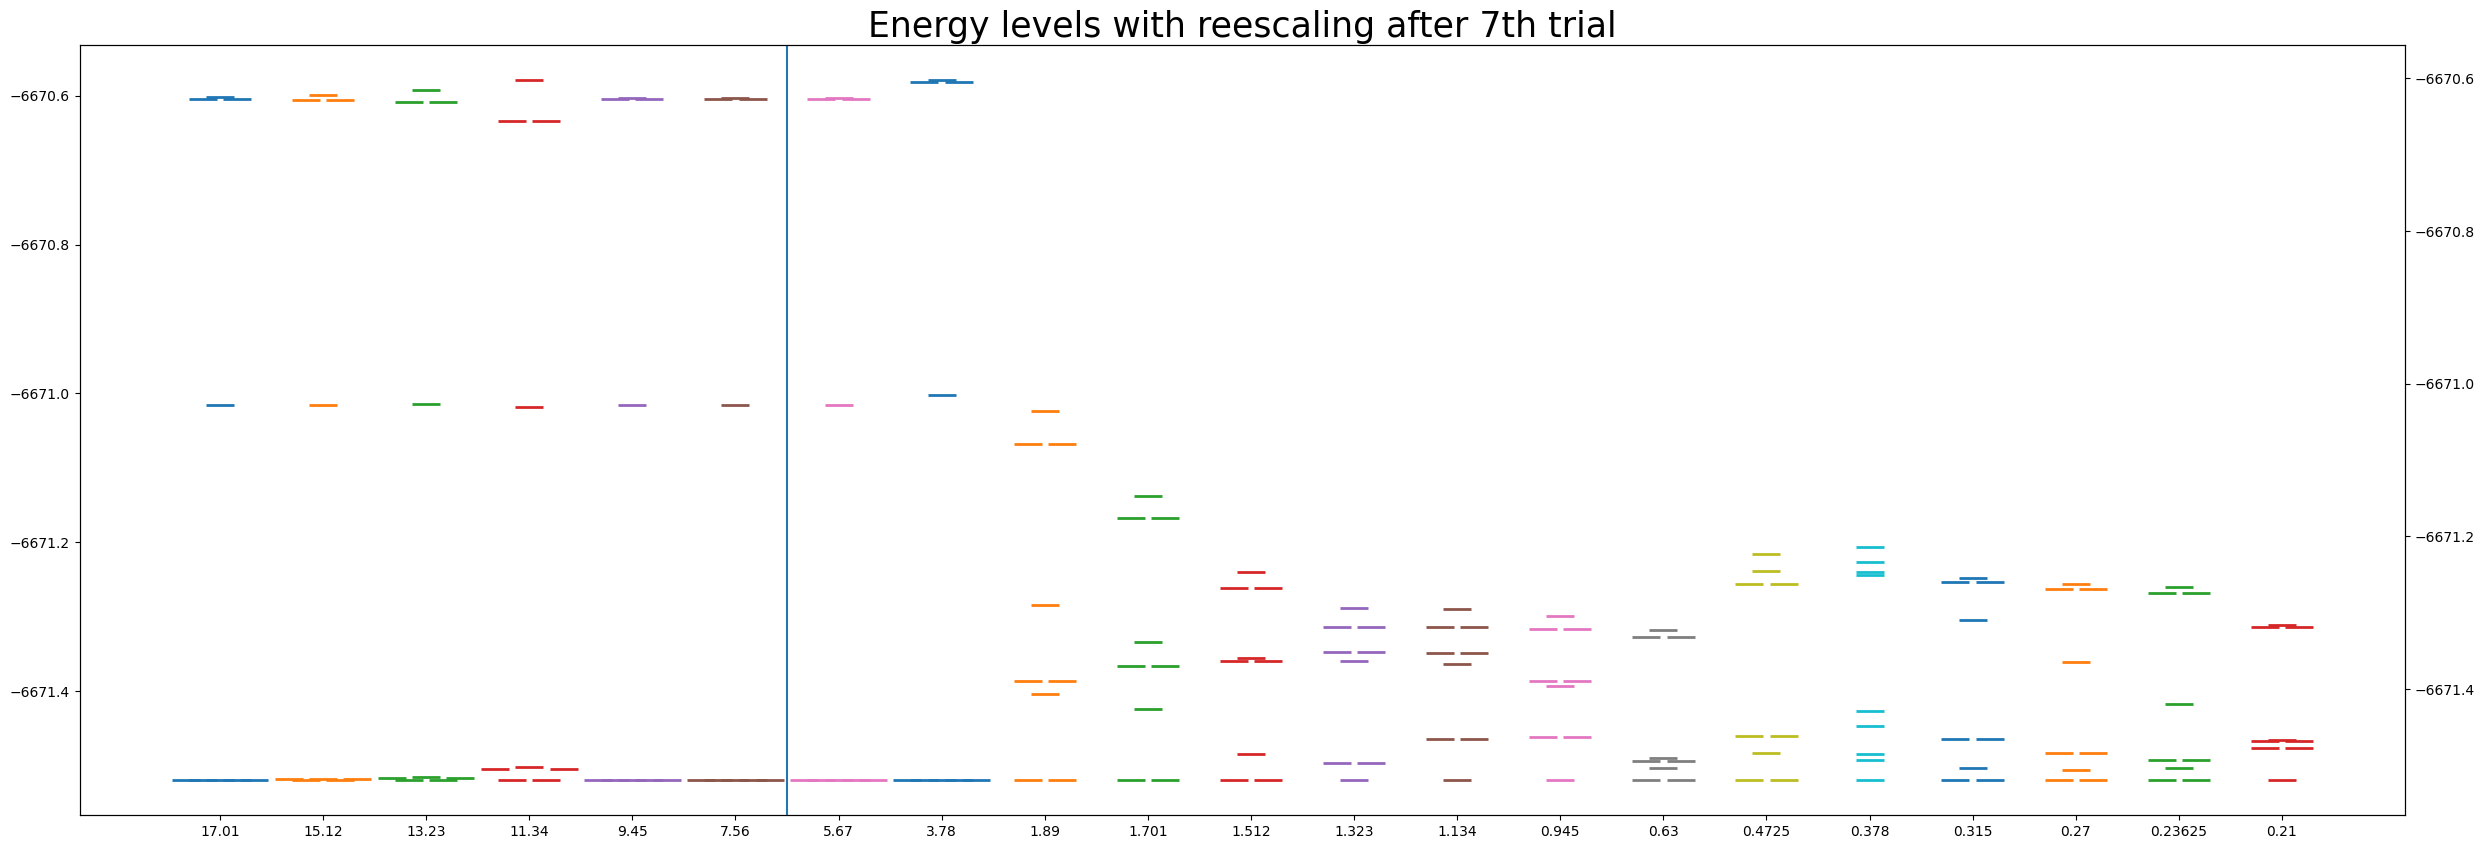

In [99]:
import matplotlib.pyplot as plt

files = ['\\rhenium_no_spin_orbit_0.21.inp.o14549895.txt',
'\\rhenium_no_spin_orbit_0.23625.inp.o14549886.txt',
'\\rhenium_no_spin_orbit_0.27.inp.o14549876.txt',
'\\rhenium_no_spin_orbit_0.315.inp.o14549866.txt',
'\\rhenium_no_spin_orbit_0.378.inp.o14548089.txt',
'\\rhenium_no_spin_orbit_0.4725.inp.o14548082.txt',
'\\rhenium_no_spin_orbit_0.63.inp.o14548075.txt',
'\\rhenium_no_spin_orbit_0.945.inp.o14548068.txt',
'\\rhenium_no_spin_orbit_1.134.inp.o14556709.txt',
'\\rhenium_no_spin_orbit_1.323.inp.o14556695.txt',
'\\rhenium_no_spin_orbit_1.512.inp.o14556685.txt',
'\\rhenium_no_spin_orbit_1.701.inp.o14556675.txt',
'\\rhenium_no_spin_orbit_1.89.inp.o14530302.txt',
'\\rhenium_no_spin_orbit_11.34.inp.o14416908.txt',
'\\rhenium_no_spin_orbit_13.23.inp.o14416896.txt',
'\\rhenium_no_spin_orbit_15.12.inp.o14397954.txt',
'\\rhenium_no_spin_orbit_17.01.inp.o14397946.txt',
'\\rhenium_no_spin_orbit_3.78.inp.o14530281.txt',
'\\rhenium_no_spin_orbit_5.67.inp.o14530253.txt',
'\\rhenium_no_spin_orbit_7.56.inp.o14530216.txt',
'\\rhenium_no_spin_orbit_9.45.inp.o14470290.txt']
files.reverse()

Re_17_01 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_rasscf, lines_after_rasscf))
Re_population_17_01 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[0], search_term_population, lines_after_population))
Re_15_12 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_rasscf, lines_after_rasscf))
Re_population_15_12 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[1], search_term_population, lines_after_population))
Re_13_23 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_rasscf, lines_after_rasscf))
Re_population_13_23 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[2], search_term_population, lines_after_population))
Re_11_34 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_rasscf, lines_after_rasscf))
Re_population_11_34 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[3], search_term_population, lines_after_population))
Re_9_45 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_rasscf, lines_after_rasscf))
Re_population_9_45 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[4], search_term_population, lines_after_population))
Re_7_56 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_rasscf, lines_after_rasscf))
Re_population_7_56 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[5], search_term_population, lines_after_population))
Re_5_67 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_rasscf, lines_after_rasscf))
Re_population_5_67 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[6], search_term_population, lines_after_population))
Re_3_78 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_rasscf, lines_after_rasscf))
Re_population_3_78 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[7], search_term_population, lines_after_population))
Re_1_89 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_rasscf, lines_after_rasscf))
Re_population_1_89 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[8], search_term_population, lines_after_population))
Re_1_701 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_rasscf, lines_after_rasscf))
Re_population_1_701 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[9], search_term_population, lines_after_population))
Re_1_512 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_rasscf, lines_after_rasscf))
Re_population_1_512 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[10], search_term_population, lines_after_population))
Re_1_323 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_rasscf, lines_after_rasscf))
Re_population_1_323 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[11], search_term_population, lines_after_population))
Re_1_134 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_rasscf, lines_after_rasscf))
Re_population_1_134 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[12], search_term_population, lines_after_population))
Re_0_945 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_rasscf, lines_after_rasscf))
Re_population_0_945 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[13], search_term_population, lines_after_population))
Re_0_63 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_rasscf, lines_after_rasscf))
Re_population_0_63 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[14], search_term_population, lines_after_population))
Re_0_4725 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_rasscf, lines_after_rasscf))
Re_population_0_4725 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[15], search_term_population, lines_after_population))
Re_0_378 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_rasscf, lines_after_rasscf))
Re_population_0_378 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[16], search_term_population, lines_after_population))
Re_0_315 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_rasscf, lines_after_rasscf))
Re_population_0_315 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[17], search_term_population, lines_after_population))
Re_0_27 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_rasscf, lines_after_rasscf))
Re_population_0_27 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[18], search_term_population, lines_after_population))
Re_0_23625 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_rasscf, lines_after_rasscf))
Re_population_0_23625 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[19], search_term_population, lines_after_population))
Re_0_21 = rasscf_energies(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_rasscf, lines_after_rasscf))
Re_population_0_21 = population_summation(search_in_file(r'c:\Users\Mikel\Documents\00 - Universidades\2 - RUG_Physics\2024 - 2025\Research Internship\Initial simulations and tryouts\1 electron\non_rel_basis_9_active\data_from_sims' + files[20], search_term_population, lines_after_population))

Re_Energies = [Re_17_01, Re_15_12, Re_13_23, Re_11_34, Re_9_45, Re_7_56, Re_5_67, Re_3_78, Re_1_89,
            Re_1_701, Re_1_512, Re_1_323, Re_1_134, Re_0_945, Re_0_63, Re_0_4725, Re_0_378, Re_0_315, Re_0_27, Re_0_23625, Re_0_21]
Re_population_total = [Re_population_17_01, Re_population_15_12, Re_population_13_23, Re_population_11_34, Re_population_9_45, Re_population_7_56,
                    Re_population_5_67, Re_population_3_78, Re_population_1_89, Re_population_1_701, Re_population_1_512, Re_population_1_323,
                    Re_population_1_134, Re_population_0_945, Re_population_0_63, Re_population_0_4725, Re_population_0_378, Re_population_0_315,
                    Re_population_0_27, Re_population_0_23625, Re_population_0_21]

Re_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_9 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_10 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_11 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_12 = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
Re_13 = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
Re_14  = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
Re_15 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_16 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
Re_17 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Re_18 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_19 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_20 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_21 = [0.5, 0, 1, 0, 1, 0.5, 0, 1, 0.5]

Re_positions = [Re_1, Re_2, Re_3, Re_4, Re_5, Re_6, Re_7, Re_8, Re_9, Re_10, Re_11, Re_12, Re_13, Re_14, Re_15, Re_16, Re_17, Re_18, Re_19, Re_20, Re_21]

Re_bond_lengths_list = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.27, 0.23625, 0.21]

print("Red is the s-orbital")
print("Green is the p-orbital")
print("Blue is the d-orbital")
print("Black is the f-orbital")


# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue', 'black']

fig, ax = plt.subplots(6,4, figsize=(50,70), facecolor ='white')
i=0
j=0
for pos, ener, bond_length, population in zip(Re_positions, Re_Energies, Re_bond_lengths_list, Re_population_total):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'Energy levels for W at bond length: {bond_length}')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xticks([0.5], ['CF'])
    j = j +1
    if j == 4:
        j = 0
        i = i +1

plt.show()

normaliser_ground_value = Re_17_01[0]
fig, ax= plt.subplots(figsize=(30,10))
i=0
t=0
#This is used for a dual y-axis, after the 7th measurement the axis are relabeled
ax2 = ax.twinx()
for pos, ener in zip(Re_positions, Re_Energies):
    if t >= 7:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax2.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    else:
        diff = ener[0] - normaliser_ground_value
        for j in range(len(pos)):
            pos[j] = pos[j] + i
            ener[j] = ener[j] - diff
        ax.scatter(pos, ener, s=400, marker="_", linewidth=2, zorder=3)
    i=i+3
    t=t+1
plt.title("Energy levels with reescaling after 7th trial", fontsize=25)
Re_positions_xticks = [0.5,3.5,6.5,9.5,12.5,15.5,18.5,21.5,24.5,27.5,30.5,33.5,36.5,39.5,42.5,45.5,48.5,51.5,54.5,57.5,60.5]
plt.xticks(Re_positions_xticks, Re_bond_lengths_list)
plt.axvline(17)
plt.show()

Re_1 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_2 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_3 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_4 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_5 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_6 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_7 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_8 = [0, 1, -0.5, 1.5, 0.5, 0.5, 0, 1, 0.5]
Re_9 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_10 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_11 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_12 = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
Re_13 = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
Re_14  = [0.5, 0, 1, 0.5, 0, 1, 0, 1, 0.5]
Re_15 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_16 = [0, 1, 0.5, 0, 1, 0, 1, 0.5, 0.5]
Re_17 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Re_18 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_19 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_20 = [0, 1, 0.5, 0, 1, 0.5, 0, 1, 0.5]
Re_21 = [0.5, 0, 1, 0, 1, 0.5, 0, 1, 0.5]

Re_positions = [Re_1, Re_2, Re_3, Re_4, Re_5, Re_6, Re_7, Re_8, Re_9, Re_10, Re_11, Re_12, Re_13, Re_14, Re_15, Re_16, Re_17, Re_18, Re_19, Re_20, Re_21]

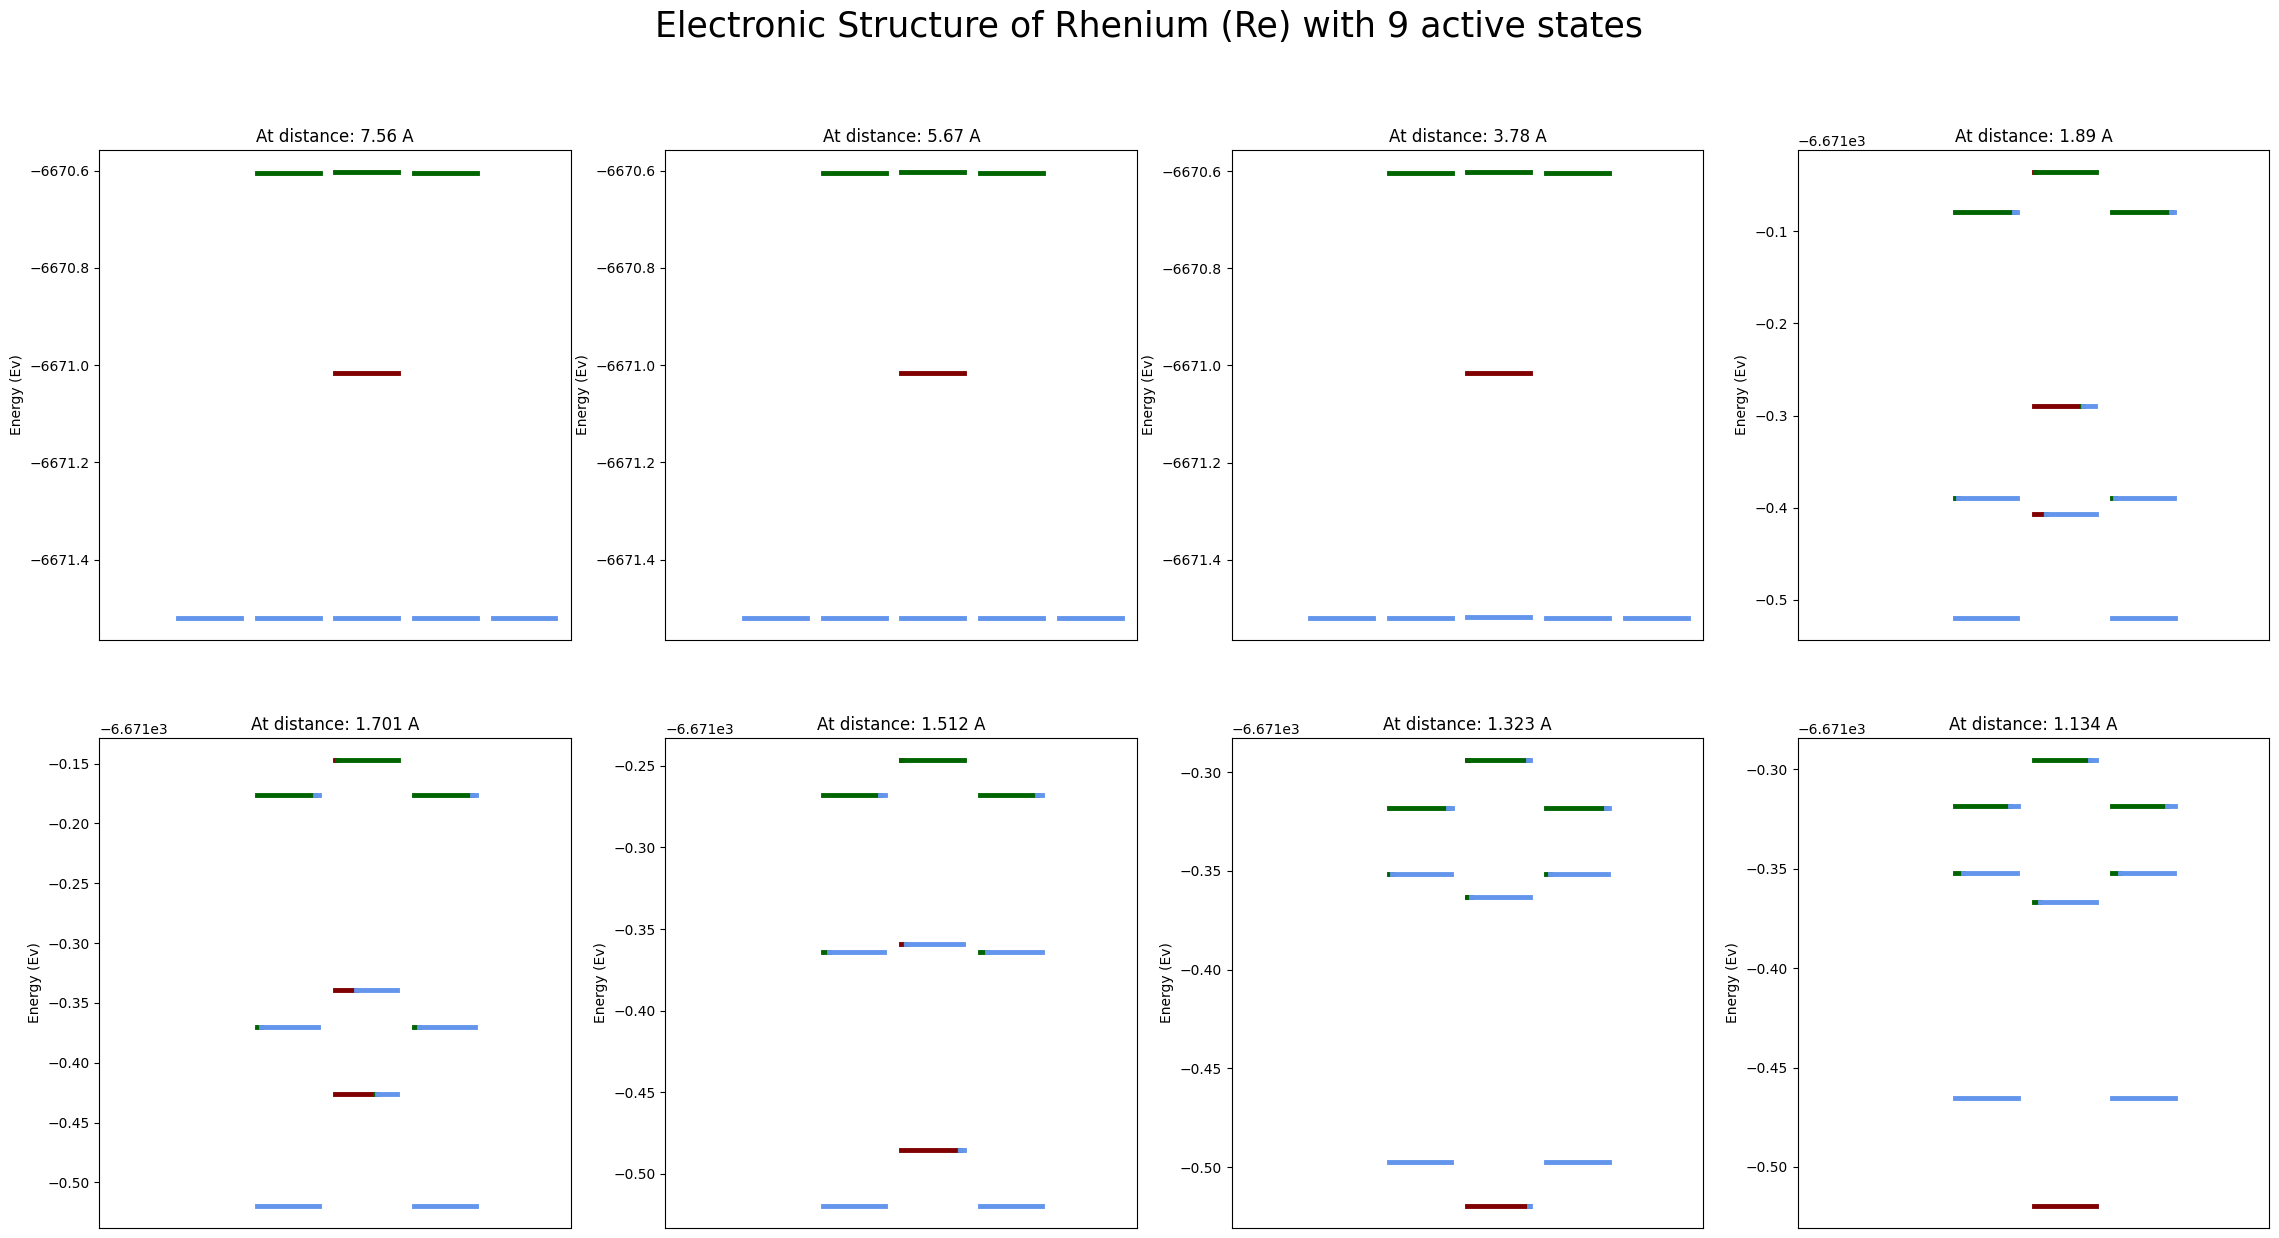

In [125]:
fig, ax = plt.subplots(2,4, figsize=(28,14), facecolor ='white')
i=0
j=0
Re_positions_new = Re_positions[5:13]
Re_Energies_new = Re_Energies[5:13]
Re_bond_lengths_list_new = Re_bond_lengths_list[5:13]
Re_population_total_new = Re_population_total[5:13]

for pos, ener, bond_length, population in zip(Re_positions_new, Re_Energies_new, Re_bond_lengths_list_new, Re_population_total_new):

    for pos, ener, population in zip(pos, ener, population):

        points = [0]
        for ratio in population:
            points.append(points[-1] + 0.4 * ratio)

        x_values = []
        y_values = []
        # Plot each segment with its respective color
        for t in range(len(colors)):
            x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
            y_values = np.full_like(x_values, ener)  # Specific value for y
            ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

        ax[i, j].set_title(f'At distance: {bond_length} A')
        ax[i, j].set_ylabel("Energy (Ev)")
        ax[i, j].set_xlim(-1.0, 2.0)
        ax[i, j].tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    j = j +1
    if j == 4:
        j = 0
        i = i +1
fig.suptitle("Electronic Structure of Rhenium (Re) with 9 active states", fontsize=25)
plt.show()

# By distances

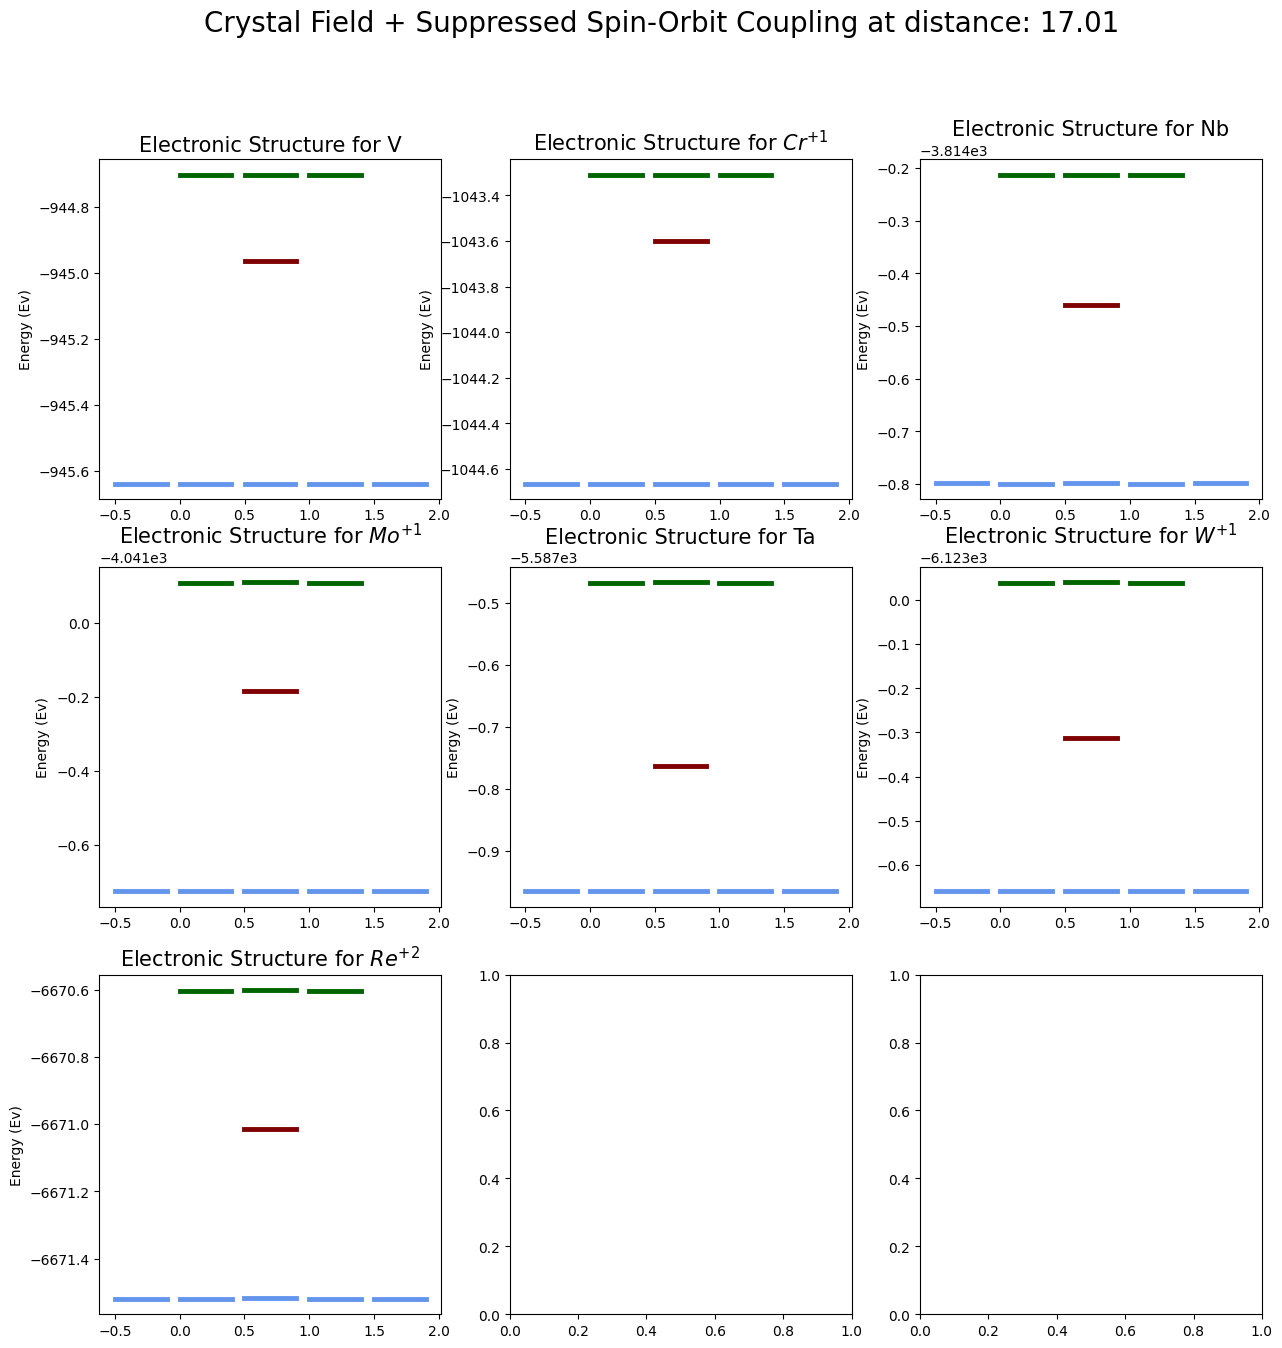

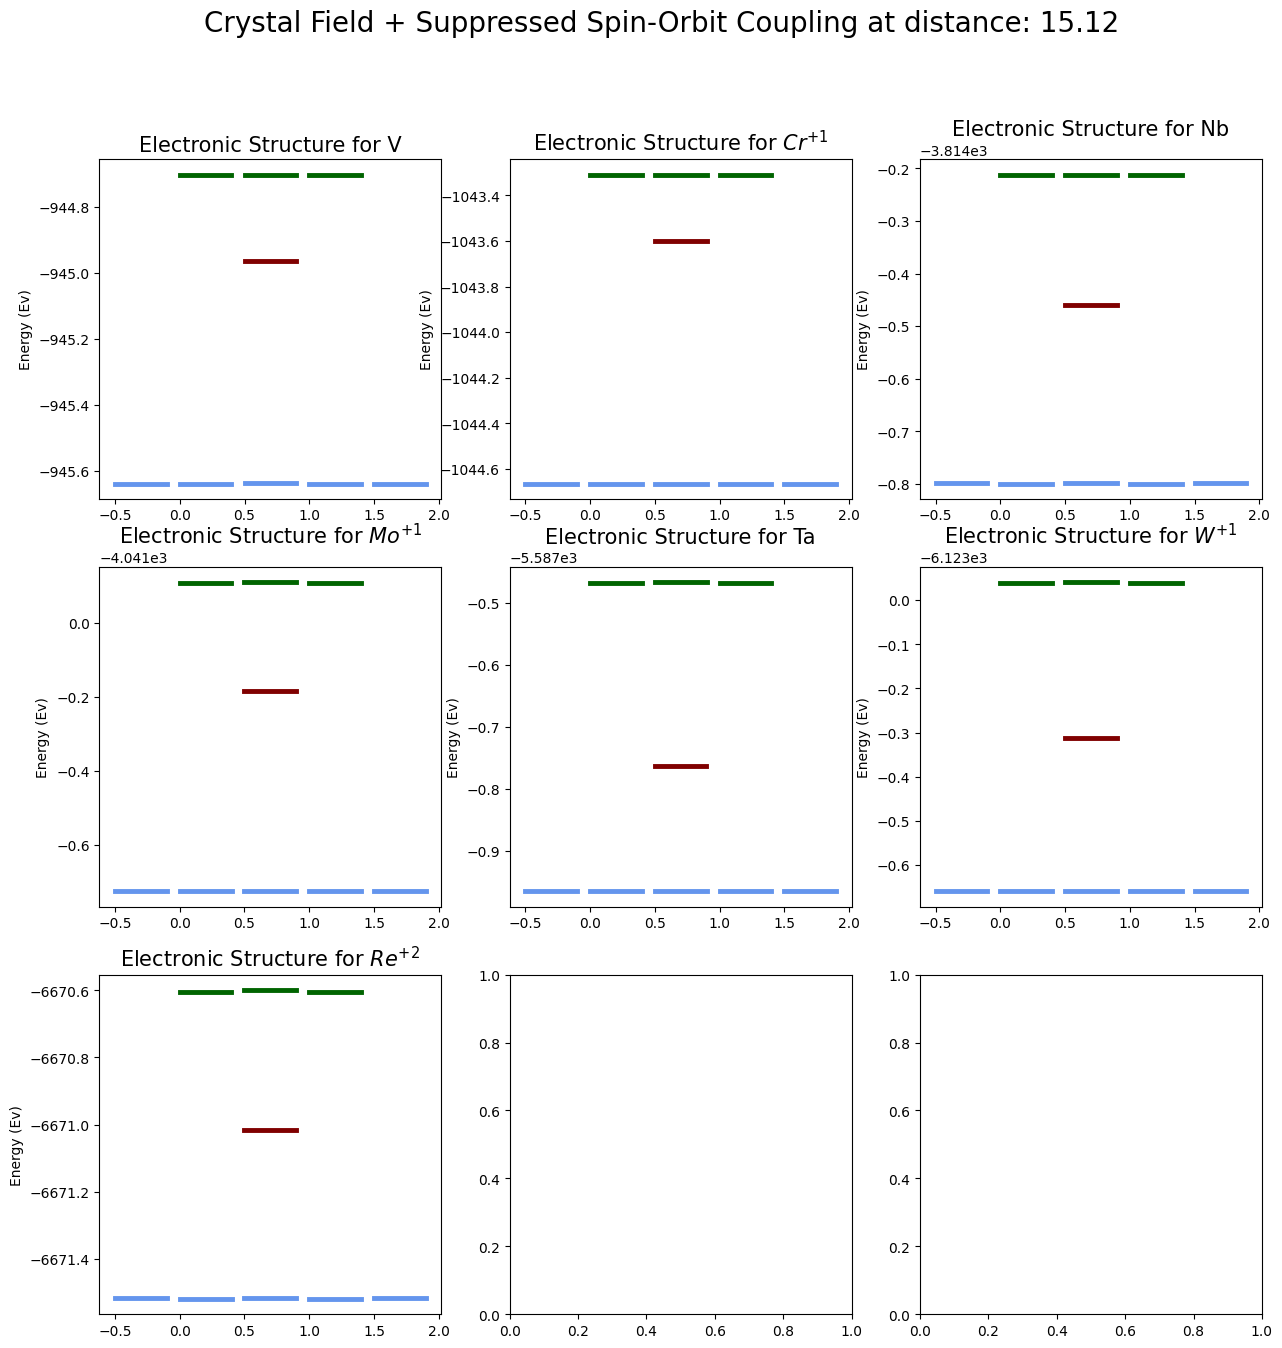

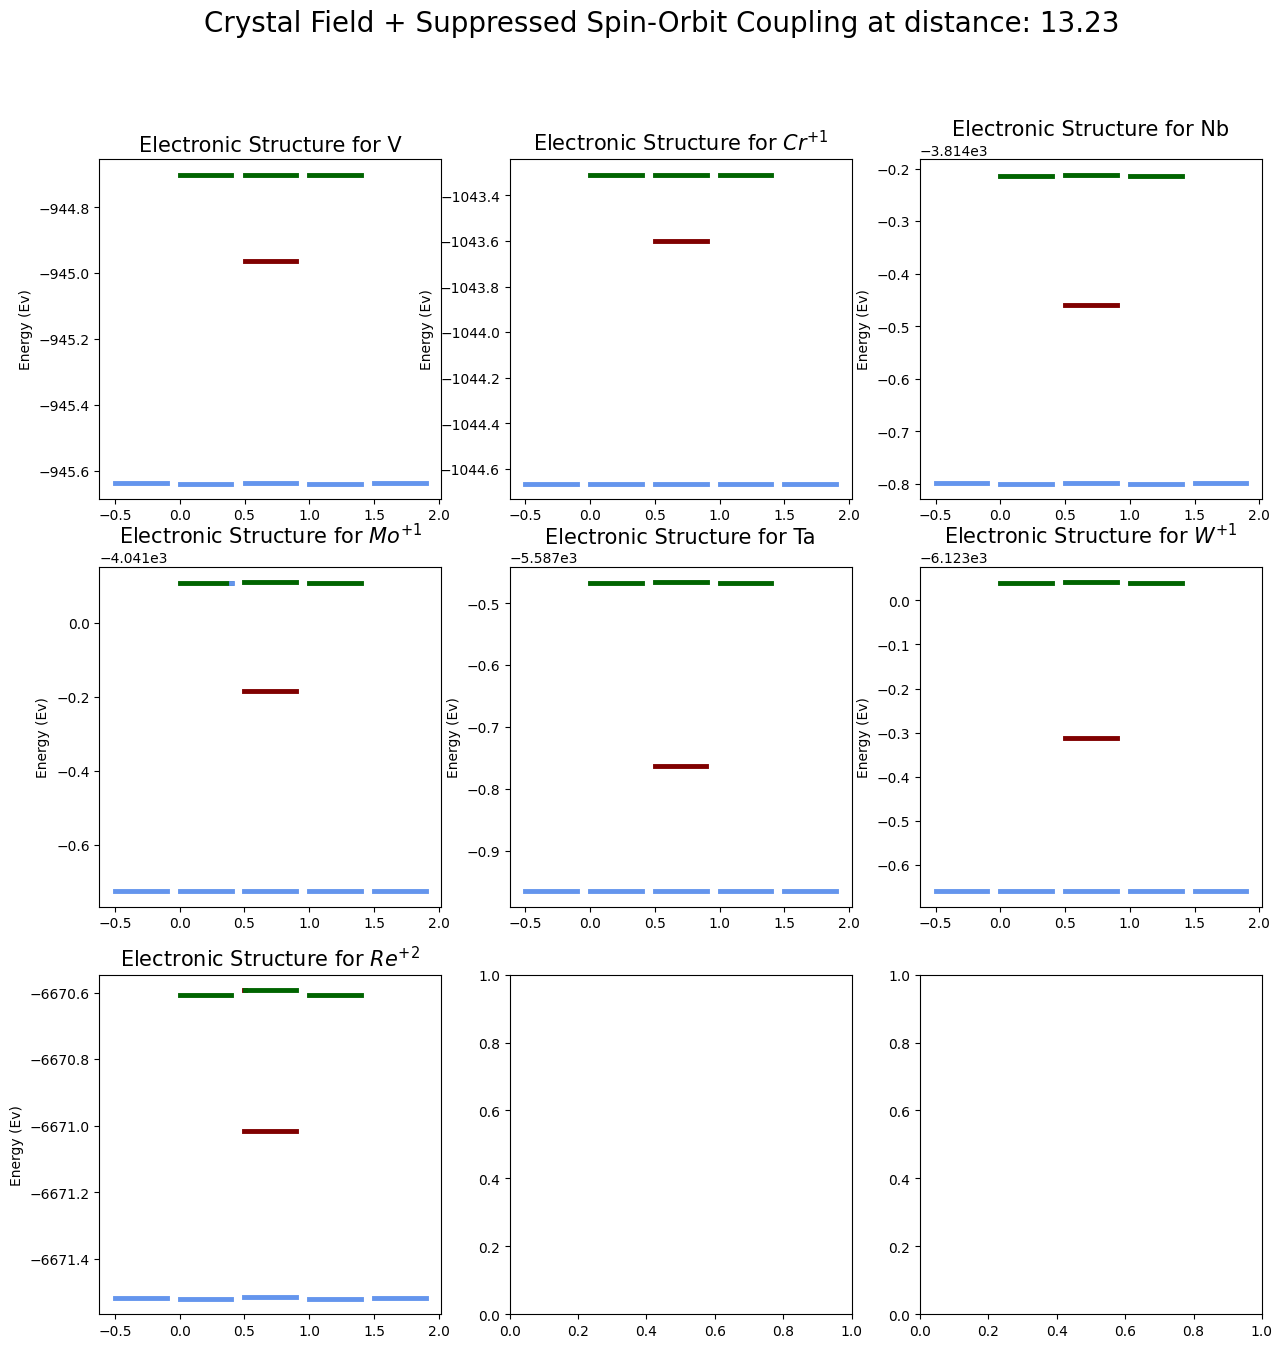

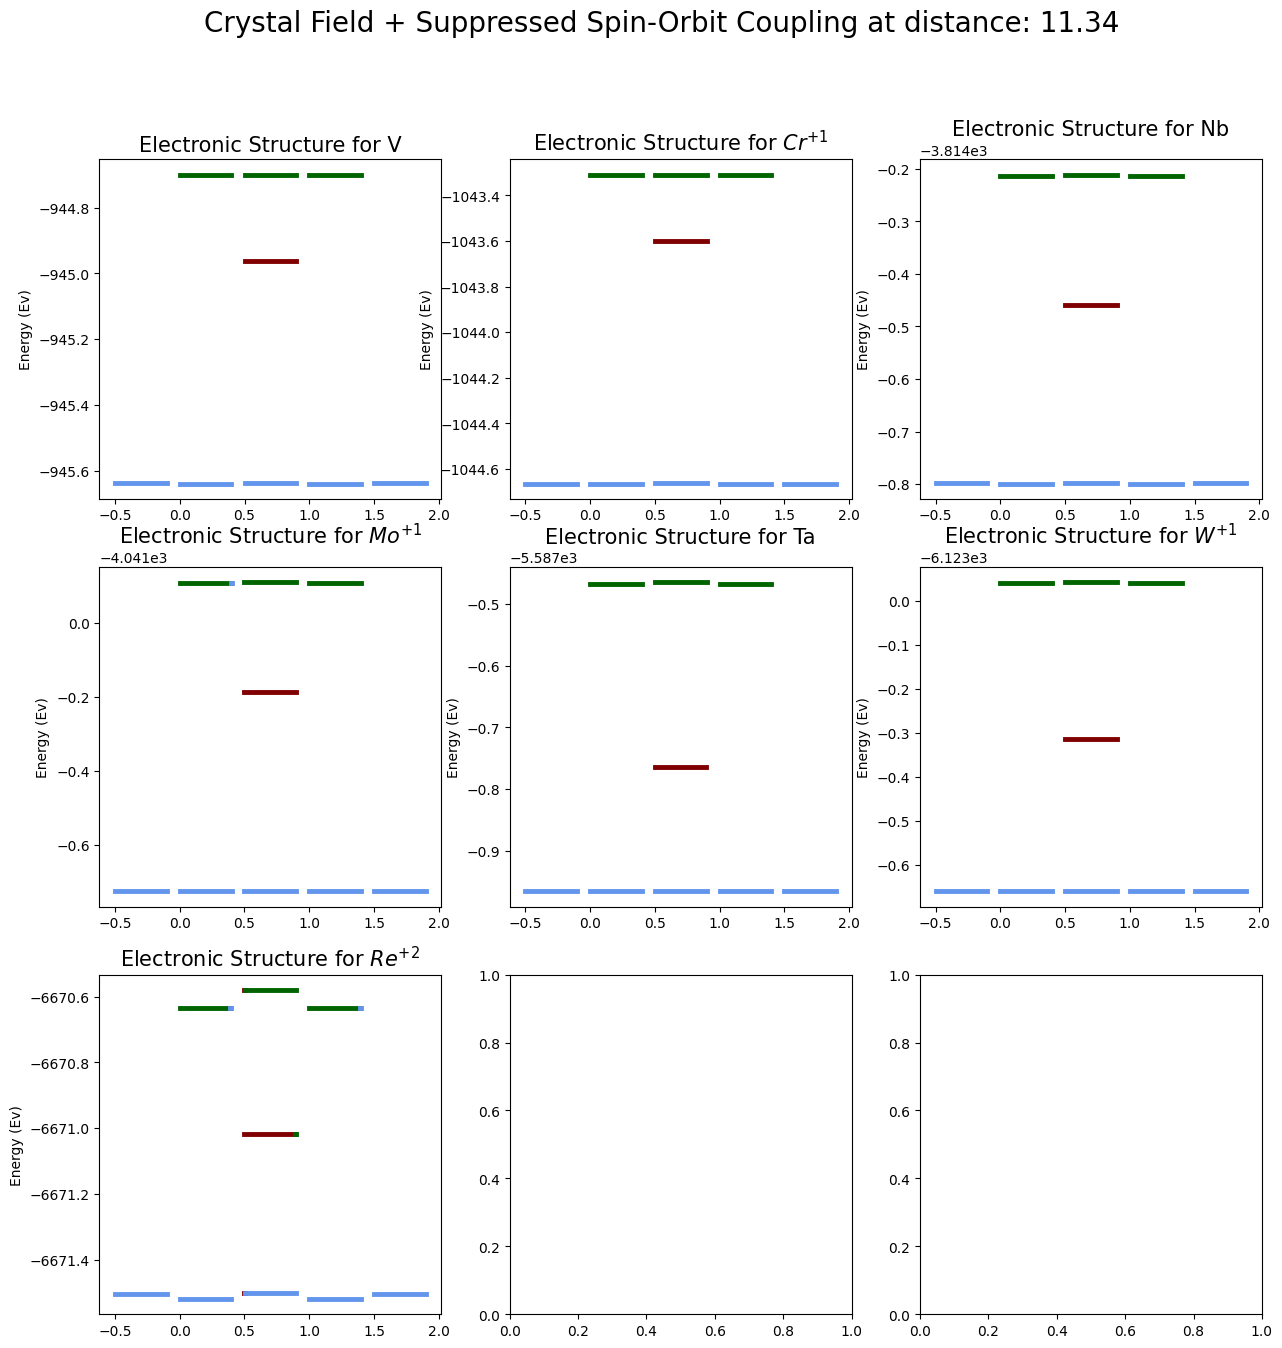

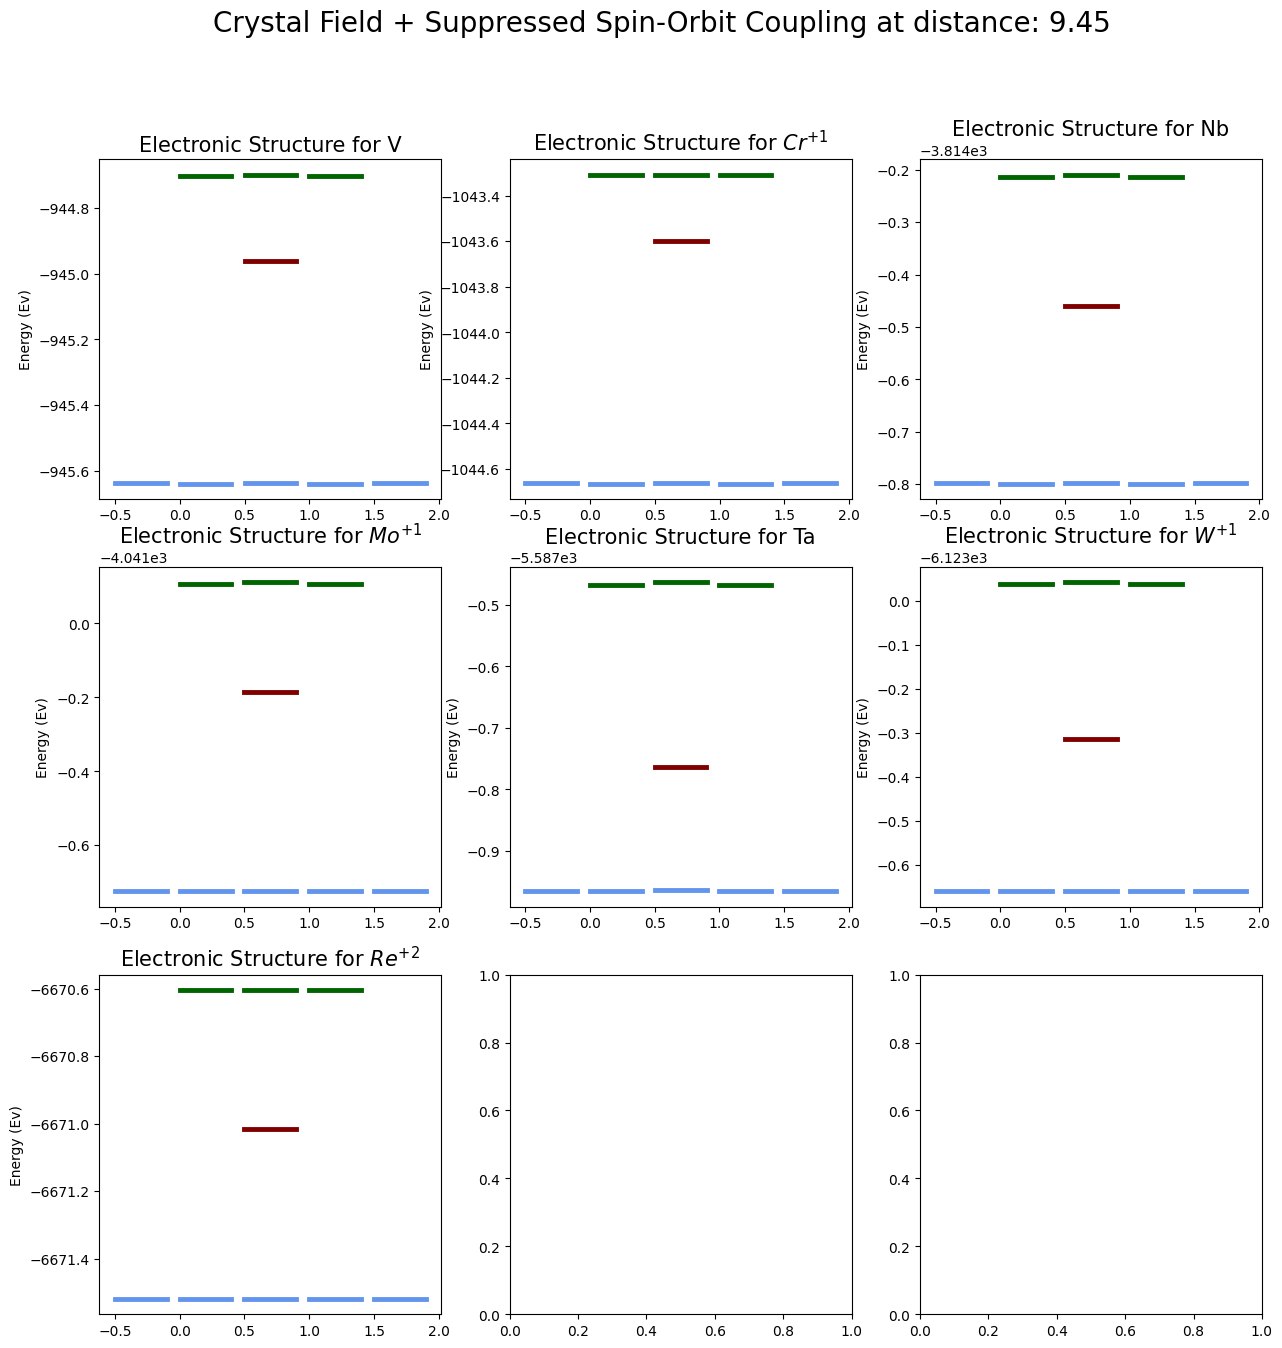

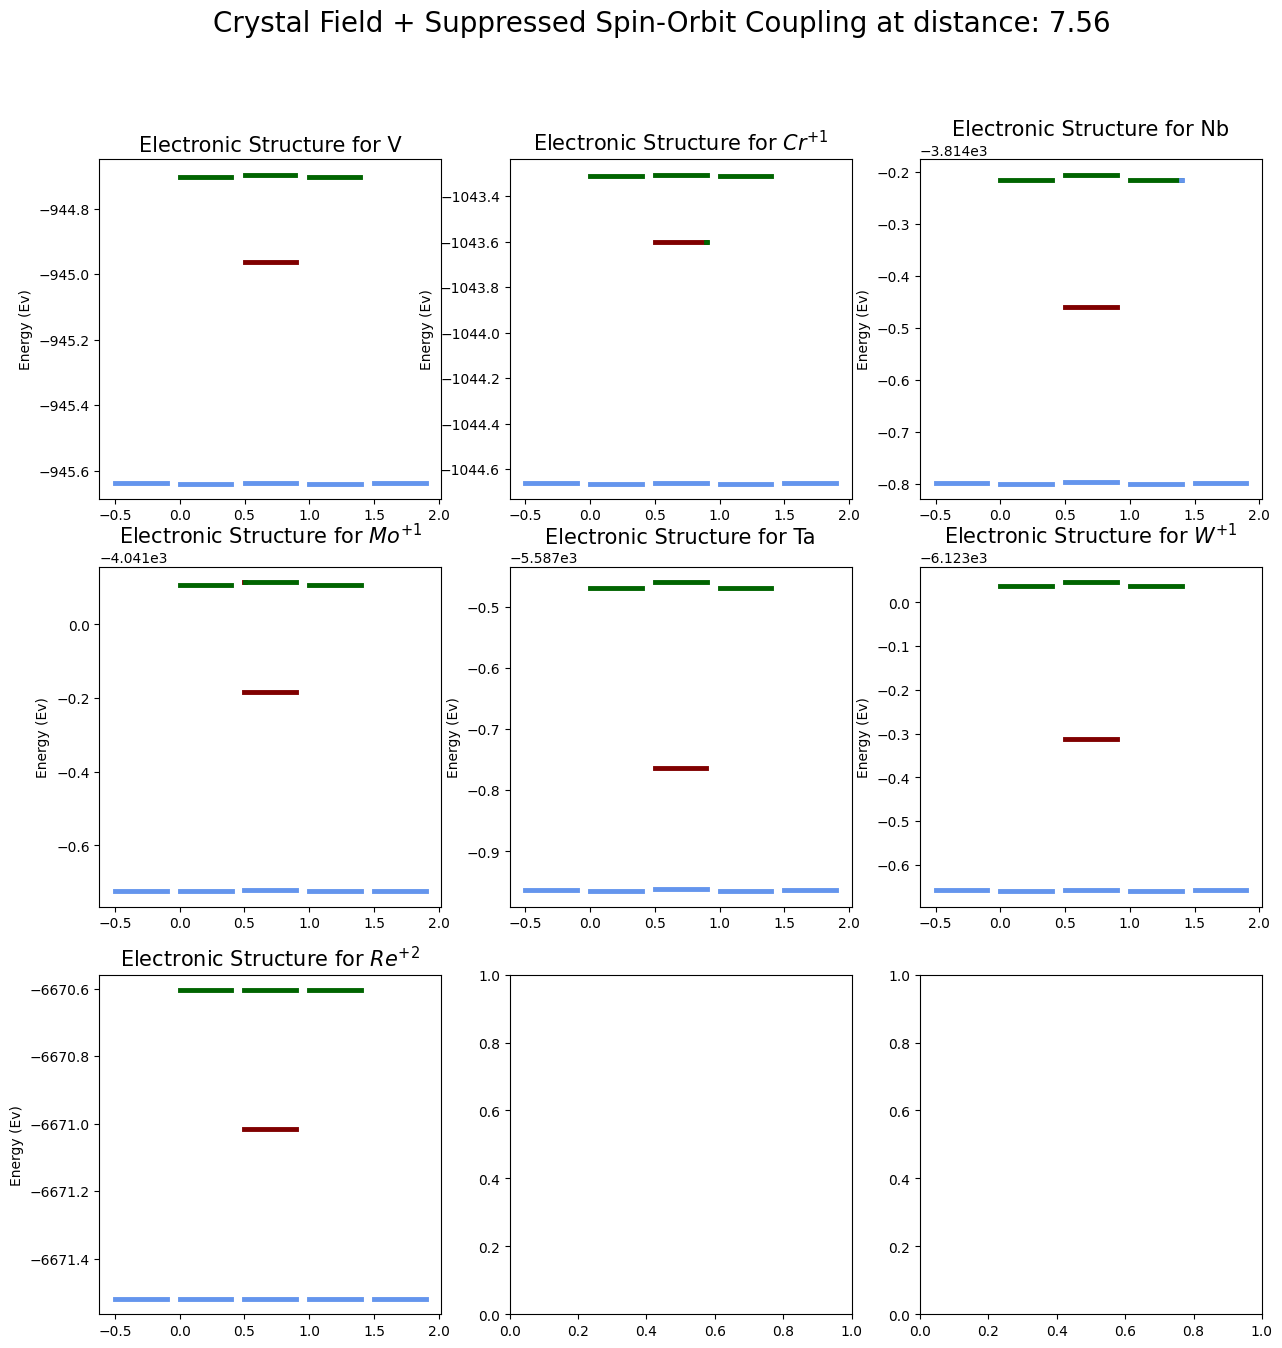

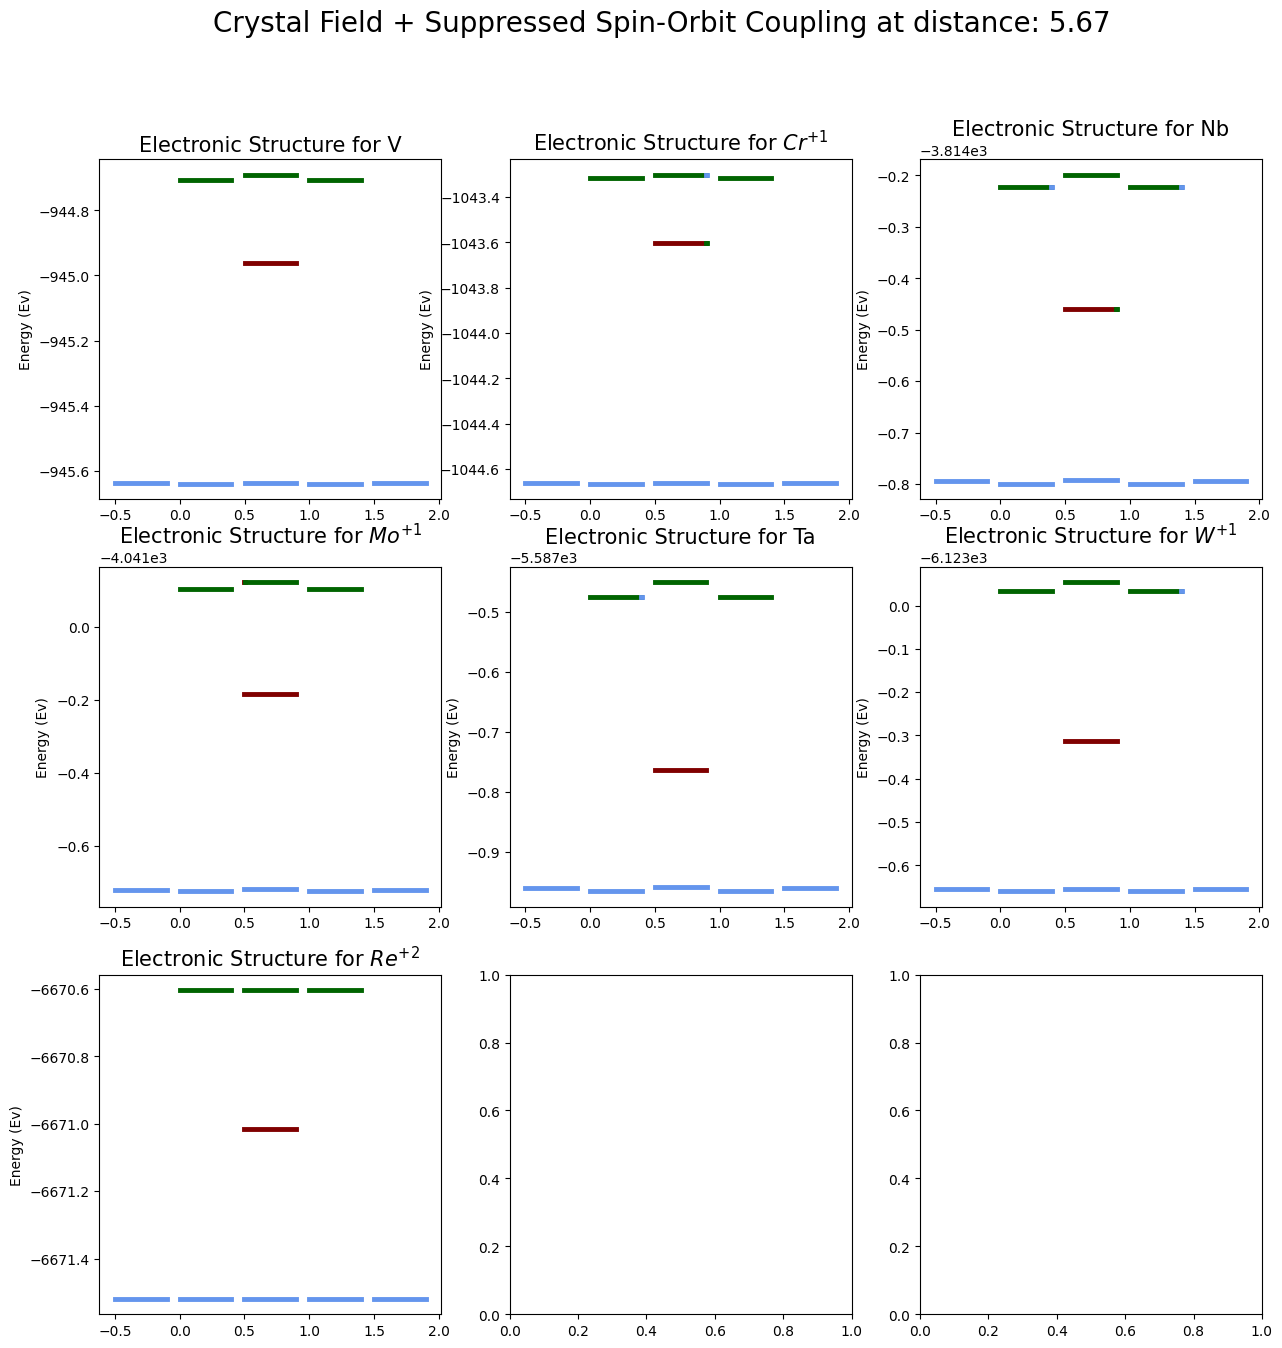

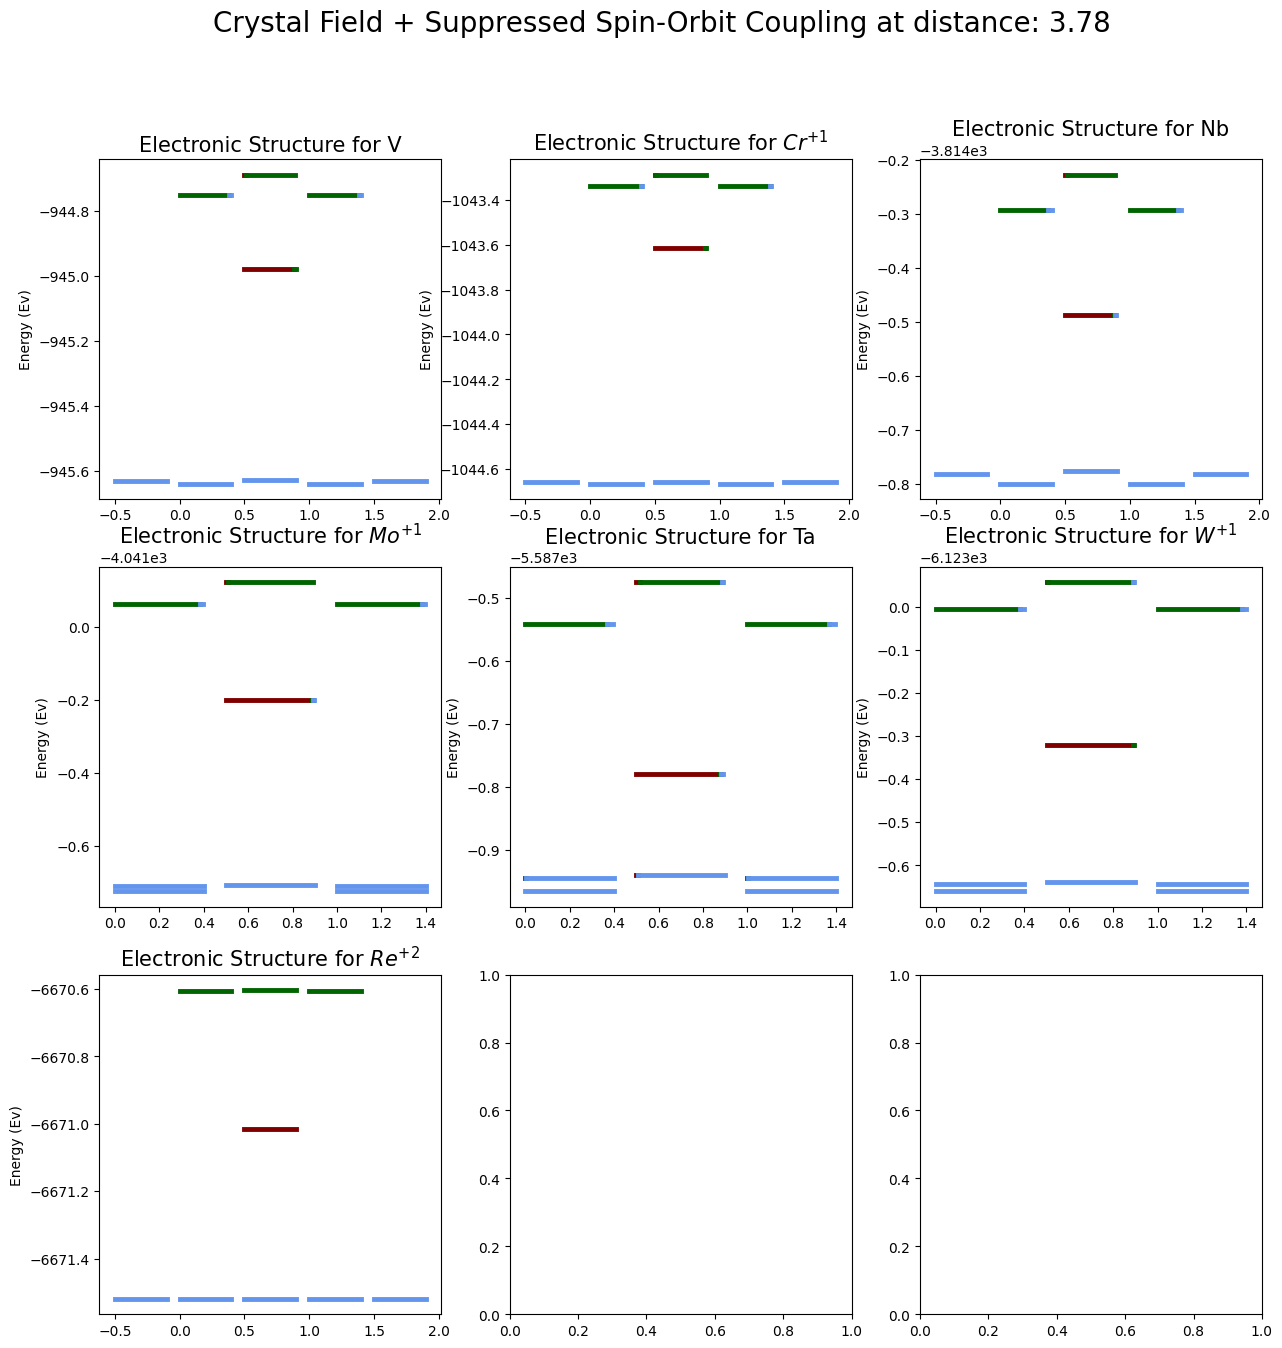

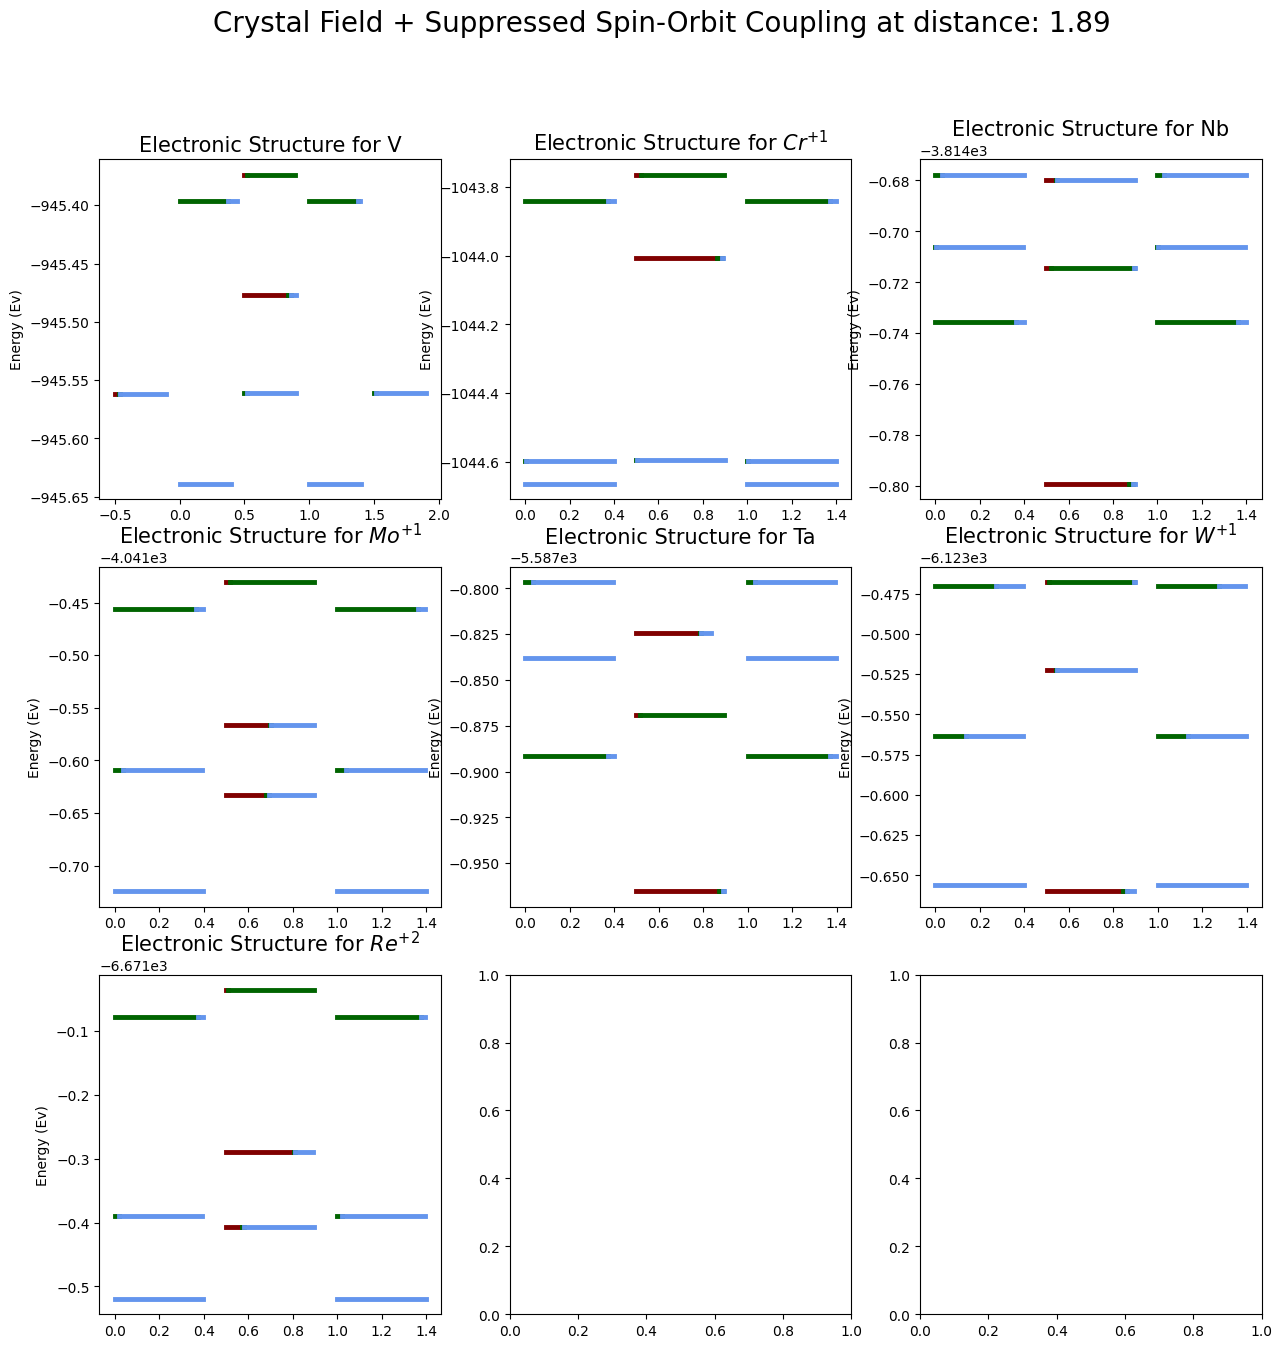

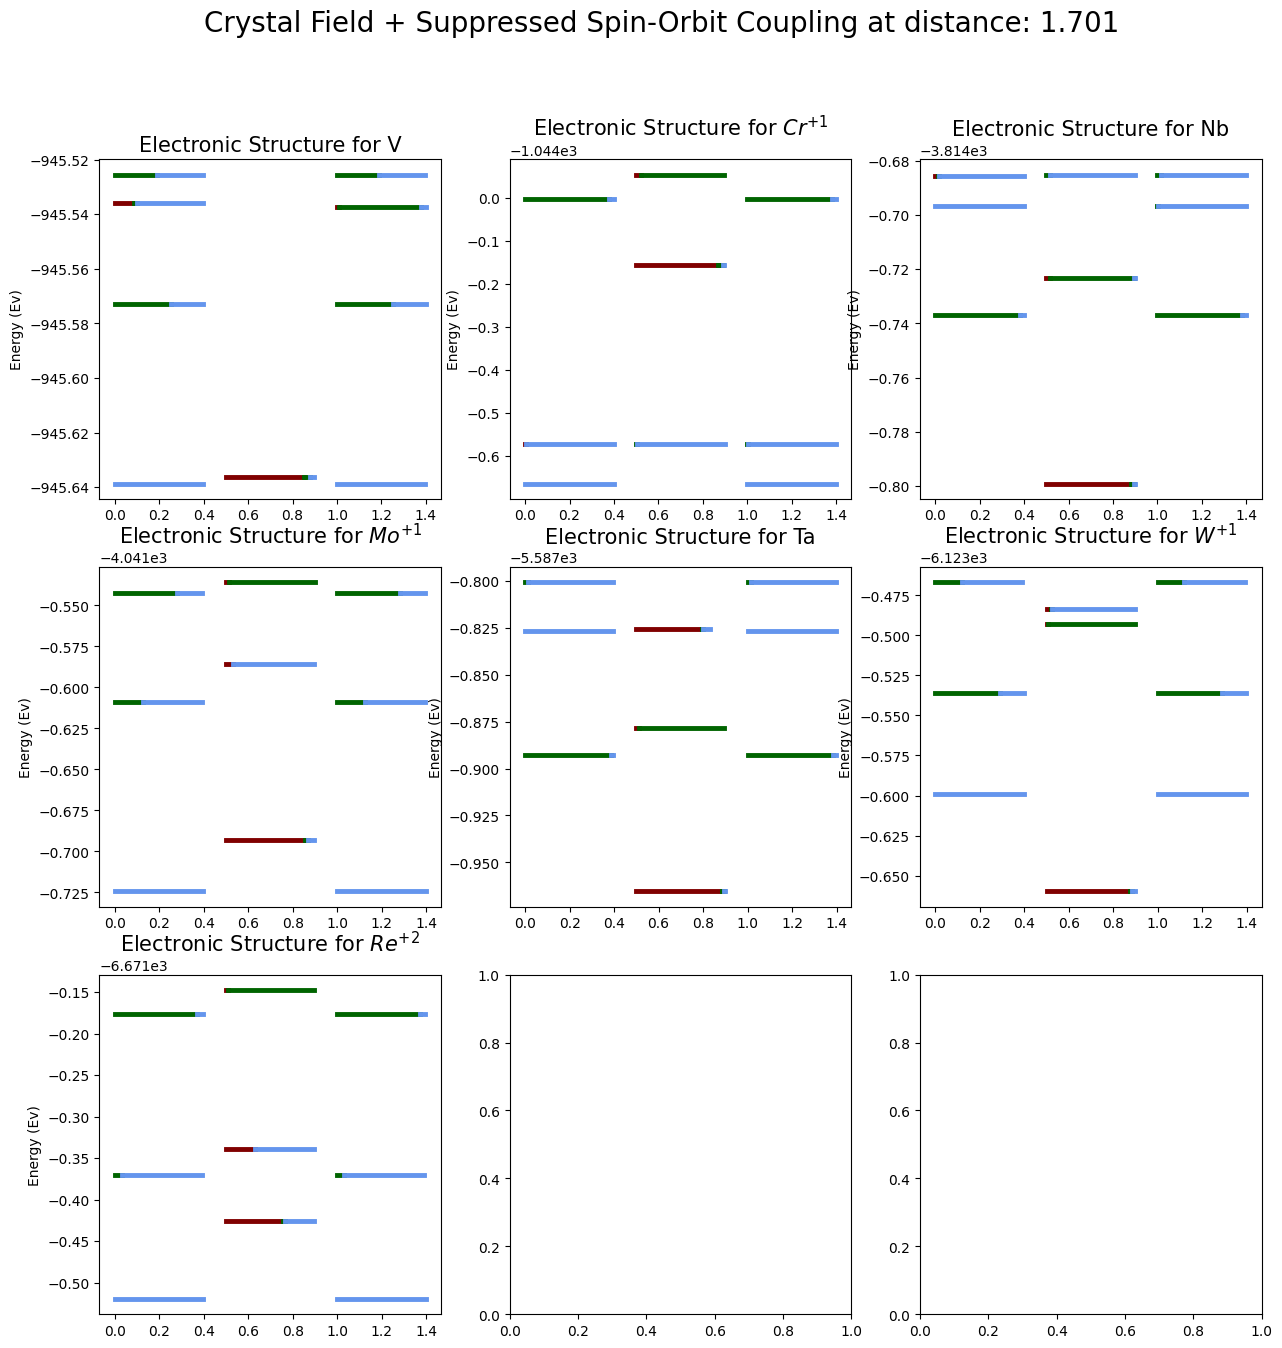

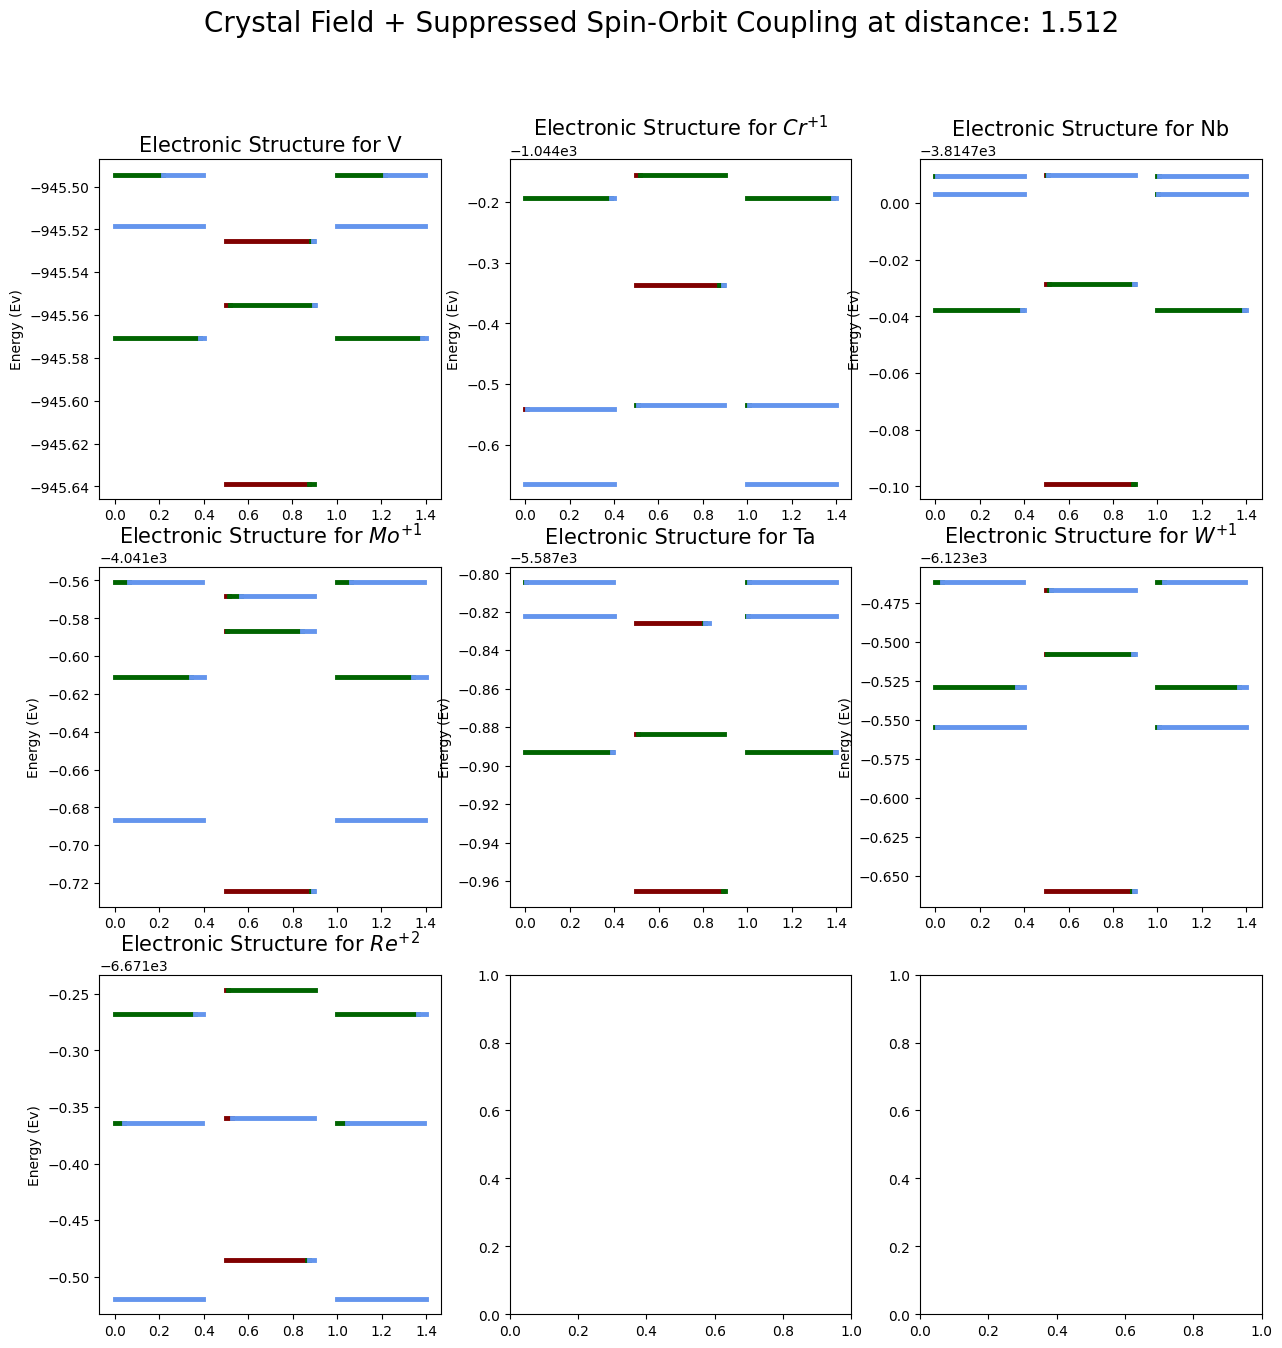

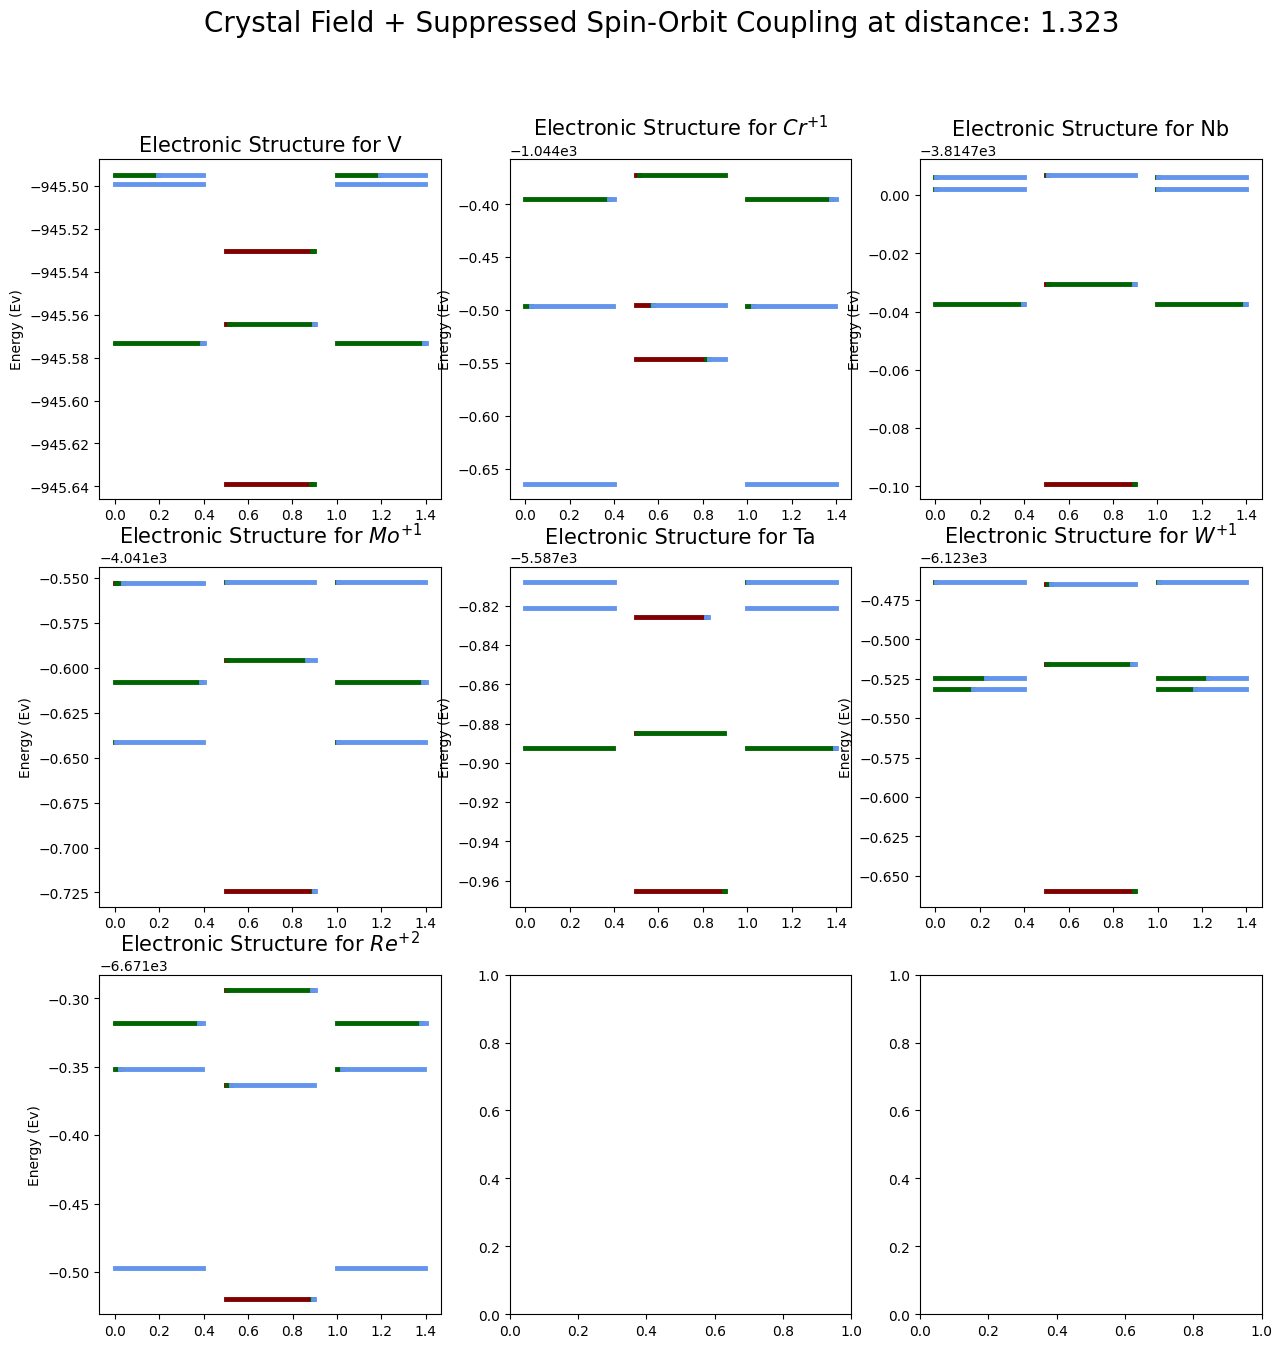

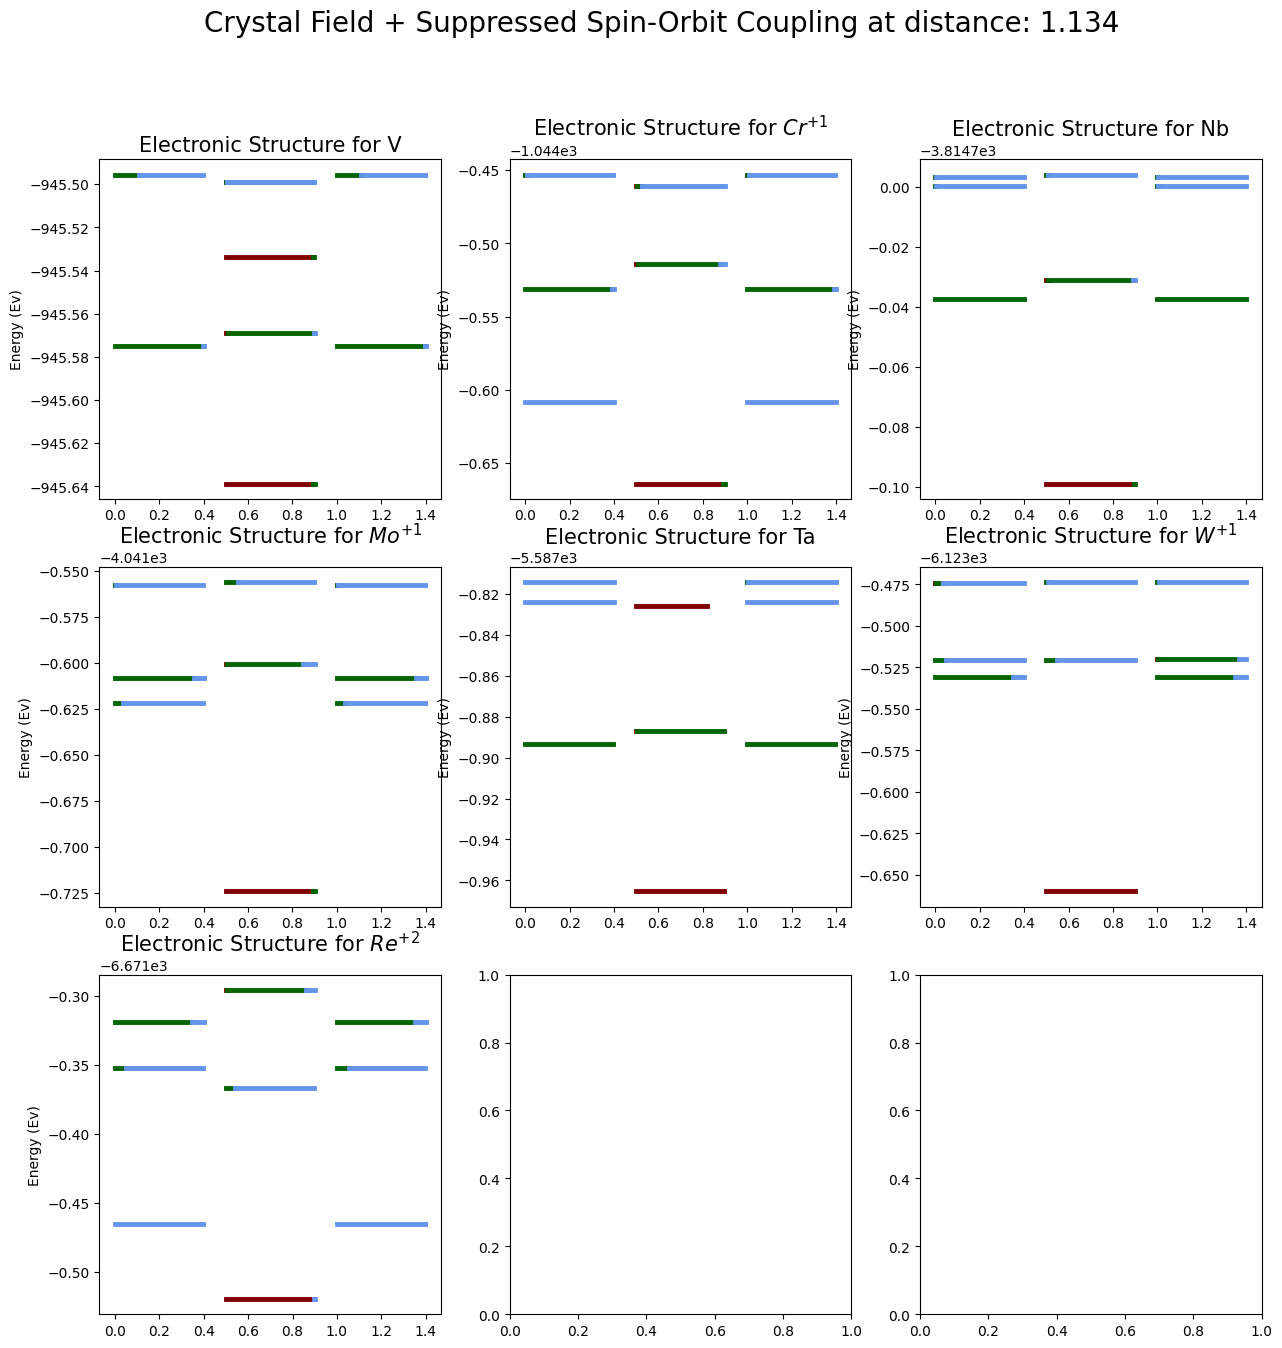

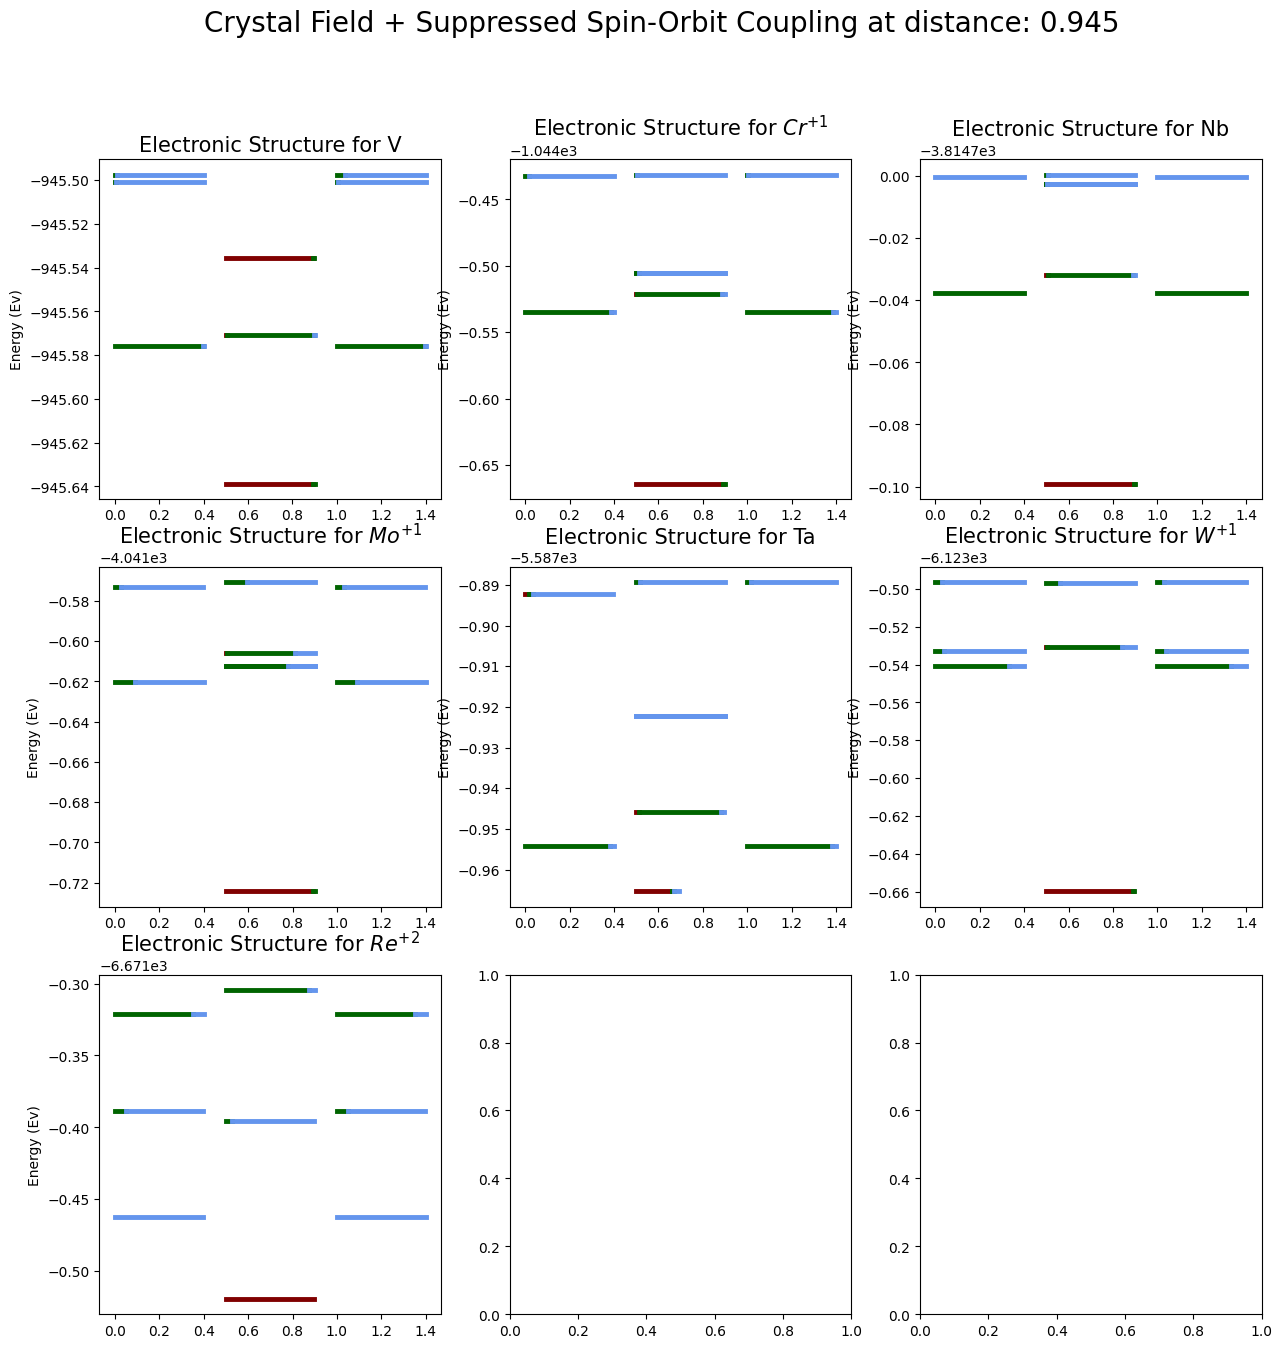

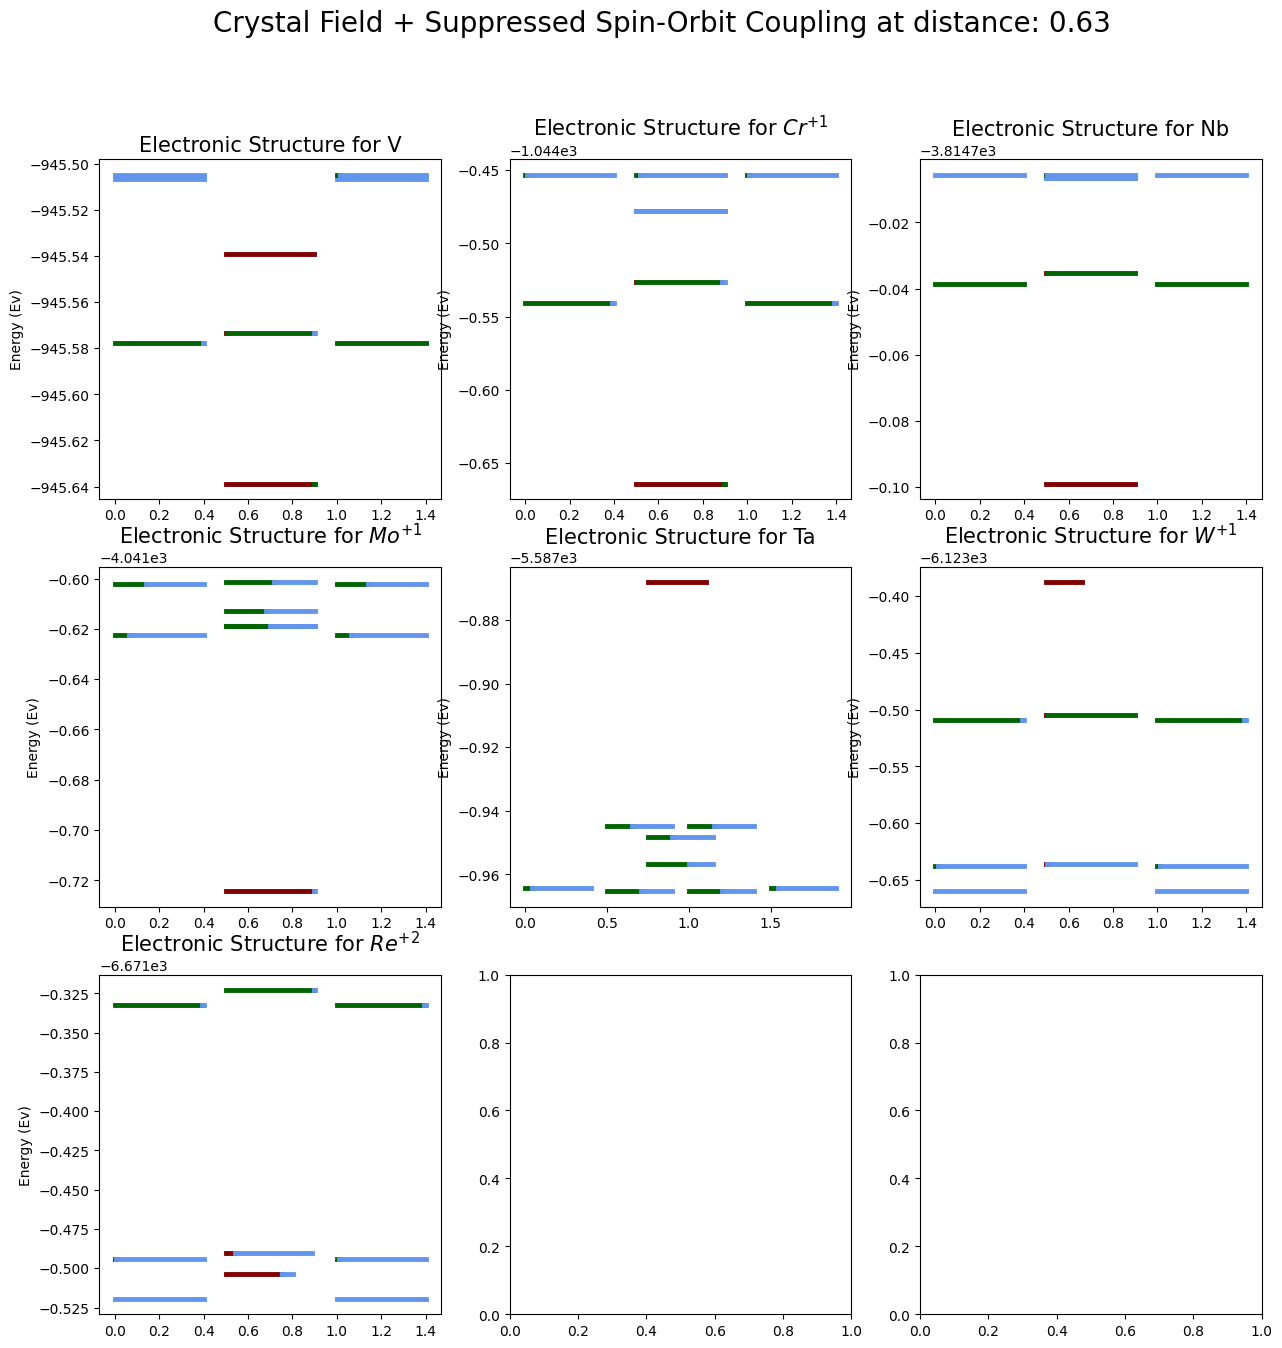

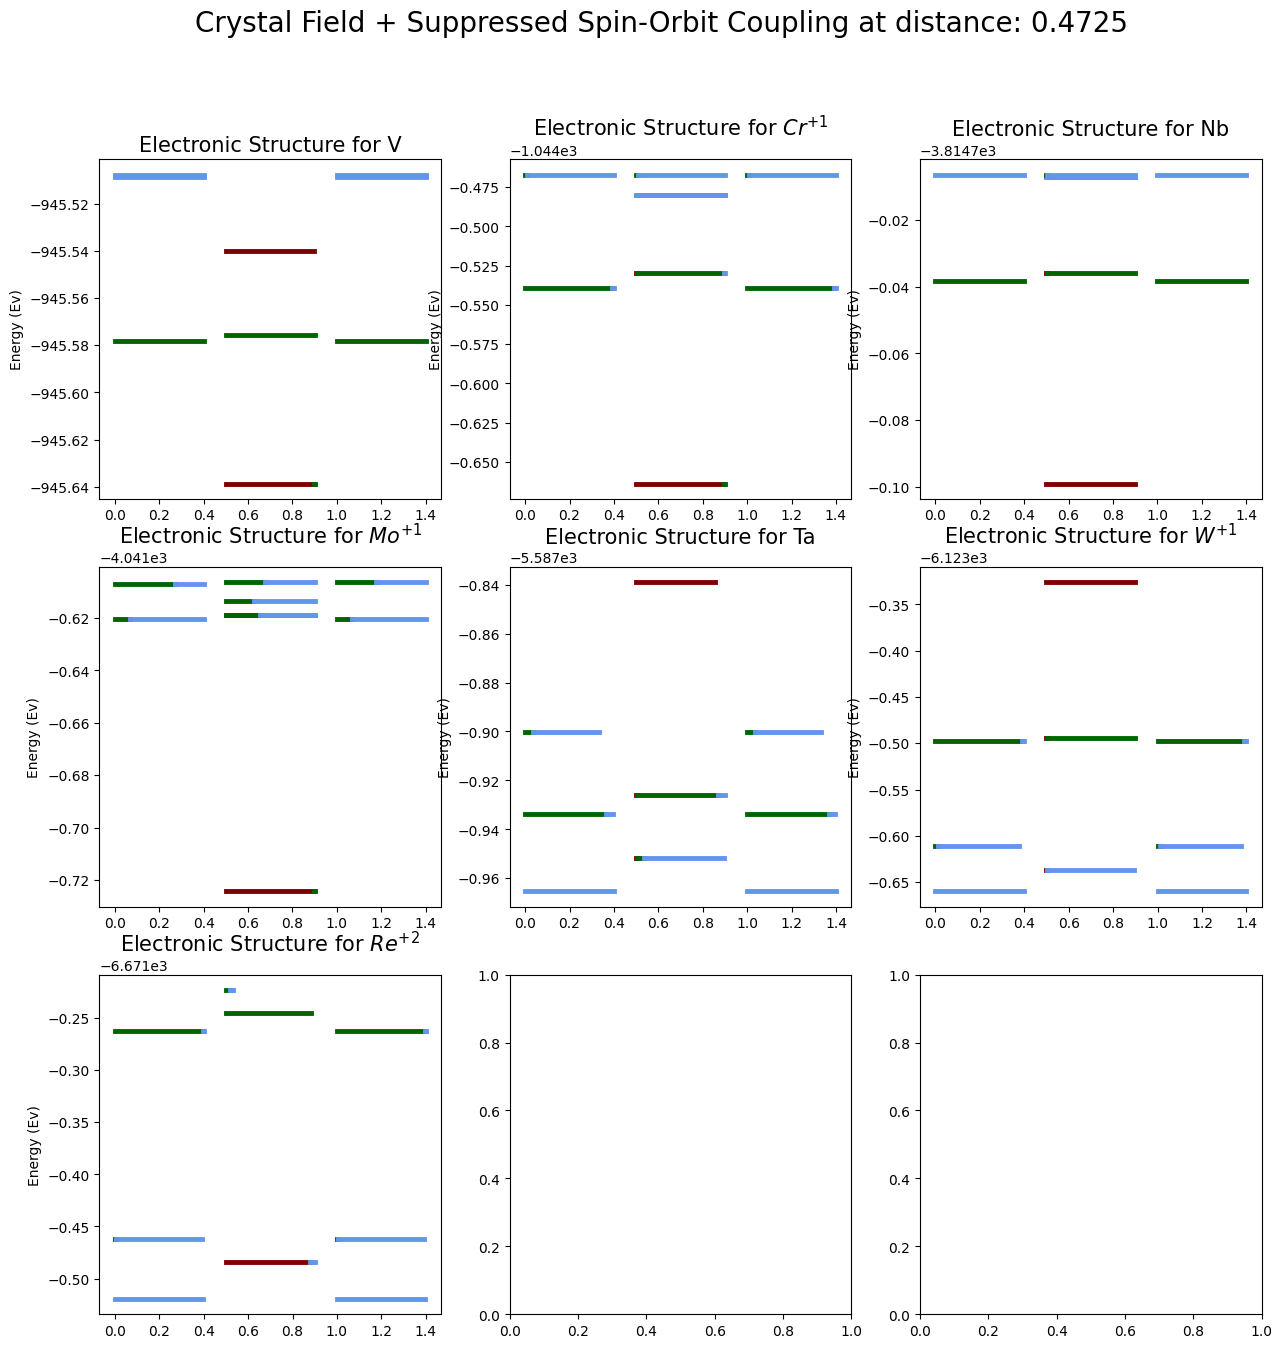

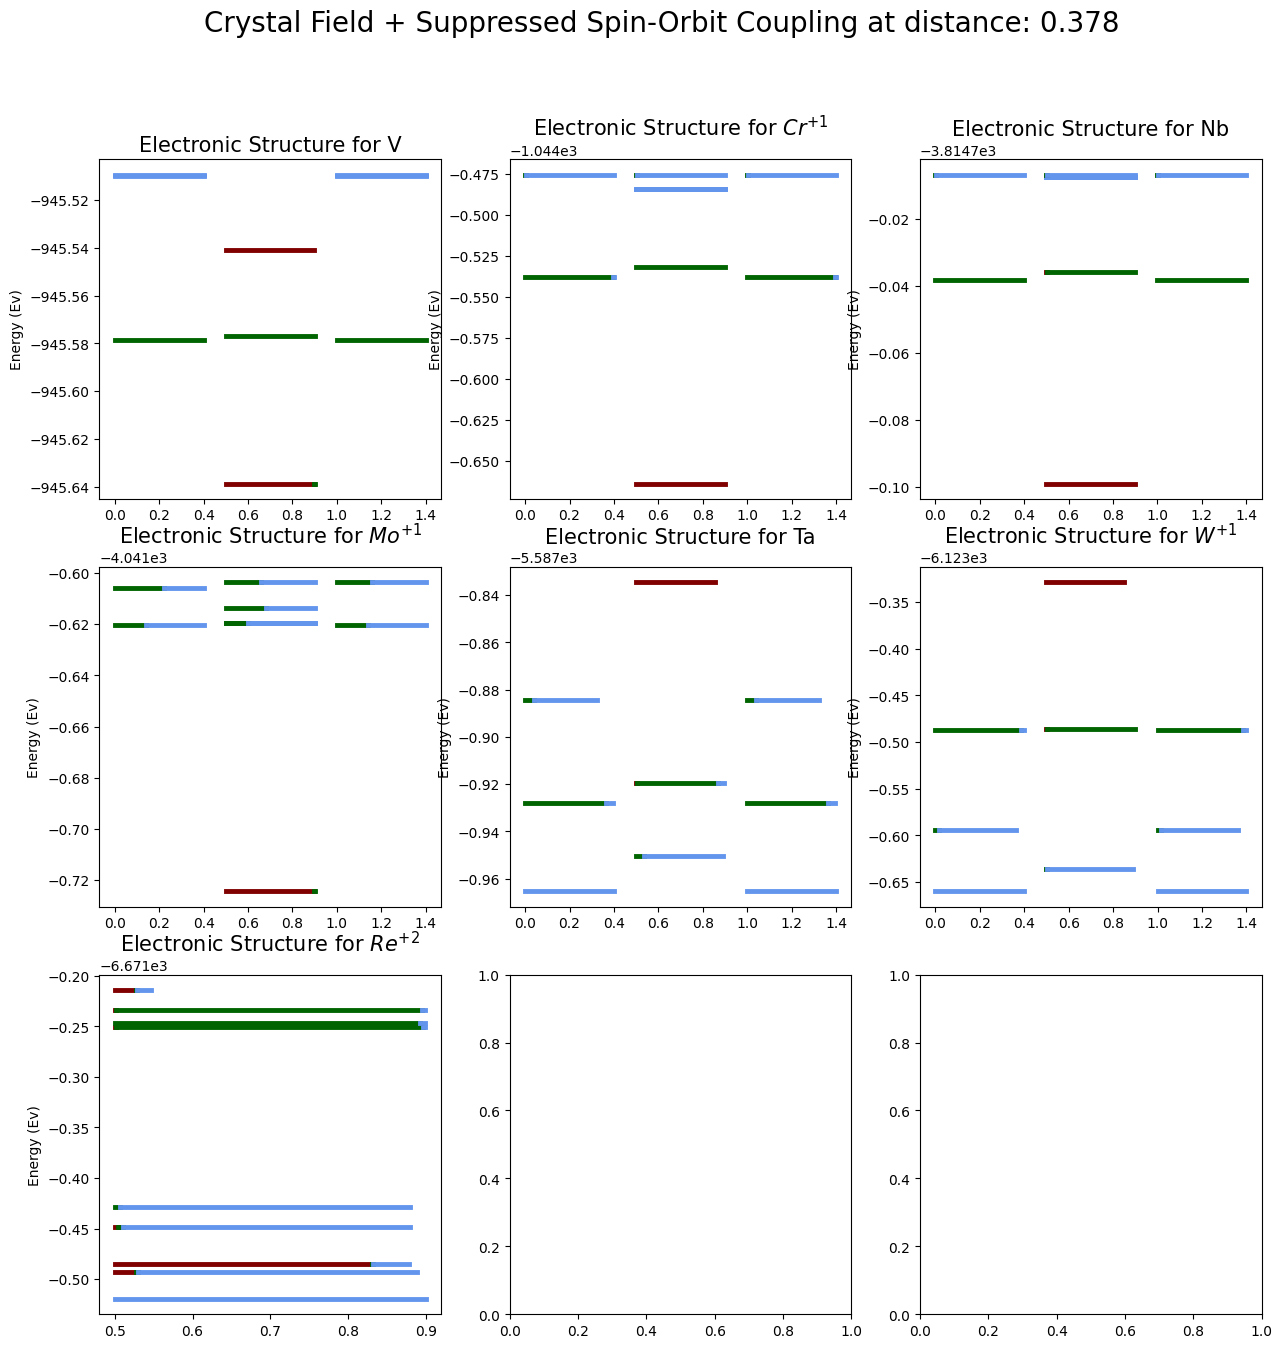

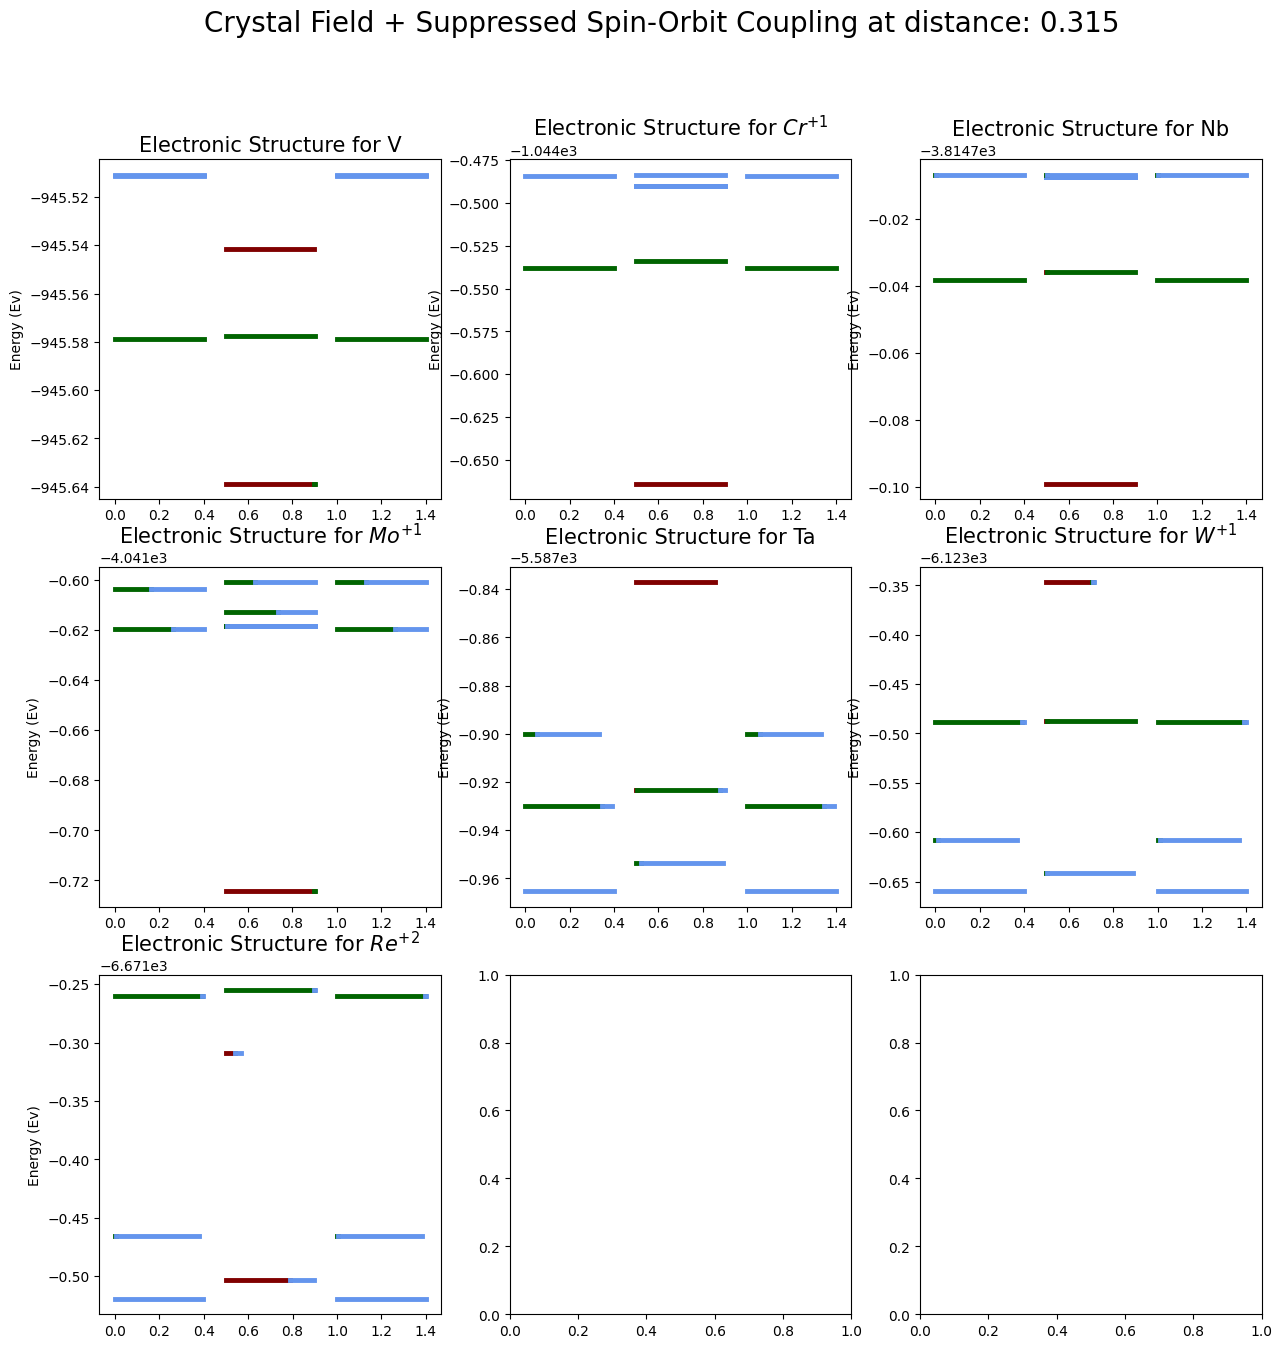

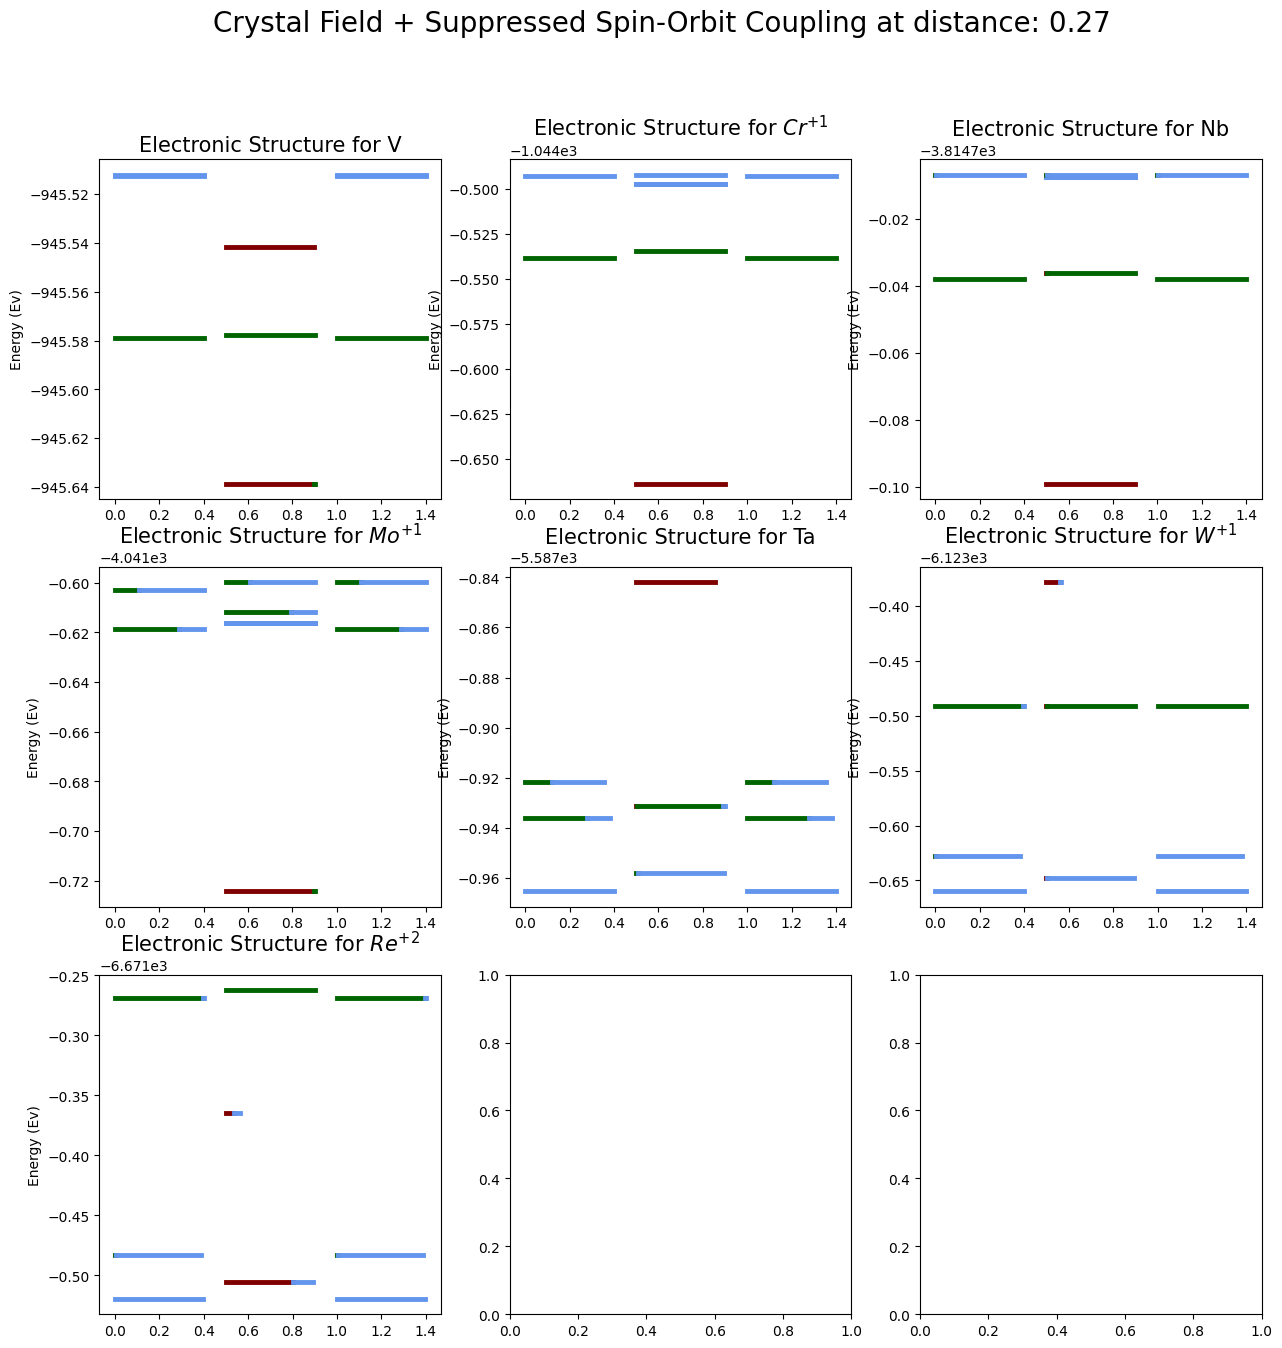

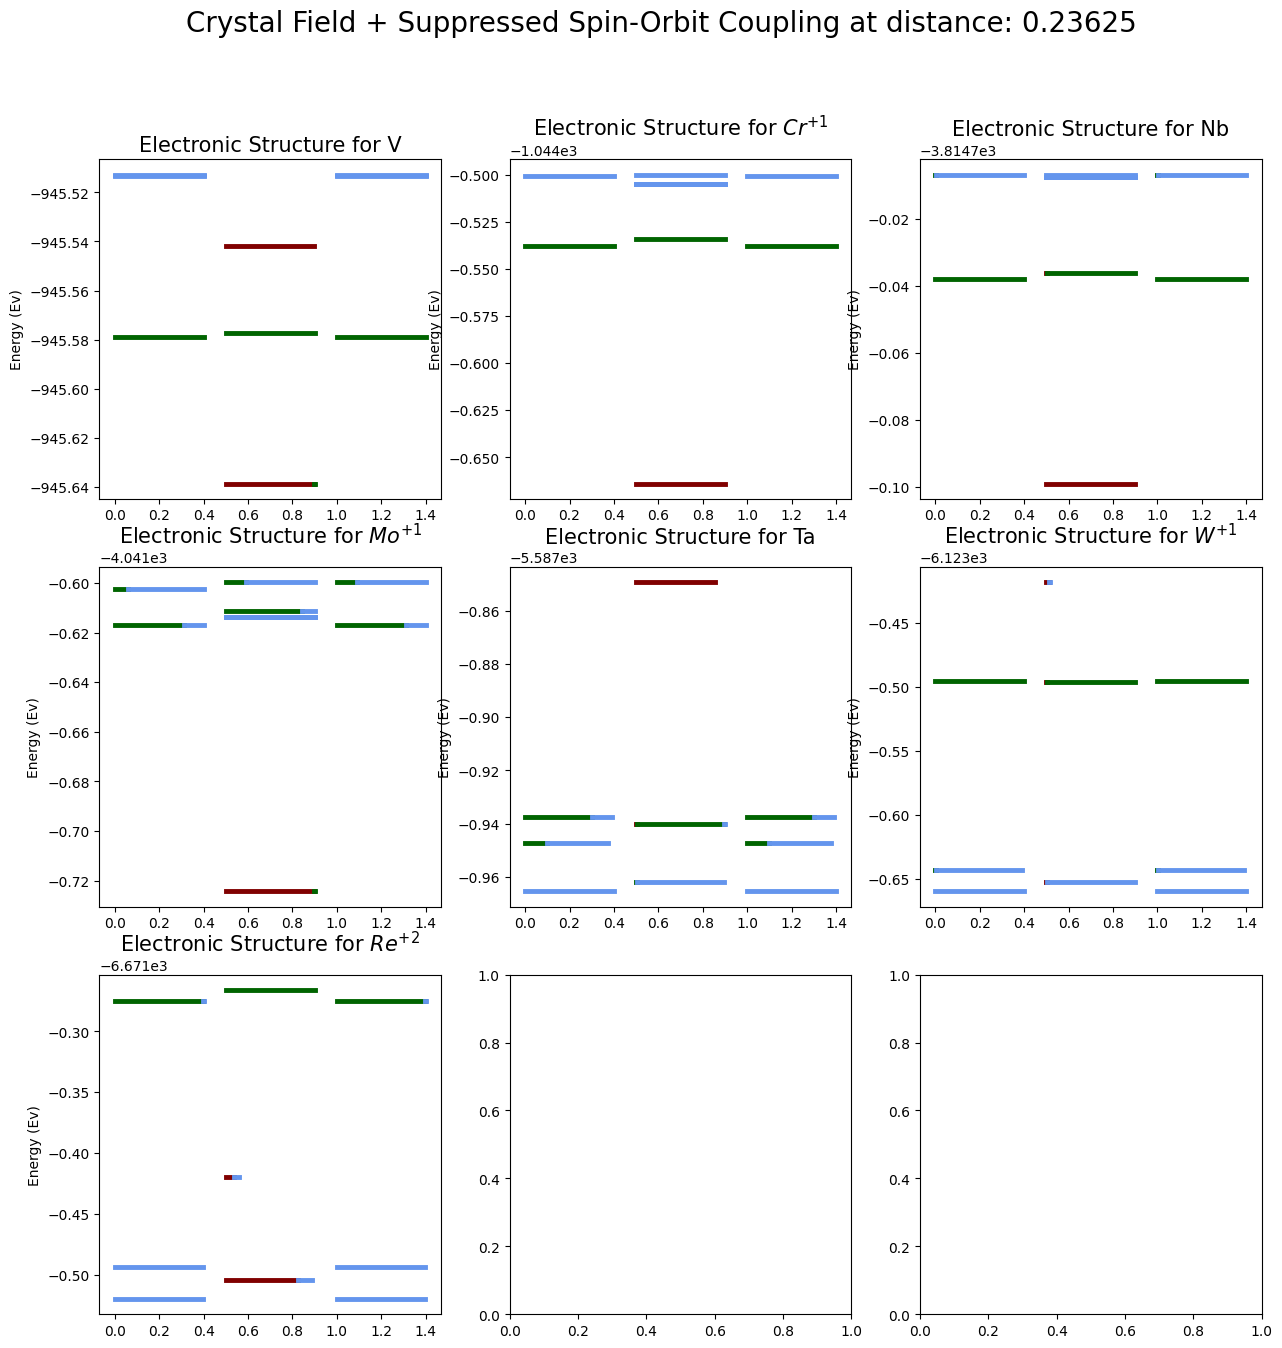

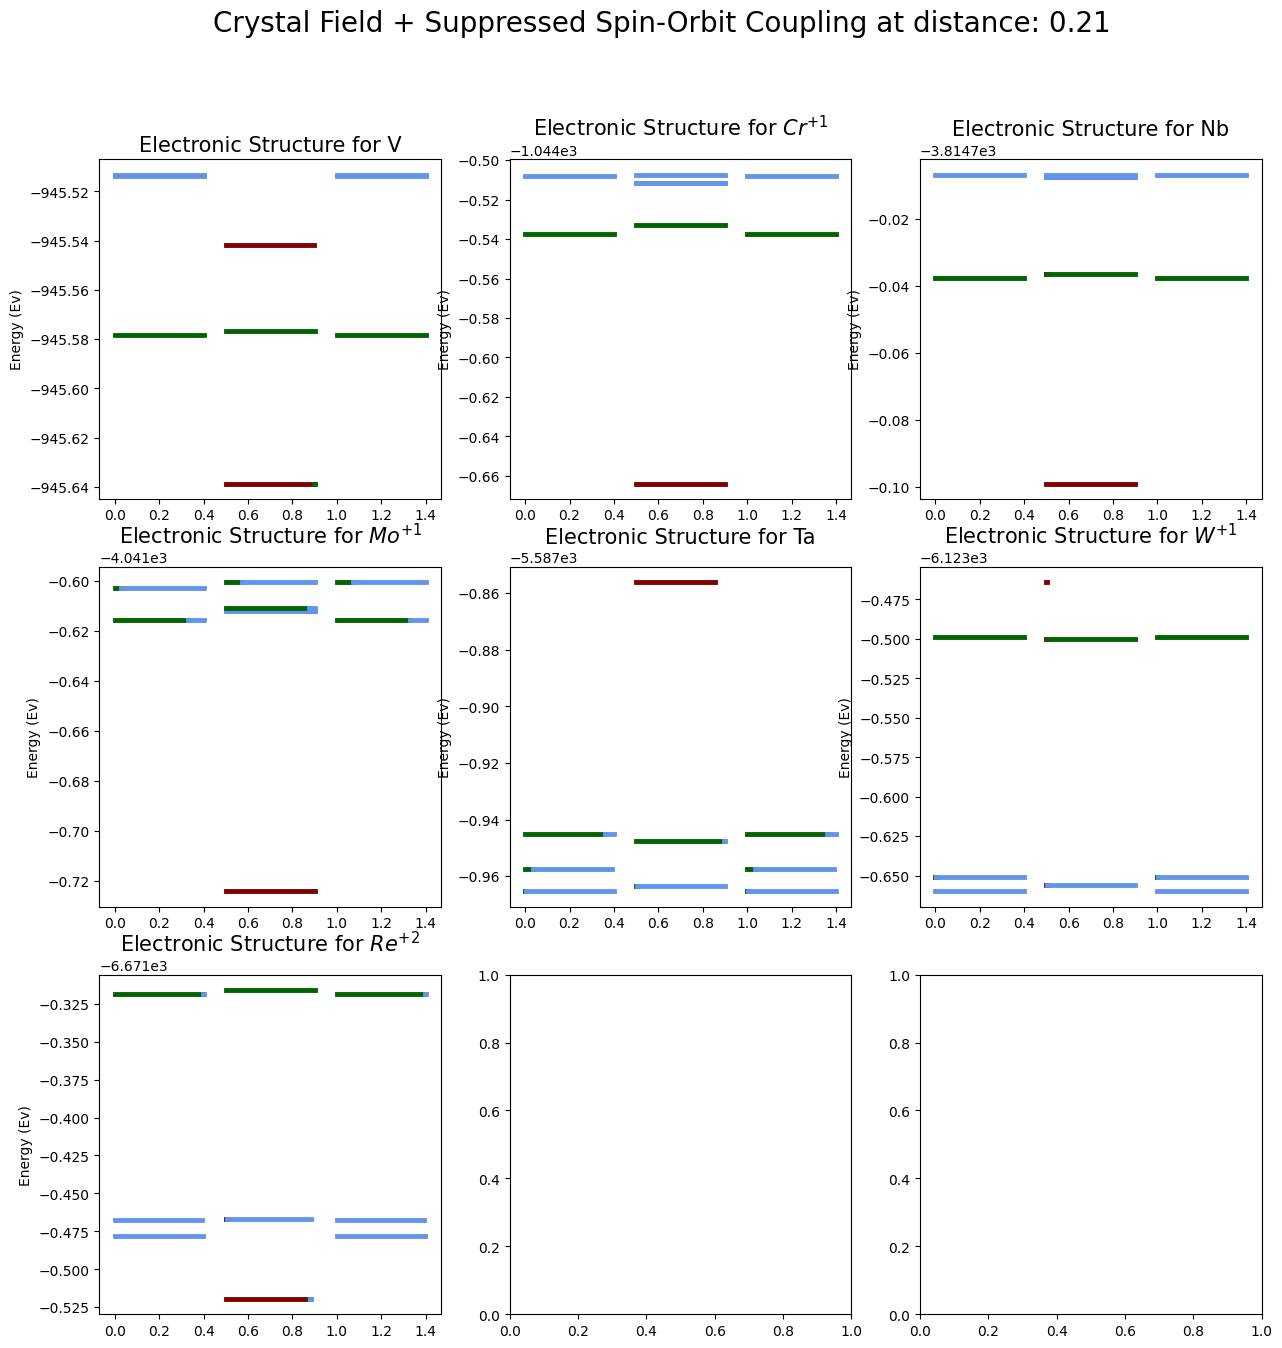

In [104]:
# Define the colors for each segment
colors = ['maroon', 'darkgreen', 'cornflowerblue']

################################
#       NOW BY DISTANCES       #
################################

elements = ["V",r'$Cr^{+1}$',"Nb",r'$Mo^{+1}$',"Ta",r'$W^{+1}$',r'$Re^{+2}$']

for V_pos, Cr_pos, Nb_pos, Mo_pos, Ta_pos, W_pos, Re_pos, V_ener, Cr_ener, Nb_ener, Mo_ener, Ta_ener, W_ener, Re_ener, bond_length, V_pop, Cr_pop, Nb_pop, Mo_pop, Ta_pop, W_pop, Re_pop  in zip(V_positions, Cr_positions, Nb_positions, Mo_positions, Ta_positions, W_positions, Re_positions, V_Energies, Cr_Energies, Nb_Energies, Mo_Energies, Ta_Energies, W_Energies, Re_Energies, W_bond_lengths_list, V_population_total, Cr_population_total, Nb_population_total, Mo_population_total, Ta_population_total, W_population_total, Re_population_total):
    
    fig, ax = plt.subplots(3, 3, figsize=(15, 15), facecolor='white')
    
    full_list = [[V_pos, V_ener, V_pop], [Cr_pos, Cr_ener, Cr_pop], [Nb_pos, Nb_ener, Nb_pop], [Mo_pos, Mo_ener, Mo_pop], [Ta_pos, Ta_ener, Ta_pop], [W_pos, W_ener, W_pop], [Re_pos, Re_ener, Re_pop]]
    i=0
    j=0
    for list, element in zip(full_list, elements):
        for pos, ener, population in zip(list[0], list[1], list[2]):

            points = [0]
            for ratio in population:
                points.append(points[-1] + 0.4 * ratio)

            x_values = []
            y_values = []
            # Plot each segment with its respective color
            for t in range(len(colors)):
                x_values = np.linspace(pos+points[t], pos+points[t + 1], 100)
                y_values = np.full_like(x_values, ener)  # Specific value for y
                ax[i,j].plot(x_values, y_values, color=colors[t], linewidth=3.5)

            ax[i, j].set_title(f'Electronic Structure for {element}', fontsize=15)
            ax[i, j].set_ylabel("Energy (Ev)")
        
        j = j +1
        if j == 3:
            j = 0
            i = i +1
    fig.suptitle(f"Crystal Field + Suppressed Spin-Orbit Coupling at distance: {bond_length}", fontsize=20)
    plt.show()
